In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the data using Pandas
f1all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_1.xlsx')
f1all.columns = f1all.columns.str.lower()
f1all.columns = f1all.columns.str.strip()
f1all.columns = f1all.columns.str.replace(' |\n', '_')
f1all.columns = f1all.columns.str.replace('__', '_')
f1all['area_name'] = f1all['area_name'].str.replace('\d+', '')
f1all = f1all.applymap(lambda s:s.lower() if type(s) == str else s)
f1all.drop(['table_name'], inplace = True, axis = 1)
f1all['area_name'].astype(object)
f1all['area_name'] = f1all['area_name'].str.split('-').str[1]
f1all['area_name'] = f1all['area_name'].str.strip(' ')
f1all = f1all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f1all['total_ever_unmarried_women'] = f1all['total_women'] - f1all['total_ever_married_women']
f1all = f1all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'present_age','total_women', 'total_ever_married_women', 'parity_0', 'parity_1','parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+','total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'all/sc/st','total_ever_unmarried_women'], axis=1, inplace=False)
f1all = f1all.drop_duplicates()
f1all = f1all.reset_index(drop=True)
f1all

state_code  distt._code area_name total/_rural/_urban   present_age  \
0              18            0     assam               total      all_ages   
1              18            0     assam               total  less_than_15   
2              18            0     assam               total         15-19   
3              18            0     assam               total         20-24   
4              18            0     assam               total         25-29   
5              18            0     assam               total         30-34   
6              18            0     assam               total         35-39   
7              18            0     assam               total         40-44   
8              18            0     assam               total         45-49   
9              18            0     assam               total         50-54   
10             18            0     assam               total         55-59   
11             18            0     assam               total         60-64   
12             18            0     assam               total         65-69   
13             18            0     assam               total         70-74   
14             18            0     assam               total         75-79   
15             18            0     assam               total           80+   
16             18            0     assam               rural      all_ages   
17             18            0     assam               rural  less_than_15   
18             18            0     assam               rural         15-19   
19             18            0     assam               rural         20-24   
20             18            0     assam               rural         25-29   
21             18            0     assam               rural         30-34   
22             18            0     assam               rural         35-39   
23             18            0     assam               rural         40-44   
24             18            0     assam               rural         45-49   
25             18            0     assam               rural         50-54   
26             18            0     assam               rural         55-59   
27             18            0     assam               rural         60-64   
28             18            0     assam               rural         65-69   
29             18            0     assam               rural         70-74   
...           ...          ...       ...                 ...           ...   
85730           8           32  jhalawar               rural         15-19   
85731           8           32  jhalawar               rural         20-24   
85732           8           32  jhalawar               rural         25-29   
85733           8           32  jhalawar               rural         30-34   
85734           8           32  jhalawar               rural         35-39   
85735           8           32  jhalawar               rural         40-44   
85736           8           32  jhalawar               rural         45-49   
85737           8           32  jhalawar               rural         50-54   
85738           8           32  jhalawar               rural         55-59   
85739           8           32  jhalawar               rural         60-64   
85740           8           32  jhalawar               rural         65-69   
85741           8           32  jhalawar               rural         70-74   
85742           8           32  jhalawar               rural         75-79   
85743           8           32  jhalawar               rural           80+   
85744           8           32  jhalawar               urban      all_ages   
85745           8           32  jhalawar               urban  less_than_15   
85746           8           32  jhalawar               urban         15-19   
85747           8           32  jhalawar               urban         20-24   
85748           8           32  jhalawar               urban         25-29   
85749           8           3

In [4]:
f1all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85760 entries, 0 to 85759
Data columns (total 20 columns):
state_code                    85760 non-null int64
distt._code                   85760 non-null int64
area_name                     85616 non-null object
total/_rural/_urban           85760 non-null object
present_age                   85760 non-null object
total_women                   85760 non-null int64
total_ever_married_women      85760 non-null int64
parity_0                      85760 non-null int64
parity_1                      85760 non-null int64
parity_2                      85760 non-null int64
parity_3                      85760 non-null int64
parity_4                      85760 non-null int64
parity_5                      85760 non-null int64
parity_6                      85760 non-null int64
parity_7+                     85760 non-null int64
total_children_ever_born_p    85760 non-null int64
total_children_ever_born_m    85760 non-null int64
total_children_ever_b

In [5]:
f1all['parity_0_%'] = (f1all['parity_0'] /f1all['total_ever_married_women'])*100

In [6]:
f1all['parity_1_%'] = (f1all['parity_1'] /f1all['total_ever_married_women'])*100

In [7]:
f1all['parity_2_%'] = (f1all['parity_2'] /f1all['total_ever_married_women'])*100

In [8]:
f1all['parity_3_%'] = (f1all['parity_3'] /f1all['total_ever_married_women'])*100

In [9]:
f1all['parity_4_%'] = (f1all['parity_4'] /f1all['total_ever_married_women'])*100

In [10]:
f1all['parity_5_%'] = (f1all['parity_5'] /f1all['total_ever_married_women'])*100

In [11]:
f1all['parity_6_%'] = (f1all['parity_6'] /f1all['total_ever_married_women'])*100

In [12]:
f1all['parity_7+_%'] = (f1all['parity_7+'] /f1all['total_ever_married_women'])*100

In [13]:
f1all['total_ever_married_women_%'] = (f1all['total_ever_married_women'] /f1all['total_women'])*100

In [14]:
f1all['total_ever_unmarried_women_%'] = (f1all['total_ever_unmarried_women'] /f1all['total_women'])*100

In [15]:
f1all['total_children_ever_born_m_%'] = (f1all['total_children_ever_born_m']/f1all['total_children_ever_born_p'] )*100

In [16]:
f1all['total_children_ever_born_f_%'] = (f1all['total_children_ever_born_f'].div(f1all['total_children_ever_born_p'].where(f1all['total_children_ever_born_p'] != 0, np.nan)))*100

In [17]:
f1all.dropna(axis = 0, inplace = True)
f1all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82745 entries, 0 to 85759
Data columns (total 32 columns):
state_code                      82745 non-null int64
distt._code                     82745 non-null int64
area_name                       82745 non-null object
total/_rural/_urban             82745 non-null object
present_age                     82745 non-null object
total_women                     82745 non-null int64
total_ever_married_women        82745 non-null int64
parity_0                        82745 non-null int64
parity_1                        82745 non-null int64
parity_2                        82745 non-null int64
parity_3                        82745 non-null int64
parity_4                        82745 non-null int64
parity_5                        82745 non-null int64
parity_6                        82745 non-null int64
parity_7+                       82745 non-null int64
total_children_ever_born_p      82745 non-null int64
total_children_ever_born_m      82745 no

In [18]:
# To familiarize i the values
for column in f1all:
    print(f1all[column].unique())
    print('----------------------------------------------------------------------------------------')

[18 13 29 16  7 22 31 35  1  2  3  4  5  6  8  9 10 11 12 14 15 17 19 20
 21 23 24 25 26 27 28 30 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['assam' 'kokrajhar' 'dhubri' 'goalpara' 'bongaigaon' 'barpeta' 'kamrup'
 'nalbari' 'darrang' 'marigaon' 'nagaon' 'sonitpur' 'lakhimpur' 'dhemaji'
 'tinsukia' 'dibrugarh' 'sibsagar' 'jorhat' 'golaghat' 'karbi_anglong'
 'north_cachar_hills' 'cachar' 'karimganj' 'hailakandi' 'nagaland' 'mon'
 'tuensang' 'mokokchung' 'zunheboto' 'wokha' 'dimapur_*' 'kohima' 'phek'
 'karnataka' 'belgaum' 'bagalkot_*' 'bijapur' 'gulbarga' 'bidar' 'raichur'
 'koppal_*' 'gadag_*' 'dharwad' 'uttara_kannada' 'haveri_*

 19.30693069]
----------------------------------------------------------------------------------------
[ 9.08288052  0.          0.74911642 ... 13.86768448  8.54940434
  2.03252033]
----------------------------------------------------------------------------------------
[ 6.31246886  0.          0.28288218 ... 16.42394822 14.75826972
  4.134548  ]
----------------------------------------------------------------------------------------
[10.7498148   0.          0.59745149 ... 24.49567723  6.23686055
  5.6       ]
----------------------------------------------------------------------------------------
[49.03482869  0.54859158 20.58078308 ... 96.65738162 52.02333212
 30.38869258]
----------------------------------------------------------------------------------------
[50.96517131 99.45140842 79.41921692 ...  3.34261838 47.97666788
 69.61130742]
----------------------------------------------------------------------------------------
[52.36090973 50.46371546 50.92310135 ... 51.37318255 51.0

In [19]:
# Loading the data using Pandas
f2all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_2.xlsx')
f2all.columns = f2all.columns.str.lower()
f2all.columns = f2all.columns.str.strip()
f2all.columns = f2all.columns.str.replace(' |\n', '_')
f2all.columns = f2all.columns.str.replace('__', '_')
f2all = f2all.applymap(lambda s:s.lower() if type(s) == str else s)
f2all['area_name'] = f2all['area_name'].str.replace('\d+', '')
f2all.drop(['table_name'], inplace = True, axis = 1)
f2all['area_name'].astype(object)
f2all['area_name'] = f2all['area_name'].str.split('-').str[1]
f2all['area_name'] = f2all['area_name'].str.strip(' ')
f2all = f2all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f2all['total_ever_unmarried_women'] = f2all['total_women'] - f2all['total_ever_married_women']
f2all = f2all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'religious_community','present_age', 'total_women', 'total_ever_married_women', 'parity_0','parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6','parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'total_ever_unmarried_women'], axis=1, inplace=False)
f2all = f2all.drop_duplicates()
f2all = f2all.reset_index(drop=True)
f2all.head()

state_code  distt._code                  area_name total/_rural/_urban  \
0          35            0  andaman_&_nicobar_islands               total   
1          35            0  andaman_&_nicobar_islands               total   
2          35            0  andaman_&_nicobar_islands               total   
3          35            0  andaman_&_nicobar_islands               total   
4          35            0  andaman_&_nicobar_islands               total   

         religious_community   present_age  total_women  \
0  all_religious_communities      all_ages       163180   
1  all_religious_communities  less_than_15        50854   
2  all_religious_communities         15-19        17647   
3  all_religious_communities         20-24        17334   
4  all_religious_communities         25-29        17368   

   total_ever_married_women  parity_0  parity_1  parity_2  parity_3  parity_4  \
0                     86539      8869     13311     22224     17046     10201   
1                       177       103        24        50         0         0   
2                      2293      1556       579       109        24        25   
3                     10933      2920      4195      2950       656       106   
4                     15374      1719      3486      6056      3006       710   

   parity_5  parity_6  parity_7+  total_children_ever_born_p  \
0      5828      3407       5653                      248836   
1         0         0          0                         124   
2         0         0          0                         969   
3        22        10         74                       13238   
4       200        43        154                       30651   

   total_children_ever_born_m  total_children_ever_born_f  \
0                      128511                      120325   
1                          70                          54   
2                         483                         486   
3                        6652                        6586   
4                       15470                       15181   

   total_ever_unmarried_women  
0                       76641  
1                       50677  
2                       15354  
3                        6401  
4                        1994

In [20]:
f2all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women'],
      dtype='object')

In [21]:
f2all.dropna(axis = 0, inplace = True)
f2all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233344 entries, 0 to 233727
Data columns (total 20 columns):
state_code                    233344 non-null int64
distt._code                   233344 non-null int64
area_name                     233344 non-null object
total/_rural/_urban           233344 non-null object
religious_community           233344 non-null object
present_age                   233344 non-null object
total_women                   233344 non-null int64
total_ever_married_women      233344 non-null int64
parity_0                      233344 non-null int64
parity_1                      233344 non-null int64
parity_2                      233344 non-null int64
parity_3                      233344 non-null int64
parity_4                      233344 non-null int64
parity_5                      233344 non-null int64
parity_6                      233344 non-null int64
parity_7+                     233344 non-null int64
total_children_ever_born_p    233344 non-null int64
t

In [22]:
f2all['parity_0_%'] = (f2all['parity_0'] /f2all['total_ever_married_women'])*100

In [23]:
f2all['parity_1_%'] = (f2all['parity_1'] /f2all['total_ever_married_women'])*100

In [24]:
f2all['parity_2_%'] = (f2all['parity_2'] /f2all['total_ever_married_women'])*100

In [25]:
f2all['parity_3_%'] = (f2all['parity_3'] /f2all['total_ever_married_women'])*100

In [26]:
f2all['parity_4_%'] = (f2all['parity_4'] /f2all['total_ever_married_women'])*100

In [27]:
f2all['parity_5_%'] = (f2all['parity_5'] /f2all['total_ever_married_women'])*100

In [28]:
f2all['parity_6_%'] = (f2all['parity_6'] /f2all['total_ever_married_women'])*100

In [29]:
f2all['parity_7+_%'] = (f2all['parity_7+'] /f2all['total_ever_married_women'])*100

In [30]:
f2all['total_ever_married_women_%'] = (f2all['total_ever_married_women'] /f2all['total_women'])*100

In [31]:
f2all['total_ever_unmarried_women_%'] = (f2all['total_ever_unmarried_women'] /f2all['total_women'])*100

In [32]:
f2all['total_children_ever_born_m_%'] = (f2all['total_children_ever_born_m']/f2all['total_children_ever_born_p'] )*100

In [33]:
f2all['total_children_ever_born_f_%'] = (f2all['total_children_ever_born_f'].div(f2all['total_children_ever_born_p'].where(f2all['total_children_ever_born_p'] != 0, np.nan)))*100

In [34]:
f2all.dropna(axis = 0, inplace = True)
f2all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192598 entries, 0 to 233724
Data columns (total 32 columns):
state_code                      192598 non-null int64
distt._code                     192598 non-null int64
area_name                       192598 non-null object
total/_rural/_urban             192598 non-null object
religious_community             192598 non-null object
present_age                     192598 non-null object
total_women                     192598 non-null int64
total_ever_married_women        192598 non-null int64
parity_0                        192598 non-null int64
parity_1                        192598 non-null int64
parity_2                        192598 non-null int64
parity_3                        192598 non-null int64
parity_4                        192598 non-null int64
parity_5                        192598 non-null int64
parity_6                        192598 non-null int64
parity_7+                       192598 non-null int64
total_children_ever_b

In [35]:
# To familiarize i the values
for column in f2all:
    print(f2all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 20 28 15 29 19 33 10 12 32 18 31 13  4 23 22 16  7 27 25 26 24  6 30
  2  1  3  5  8  9 11 14 17 21 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'jharkhand' 'garhwa_*'
 'palamu' 'chatra_*' 'hazaribag' 'kodarma_*' 'giridih' 'deoghar' 'godda'
 'sahibganj' 'pakaur_*' 'dumka' 'dhanbad' 'bokaro_*' 'ranchi' 'lohardaga'
 'gumla' 'pashchimi_singhbhum' 'purbi_singhbhum' 'andhra_pradesh'
 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad' 'rangareddy'
 'mahbubnagar' 'nalgonda' 'warangal' 'khammam' 'srikakulam' 'vizianagaram'
 'visakhapatnam' 'east_godavari' 'west_godavari' 'krishna' 'guntu

 26.11683849]
----------------------------------------------------------------------------------------
[53.03284716  0.34805522 12.99370998 ... 54.4494721  50.48543689
 57.24381625]
----------------------------------------------------------------------------------------
[46.96715284 99.65194478 87.00629002 ... 45.5505279  49.51456311
 42.75618375]
----------------------------------------------------------------------------------------
[51.64485846 56.4516129  49.84520124 ... 58.1120944  59.22551253
 47.16157205]
----------------------------------------------------------------------------------------
[48.35514154 43.5483871  50.15479876 ... 41.8879056  40.77448747
 52.83842795]
----------------------------------------------------------------------------------------


In [36]:
# Loading the data using Pandas
f3all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_3.xlsx')
f3all.columns = f3all.columns.str.lower()
f3all.columns = f3all.columns.str.strip()
f3all.columns = f3all.columns.str.replace(' |\n', '_')
f3all.columns = f3all.columns.str.replace('__', '_')
f3all = f3all.applymap(lambda s:s.lower() if type(s) == str else s)
f3all['area_name'] = f3all['area_name'].str.replace('\d+', '')
f3all.drop(['table_name'], inplace = True, axis = 1)
f3all['area_name'].astype(object)
f3all['area_name'] = f3all['area_name'].str.split('-').str[1]
f3all['area_name'] = f3all['area_name'].str.strip(' ')
f3all = f3all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f3all['total_ever_unmarried_women'] = f3all['total_women'] - f3all['total_ever_married_women']
f3all = f3all.set_axis(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban', 'educational_level','present_age', 'total_women', 'total_ever_married_women', 'parity_0','parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6','parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'total_ever_unmarried_women'], axis=1, inplace=False)
f3all = f3all.drop_duplicates()
f3all = f3all.reset_index(drop=True)
f3all.head()

state_code  distt._code                  area_name total/_rural/_urban  \
0          35            0  andaman_&_nicobar_islands               total   
1          35            0  andaman_&_nicobar_islands               total   
2          35            0  andaman_&_nicobar_islands               total   
3          35            0  andaman_&_nicobar_islands               total   
4          35            0  andaman_&_nicobar_islands               total   

  educational_level   present_age  total_women  total_ever_married_women  \
0             total      all_ages       163180                     86539   
1             total  less_than_15        50854                       177   
2             total         15-19        17647                      2293   
3             total         20-24        17334                     10933   
4             total         25-29        17368                     15374   

   parity_0  parity_1  parity_2  parity_3  parity_4  parity_5  parity_6  \
0      8869     13311     22224     17046     10201      5828      3407   
1       103        24        50         0         0         0         0   
2      1556       579       109        24        25         0         0   
3      2920      4195      2950       656       106        22        10   
4      1719      3486      6056      3006       710       200        43   

   parity_7+  total_children_ever_born_p  total_children_ever_born_m  \
0       5653                      248836                      128511   
1          0                         124                          70   
2          0                         969                         483   
3         74                       13238                        6652   
4        154                       30651                       15470   

   total_children_ever_born_f  total_ever_unmarried_women  
0                      120325                       76641  
1                          54                       50677  
2                         486                       15354  
3                        6586                        6401  
4                       15181                        1994

In [37]:
f3all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women'],
      dtype='object')

In [38]:
f3all['parity_0_%'] = (f3all['parity_0'] /f3all['total_ever_married_women'])*100

In [39]:
f3all['parity_1_%'] = (f3all['parity_1'] /f3all['total_ever_married_women'])*100

In [40]:
f3all['parity_2_%'] = (f3all['parity_2'] /f3all['total_ever_married_women'])*100

In [41]:
f3all['parity_3_%'] = (f3all['parity_3'] /f3all['total_ever_married_women'])*100

In [42]:
f3all['parity_4_%'] = (f3all['parity_4'] /f3all['total_ever_married_women'])*100

In [43]:
f3all['parity_5_%'] = (f3all['parity_5'] /f3all['total_ever_married_women'])*100

In [44]:
f3all['parity_6_%'] = (f3all['parity_6'] /f3all['total_ever_married_women'])*100

In [45]:
f3all['parity_7+_%'] = (f3all['parity_7+'] /f3all['total_ever_married_women'])*100

In [46]:
f3all['total_ever_married_women_%'] = (f3all['total_ever_married_women'] /f3all['total_women'])*100

In [47]:
f3all['total_ever_unmarried_women_%'] = (f3all['total_ever_unmarried_women'] /f3all['total_women'])*100

In [48]:
f3all['total_children_ever_born_m_%'] = (f3all['total_children_ever_born_m']/f3all['total_children_ever_born_p'] )*100

In [49]:
f3all['total_children_ever_born_f_%'] = (f3all['total_children_ever_born_f'].div(f3all['total_children_ever_born_p'].where(f3all['total_children_ever_born_p'] != 0, np.nan)))*100

In [50]:
f3all.dropna(axis = 0, inplace = True)
f3all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216284 entries, 0 to 224895
Data columns (total 32 columns):
state_code                      216284 non-null int64
distt._code                     216284 non-null int64
area_name                       216284 non-null object
total/_rural/_urban             216284 non-null object
educational_level               216284 non-null object
present_age                     216284 non-null object
total_women                     216284 non-null int64
total_ever_married_women        216284 non-null int64
parity_0                        216284 non-null int64
parity_1                        216284 non-null int64
parity_2                        216284 non-null int64
parity_3                        216284 non-null int64
parity_4                        216284 non-null int64
parity_5                        216284 non-null int64
parity_6                        216284 non-null int64
parity_7+                       216284 non-null int64
total_children_ever_b

In [51]:
# To familiarize i the values
for column in f3all:
    print(f3all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 26 29 21 16 15  5 28 25  6 27 13  7 32  9 19 34 12  2 14 11 30  3 22
 18  1 31 17 33 24  4  8 10 20 23]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'dadra_&_nagar_haveli'
 'karnataka' 'belgaum' 'bagalkot_*' 'bijapur' 'gulbarga' 'bidar' 'raichur'
 'koppal_*' 'gadag_*' 'dharwad' 'uttara_kannada' 'haveri_*' 'bellary'
 'chitradurga' 'davanagere_*' 'shimoga' 'udupi_*' 'chikmagalur' 'tumkur'
 'kolar' 'bangalore' 'bangalore_rural' 'mandya' 'hassan'
 'dakshina_kannada' 'kodagu' 'mysore' 'chamarajanagar_*' 'orissa'
 'bargarh_*' 'jharsuguda_*' 'sambalpur' 'debagarh_*' 'sundargarh'
 'kendujhar' 'ma

[76641 50677 15354 ... 13388 10664 39689]
----------------------------------------------------------------------------------------
[10.24855845 58.1920904  67.85870039 ...  7.91940954  7.39490641
  7.08825573]
----------------------------------------------------------------------------------------
[15.38150429 13.55932203 25.25076319 ... 25.1304081  22.23766505
 19.80742779]
----------------------------------------------------------------------------------------
[25.68090687 28.24858757  4.75359791 ... 48.19932998 41.48714385
 36.45116919]
----------------------------------------------------------------------------------------
[19.69747744  0.          1.04666376 ... 19.52744962 21.73314993
 19.50549451]
----------------------------------------------------------------------------------------
[11.78774888  0.          1.09027475 ...  4.69011725  6.04586518
  6.87757909]
----------------------------------------------------------------------------------------
[6.73453587 0.         0.2012

In [52]:
f3all['educational_level'].unique()

array(['total', 'illiterate', 'literate', 'literate_but_below_primary',
       'primary_but_below_middle', 'middle_but_below_matric_or_secondary',
       'matric_or_secondary_but_below_graduate', 'graduate_and_above'],
      dtype=object)

In [53]:
# Loading the data using Pandas
f4all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_4.xlsx')
f4all.dropna(axis = 0, inplace = True)
f4all.columns = f4all.columns.str.lower()
f4all.columns = f4all.columns.str.strip()
f4all.columns = f4all.columns.str.replace(' |\n', '_')
f4all.columns = f4all.columns.str.replace('__', '_')
f4all['area_name'] = f4all['area_name'].str.replace('\d+', '')
f4all = f4all.applymap(lambda s:s.lower() if type(s) == str else s)
f4all.drop(['table_name'], inplace = True, axis = 1)
f4all['area_name'].astype(object)
f4all['area_name'] = f4all['area_name'].str.split('-').str[1]
f4all['area_name'] = f4all['area_name'].str.strip(' ')
f4all['total_ever_unmarried_women'] = f4all['total_women'] - f4all['total_ever_married_women']
f4all = f4all.set_axis(['state_code','distt._code', 'area_name', 'total/rural/urban', 'economic_activity','present_age', 'total_women', 'total_ever_married_women', 'parity_0','parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6','parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m','total_children_ever_born_f', 'total_ever_unmarried_women'], axis=1, inplace=False)
f4all = f4all.drop_duplicates()
f4all = f4all.reset_index(drop=True)
f4all.head()

state_code  distt._code          area_name total/rural/urban  \
0          12            0  arunachal pradesh             total   
1          12            0  arunachal pradesh             total   
2          12            0  arunachal pradesh             total   
3          12            0  arunachal pradesh             total   
4          12            0  arunachal pradesh             total   

    economic_activity   present_age  total_women  total_ever_married_women  \
0  total main workers      all ages       147623                    125486   
1  total main workers  less than 15         4747                       178   
2  total main workers         15-19        12122                      3624   
3  total main workers         20-24        18134                     13413   
4  total main workers         25-29        23331                     20970   

   parity_0  parity_1  parity_2  parity_3  parity_4  parity_5  parity_6  \
0     15184     15499     17684     17727     16710     13788     10188   
1       109        27        42         0         0         0         0   
2      2075      1104       268        95        82         0         0   
3      3407      4429      3178      1476       512       180        81   
4      2630      3420      4834      4529      2985      1407       623   

   parity_7+  total_children_ever_born_p  total_children_ever_born_m  \
0      18706                      459769                      233707   
1          0                         111                          60   
2          0                        2253                        1174   
3        150                       19813                       10080   
4        542                       54528                       27491   

   total_children_ever_born_f  total_ever_unmarried_women  
0                      226062                       22137  
1                          51                        4569  
2                        1079                        8498  
3                        9733                        4721  
4                       27037                        2361

In [54]:
f4all['economic_activity'] = f4all['economic_activity'].str.strip()
f4all['economic_activity'] = f4all['economic_activity'].replace({'(a) cultivators':'cultivators','(b) agricultural labourers':'agricultural labourers','(c) other main workers':'other main workers','(d) other workers':'other workers','(i) manual':'manual','(ii) non-manual':'non-manual'})
f4all['economic_activity'].unique()

array(['total main workers', 'cultivators', 'agricultural labourers',
       'other main workers', 'manual', 'non-manual', 'marginal workers',
       'non-workers'], dtype=object)

In [55]:
f4all = f4all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

In [56]:
f4all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women'],
      dtype='object')

In [57]:
f4all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239104 entries, 0 to 239103
Data columns (total 20 columns):
state_code                    239104 non-null int64
distt._code                   239104 non-null int64
area_name                     238720 non-null object
total/rural/urban             239104 non-null object
economic_activity             239104 non-null object
present_age                   239104 non-null object
total_women                   239104 non-null int64
total_ever_married_women      239104 non-null int64
parity_0                      239104 non-null int64
parity_1                      239104 non-null int64
parity_2                      239104 non-null int64
parity_3                      239104 non-null int64
parity_4                      239104 non-null int64
parity_5                      239104 non-null int64
parity_6                      239104 non-null int64
parity_7+                     239104 non-null int64
total_children_ever_born_p    239104 non-null int64
t

In [58]:
f4all['parity_0_%'] = (f4all['parity_0'] /f4all['total_ever_married_women'])*100

In [59]:
f4all['parity_1_%'] = (f4all['parity_1'] /f4all['total_ever_married_women'])*100

In [60]:
f4all['parity_2_%'] = (f4all['parity_2'] /f4all['total_ever_married_women'])*100

In [61]:
f4all['parity_3_%'] = (f4all['parity_3'] /f4all['total_ever_married_women'])*100

In [62]:
f4all['parity_4_%'] = (f4all['parity_4'] /f4all['total_ever_married_women'])*100

In [63]:
f4all['parity_5_%'] = (f4all['parity_5'] /f4all['total_ever_married_women'])*100

In [64]:
f4all['parity_6_%'] = (f4all['parity_6'] /f4all['total_ever_married_women'])*100

In [65]:
f4all['parity_7+_%'] = (f4all['parity_7+'] /f4all['total_ever_married_women'])*100

In [66]:
f4all['total_ever_married_women_%'] = (f4all['total_ever_married_women'] /f4all['total_women'])*100

In [67]:
f4all['total_ever_unmarried_women_%'] = (f4all['total_ever_unmarried_women'] /f4all['total_women'])*100

In [68]:
f4all['total_children_ever_born_m_%'] = (f4all['total_children_ever_born_m']/f4all['total_children_ever_born_p'] )*100

In [69]:
f4all['total_children_ever_born_f_%'] = (f4all['total_children_ever_born_f'].div(f4all['total_children_ever_born_p'].where(f4all['total_children_ever_born_p'] != 0, np.nan)))*100

In [70]:
f4all.dropna(axis = 0, inplace = True)
f4all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229240 entries, 0 to 239103
Data columns (total 32 columns):
state_code                      229240 non-null int64
distt._code                     229240 non-null int64
area_name                       229240 non-null object
total/rural/urban               229240 non-null object
economic_activity               229240 non-null object
present_age                     229240 non-null object
total_women                     229240 non-null int64
total_ever_married_women        229240 non-null int64
parity_0                        229240 non-null int64
parity_1                        229240 non-null int64
parity_2                        229240 non-null int64
parity_3                        229240 non-null int64
parity_4                        229240 non-null int64
parity_5                        229240 non-null int64
parity_6                        229240 non-null int64
parity_7+                       229240 non-null int64
total_children_ever_b

In [71]:
# To familiarize i the values
for column in f4all:
    print(f4all[column].unique())
    print('----------------------------------------------------------------------------------------')

[12 22 25  3 30  1  2  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21
 23 24 26 27 28 29 31 32 33 34 35]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['arunachal_pradesh' 'tawang' 'west_kameng' 'east_kameng' 'papum_pare_*'
 'lower_subansiri' 'upper_subansiri' 'west_siang' 'east_siang'
 'upper_siang_*' 'dibang_valley' 'lohit' 'changlang' 'tirap'
 'chhattisgarh' 'koriya_*' 'surguja' 'jashpur_*' 'raigarh' 'korba_*'
 'janjgir' 'bilaspur' 'kawardha_*' 'rajnandgaon' 'durg' 'raipur'
 'mahasamund_*' 'dhamtari_*' 'kanker_*' 'bastar' 'dantewada_*'
 'daman_&_diu' 'diu' 'daman' 'punjab' 'gurdaspur' 'amritsar' 'kapurthala'
 'jalandhar' 'hoshiarpur' 'na

  9.27365826]
----------------------------------------------------------------------------------------
[10.9876799   0.          1.34198166 ... 10.9113582  10.16582552
  9.65294899]
----------------------------------------------------------------------------------------
[8.11883397 0.         0.60389175 ... 9.59390487 9.59160345 8.55300588]
----------------------------------------------------------------------------------------
[14.9068422   0.          1.11831805 ... 20.97059129 20.69214131
 18.11113218]
----------------------------------------------------------------------------------------
[85.00436924  3.74973668 29.89605676 ... 98.1638274  97.9519774
 97.12654264]
----------------------------------------------------------------------------------------
[14.99563076 96.25026332 70.10394324 ...  1.8361726   2.0480226
  2.87345736]
----------------------------------------------------------------------------------------
[50.83139577 54.05405405 52.10830004 ... 51.53968675 51.22514372
 

In [72]:
f4all['economic_activity'].unique()

array(['total_main_workers', 'cultivators', 'agricultural_labourers',
       'other_main_workers', 'manual', 'non-manual', 'marginal_workers',
       'non-workers'], dtype=object)

In [73]:
# Loading the data using Pandas
f5all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_5.xlsx')
f5all.dropna(axis = 0, inplace = True)
f5all.columns = f5all.columns.str.lower()
f5all.columns = f5all.columns.str.strip()
f5all.columns = f5all.columns.str.replace(' |\n', '_')
f5all.columns = f5all.columns.str.replace('__', '_')
f5all['area_name'] = f5all['area_name'].str.replace('\d+', '')
f5all = f5all.applymap(lambda s:s.lower() if type(s) == str else s)
f5all.drop(['table_name'], inplace = True, axis = 1)
f5all['area_name'].astype(object)
f5all['total_ever_unmarried_women'] = f5all['total_women'] - f5all['total_ever_married_women']
f5all = f5all.set_axis(['state_code','distt._code','area_name','total/_rural/_urban', 'present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f', 'all/sc/st','total_ever_unmarried_women'], axis=1, inplace=False)
f5all['area_name'] = f5all['area_name'].str.split('-').str[1]
f5all['area_name'] = f5all['area_name'].str.strip(' ')
f5all['total_ever_unmarried_women'] = f5all['total_women'] - f5all['total_ever_married_women']
f5all = f5all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f5all = f5all.drop_duplicates()
f5all = f5all.reset_index(drop=True)
f5all.head()

state_code  distt._code                  area_name total/_rural/_urban  \
0          35            0  andaman_&_nicobar_islands               total   
1          35            0  andaman_&_nicobar_islands               total   
2          35            0  andaman_&_nicobar_islands               total   
3          35            0  andaman_&_nicobar_islands               total   
4          35            0  andaman_&_nicobar_islands               total   

    present_age  total_women  total_ever_married_women  no._of_surv._child._0  \
0      all_ages       163180                     86539                   9728   
1  less_than_15        50854                       177                    111   
2         15-19        17647                      2293                   1595   
3         20-24        17334                     10933                   3122   
4         25-29        17368                     15374                   1861   

   no._of_surv._child._1  no._of_surv._child._2  no._of_surv._child._3  \
0                  14612                  23865                  17762   
1                     20                     46                      0   
2                    562                     94                     20   
3                   4221                   2935                    543   
4                   3726                   6200                   2834   

   no._of_surv._child._4  no._of_surv._child._5+  ttl_surv._child._p  \
0                   9753                   10819              221525   
1                      0                       0                 112   
2                     22                       0                 898   
3                     59                      53               12318   
4                    541                     212               28452   

   ttl_surv._child._m  ttl_surv._child._f all/sc/st  \
0              114533              106992       all   
1                  64                  48       all   
2                 443                 455       all   
3                6163                6155       all   
4               14344               14108       all   

   total_ever_unmarried_women  
0                       76641  
1                       50677  
2                       15354  
3                        6401  
4                        1994

In [74]:
f5all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_ever_married_women',
       'no._of_surv._child._0', 'no._of_surv._child._1',
       'no._of_surv._child._2', 'no._of_surv._child._3',
       'no._of_surv._child._4', 'no._of_surv._child._5+', 'ttl_surv._child._p',
       'ttl_surv._child._m', 'ttl_surv._child._f', 'all/sc/st',
       'total_ever_unmarried_women'],
      dtype='object')

In [75]:
f5all['total_ever_unmarried_women_%'] = (f5all['total_ever_unmarried_women'] /f5all['total_women'])*100

In [76]:
f5all['total_ever_married_women_%'] = (f5all['total_ever_married_women'] /f5all['total_women'])*100

In [77]:
f5all['ttl_surv._child._m_%'] = (f5all['ttl_surv._child._m'] /f5all['ttl_surv._child._p'])*100

In [78]:
f5all['ttl_surv._child._f_%'] = (f5all['ttl_surv._child._f'] /f5all['ttl_surv._child._p'])*100

In [79]:
f5all['no._of_surv._child._0_%'] = (f5all['no._of_surv._child._0'] /f5all['total_ever_married_women'])*100

In [80]:
f5all['no._of_surv._child._1_%'] = (f5all['no._of_surv._child._1'] /f5all['total_ever_married_women'])*100

In [81]:
f5all['no._of_surv._child._2_%'] = (f5all['no._of_surv._child._2'] /f5all['total_ever_married_women'])*100

In [82]:
f5all['no._of_surv._child._3_%'] = (f5all['no._of_surv._child._3'] /f5all['total_ever_married_women'])*100

In [83]:
f5all['no._of_surv._child._4_%'] = (f5all['no._of_surv._child._4'] /f5all['total_ever_married_women'])*100

In [84]:
f5all['no._of_surv._child._5+_%'] = (f5all['no._of_surv._child._5+'] /f5all['total_ever_married_women'])*100

In [85]:
f5all.dropna(axis = 0, inplace = True)
f5all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79709 entries, 0 to 82351
Data columns (total 28 columns):
state_code                      79709 non-null int64
distt._code                     79709 non-null int64
area_name                       79709 non-null object
total/_rural/_urban             79709 non-null object
present_age                     79709 non-null object
total_women                     79709 non-null int64
total_ever_married_women        79709 non-null int64
no._of_surv._child._0           79709 non-null int64
no._of_surv._child._1           79709 non-null int64
no._of_surv._child._2           79709 non-null int64
no._of_surv._child._3           79709 non-null int64
no._of_surv._child._4           79709 non-null int64
no._of_surv._child._5+          79709 non-null int64
ttl_surv._child._p              79709 non-null int64
ttl_surv._child._m              79709 non-null int64
ttl_surv._child._f              79709 non-null int64
all/sc/st                       79709 no

In [86]:
# To familiarize i the values
for column in f5all:
    print(f5all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 28 12 18 10  4 22 26 25  7 30 24  6  2  1  3  5  8  9 11 13 14 15 16
 17 19 20 21 23 27 29 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'andhra_pradesh'
 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad' 'rangareddy'
 'mahbubnagar' 'nalgonda' 'warangal' 'khammam' 'srikakulam' 'vizianagaram'
 'visakhapatnam' 'east_godavari' 'west_godavari' 'krishna' 'guntur'
 'prakasam' 'nellore' 'cuddapah' 'kurnool' 'anantapur' 'chittoor'
 'arunachal_pradesh' 'tawang' 'west_kameng' 'east_kameng' 'papum_pare_*'
 'lower_subansiri' 'upper_subansiri' 'west_siang' 'east_siang'
 'upper_siang_

[106992     48    455 ...  15046  27539  26060]
----------------------------------------------------------------------------------------
['all' 'sc' 'st']
----------------------------------------------------------------------------------------
[76641 50677 15354 ... 15421 17520 14546]
----------------------------------------------------------------------------------------
[46.96715284 99.65194478 87.00629002 ... 78.92857143 29.90033223
  8.30449827]
----------------------------------------------------------------------------------------
[53.03284716  0.34805522 12.99370998 ... 21.07142857 70.09966777
 91.69550173]
----------------------------------------------------------------------------------------
[51.70206523 57.14285714 49.33184855 ... 49.48240166 57.67195767
 62.41134752]
----------------------------------------------------------------------------------------
[48.29793477 42.85714286 50.66815145 ... 50.51759834 42.32804233
 37.58865248]
------------------------------------------

In [87]:
f5all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_ever_married_women',
       'no._of_surv._child._0', 'no._of_surv._child._1',
       'no._of_surv._child._2', 'no._of_surv._child._3',
       'no._of_surv._child._4', 'no._of_surv._child._5+', 'ttl_surv._child._p',
       'ttl_surv._child._m', 'ttl_surv._child._f', 'all/sc/st',
       'total_ever_unmarried_women', 'total_ever_unmarried_women_%',
       'total_ever_married_women_%', 'ttl_surv._child._m_%',
       'ttl_surv._child._f_%', 'no._of_surv._child._0_%',
       'no._of_surv._child._1_%', 'no._of_surv._child._2_%',
       'no._of_surv._child._3_%', 'no._of_surv._child._4_%',
       'no._of_surv._child._5+_%'],
      dtype='object')

In [88]:
# Loading the data using Pandas
f6all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_6.xlsx')
f6all.dropna(axis = 0, inplace = True)
f6all.columns = f6all.columns.str.lower()
f6all.columns = f6all.columns.str.strip()
f6all.columns = f6all.columns.str.replace(' |\n', '_')
f6all.columns = f6all.columns.str.replace('__', '_')
f6all = f6all.applymap(lambda s:s.lower() if type(s) == str else s)
f6all['area_name'] = f6all['area_name'].str.replace('\d+', '')
f6all.drop(['table_name'], inplace = True, axis = 1)
f6all['area_name'].astype(object)
f6all['area_name'] = f6all['area_name'].str.split('-').str[1]
f6all['area_name'] = f6all['area_name'].str.strip(' ')
f6all['total_ever_unmarried_women'] = f6all['total_women'] - f6all['total_ever_married_women']
f6all = f6all.set_axis(['state_code','distt._code','area_name','total/_rural/_urban', 'religious_community','present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f','total_ever_unmarried_women'], axis=1, inplace=False)
f6all = f6all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f6all = f6all.drop_duplicates()
f6all = f6all.reset_index(drop=True)
f6all.head()

state_code  distt._code  area_name total/_rural/_urban  \
0          17            0  meghalaya               total   
1          17            0  meghalaya               total   
2          17            0  meghalaya               total   
3          17            0  meghalaya               total   
4          17            0  meghalaya               total   

         religious_community   present_age  total_women  \
0  all_religious_communities      all_ages      1142735   
1  all_religious_communities  less_than_15       484180   
2  all_religious_communities         15-19       122923   
3  all_religious_communities         20-24       100741   
4  all_religious_communities         25-29        96904   

   total_ever_married_women  no._of_surv._child._0  no._of_surv._child._1  \
0                    487579                 100457                  68691   
1                      2476                   2142                    129   
2                     19203                  13431                   4461   
3                     60208                  21149                  18890   
4                     82206                  16093                  14822   

   no._of_surv._child._2  no._of_surv._child._3  no._of_surv._child._4  \
0                  71078                  66223                  57333   
1                    205                      0                      0   
2                    892                    177                    242   
3                  12459                   5243                   1531   
4                  18624                  15882                  10027   

   no._of_surv._child._5+  ttl_surv._child._p  ttl_surv._child._m  \
0                  123797             1433078              720828   
1                       0                 539                 259   
2                       0                7744                3766   
3                     936               71336               35781   
4                    6758              179544               90094   

   ttl_surv._child._f  total_ever_unmarried_women  
0              712250                      655156  
1                 280                      481704  
2                3978                      103720  
3               35555                       40533  
4               89450                       14698

In [89]:
f6all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213142 entries, 0 to 213141
Data columns (total 18 columns):
state_code                    213142 non-null int64
distt._code                   213142 non-null int64
area_name                     212758 non-null object
total/_rural/_urban           213142 non-null object
religious_community           213142 non-null object
present_age                   213142 non-null object
total_women                   213142 non-null int64
total_ever_married_women      213142 non-null int64
no._of_surv._child._0         213142 non-null int64
no._of_surv._child._1         213142 non-null int64
no._of_surv._child._2         213142 non-null int64
no._of_surv._child._3         213142 non-null int64
no._of_surv._child._4         213142 non-null int64
no._of_surv._child._5+        213142 non-null int64
ttl_surv._child._p            213142 non-null int64
ttl_surv._child._m            213142 non-null int64
ttl_surv._child._f            213142 non-null int64
t

In [90]:
f6all['total_ever_unmarried_women_%'] = (f6all['total_ever_unmarried_women'] /f6all['total_women'])*100

In [91]:
f6all['total_ever_married_women_%'] = (f6all['total_ever_married_women'] /f6all['total_women'])*100

In [92]:
f6all['ttl_surv._child._m_%'] = (f6all['ttl_surv._child._m'] /f6all['ttl_surv._child._p'])*100

In [93]:
f6all['ttl_surv._child._f_%'] = (f6all['ttl_surv._child._f'] /f6all['ttl_surv._child._p'])*100

In [94]:
f6all['no._of_surv._child._0_%'] = (f6all['no._of_surv._child._0'] /f6all['total_ever_married_women'])*100

In [95]:
f6all['no._of_surv._child._1_%'] = (f6all['no._of_surv._child._1'] /f6all['total_ever_married_women'])*100

In [96]:
f6all['no._of_surv._child._2_%'] = (f6all['no._of_surv._child._2'] /f6all['total_ever_married_women'])*100

In [97]:
f6all['no._of_surv._child._3_%'] = (f6all['no._of_surv._child._3'] /f6all['total_ever_married_women'])*100

In [98]:
f6all['no._of_surv._child._4_%'] = (f6all['no._of_surv._child._4'] /f6all['total_ever_married_women'])*100

In [99]:
f6all['no._of_surv._child._5+_%'] = (f6all['no._of_surv._child._5+'] /f6all['total_ever_married_women'])*100

In [100]:
f6all.dropna(axis = 0, inplace = True)
f6all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173397 entries, 0 to 213141
Data columns (total 28 columns):
state_code                      173397 non-null int64
distt._code                     173397 non-null int64
area_name                       173397 non-null object
total/_rural/_urban             173397 non-null object
religious_community             173397 non-null object
present_age                     173397 non-null object
total_women                     173397 non-null int64
total_ever_married_women        173397 non-null int64
no._of_surv._child._0           173397 non-null int64
no._of_surv._child._1           173397 non-null int64
no._of_surv._child._2           173397 non-null int64
no._of_surv._child._3           173397 non-null int64
no._of_surv._child._4           173397 non-null int64
no._of_surv._child._5+          173397 non-null int64
ttl_surv._child._p              173397 non-null int64
ttl_surv._child._m              173397 non-null int64
ttl_surv._child._f   

In [101]:
# To familiarize i the values
for column in f6all:
    print(f6all[column].unique())
    print('----------------------------------------------------------------------------------------')

[17  7 31 35  6 16 19 23 11 28 12 24 30 15 34 27  9  2 21 10 13 18  5  1
  3  4  8 14 20 22 25 26 29 32 33]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
----------------------------------------------------------------------------------------
['meghalaya' 'west_garo_hills' 'east_garo_hills' 'south_garo_hills_*'
 'west_khasi_hills' 'ri_bhoi_*' 'east_khasi_hills' 'jaintia_hills' 'delhi'
 'north_west_*' 'north_*' 'north_east_*' 'east_*' 'new_delhi' 'central_*'
 'west_*' 'south_west_*' 'south_*' 'lakshadweep'
 'andaman_&_nicobar_islands' 'andamans' 'nicobars' 'haryana' 'panchkula_*'
 'ambala' 'yamunanagar' 'kurukshetra' 'kaithal' 'karnal' 'panipat'
 'sonipat' 'jind' 'fatehabad_*' 'sirsa' 'hisar' 'bhiwani' 'rohtak'
 'jhajjar_*' 'mahendragarh' 'rewari' 'gurgaon' 'faridabad' 'tripura'
 'west_tripura' 'south_trip

[1433078     539    7744 ...   20643   10854   10735]
----------------------------------------------------------------------------------------
[720828    259   3766 ...   7812  87250  11225]
----------------------------------------------------------------------------------------
[712250    280   3978 ...   7450  72827   6349]
----------------------------------------------------------------------------------------
[655156 481704 103720 ...  48013  29085   5814]
----------------------------------------------------------------------------------------
[57.33227739 99.48861993 84.37802527 ...  2.76025237 39.66131907
 98.85931559]
----------------------------------------------------------------------------------------
[42.66772261  0.51138007 15.62197473 ... 97.23974763 60.33868093
  1.14068441]
----------------------------------------------------------------------------------------
[50.29928587 48.05194805 48.63119835 ... 53.27132777 53.57741086
 54.9522673 ]
-------------------------------

In [102]:
# Loading the data using Pandas
f7all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_7.xlsx')
f7all.dropna(axis = 0, inplace = True)
f7all.columns = f7all.columns.str.lower()
f7all.columns = f7all.columns.str.strip()
f7all.columns = f7all.columns.str.replace(' |\n', '_')
f7all.columns = f7all.columns.str.replace('__', '_')
f7all['area_name'] = f7all['area_name'].str.replace('\d+', '')
f7all = f7all.applymap(lambda s:s.lower() if type(s) == str else s)
f7all.drop(['table_name'], inplace = True, axis = 1)
f7all['area_name'].astype(object)
f7all['area_name'] = f7all['area_name'].str.split('-').str[1]
f7all['area_name'] = f7all['area_name'].str.strip(' ')
f7all['total_ever_unmarried_women'] = f7all['total_women'] - f7all['total_ever_married_women']
f7all = f7all.set_axis(['state_code','distt._code','area_name','total/_rural/_urban', 'educational_level','present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f','total_ever_unmarried_women'], axis=1, inplace=False)
f7all = f7all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f7all = f7all.drop_duplicates()
f7all = f7all.reset_index(drop=True)
f7all.head()

state_code  distt._code area_name total/_rural/_urban educational_level  \
0           7            0     delhi               total             total   
1           7            0     delhi               total             total   
2           7            0     delhi               total             total   
3           7            0     delhi               total             total   
4           7            0     delhi               total             total   

    present_age  total_women  total_ever_married_women  no._of_surv._child._0  \
0      all_ages      6243273                   3326640                 390140   
1  less_than_15      2090238                      8590                   6729   
2         15-19       611482                     76991                  56300   
3         20-24       612254                    394851                 137239   
4         25-29       614207                    567630                  78932   

   no._of_surv._child._1  no._of_surv._child._2  no._of_surv._child._3  \
0                 516890                 864190                 673286   
1                    417                   1444                      0   
2                  15508                   3558                    805   
3                 137105                  84722                  27110   
4                 137466                 180961                 109795   

   no._of_surv._child._4  no._of_surv._child._5+  ttl_surv._child._p  \
0                 430666                  451468             8688688   
1                      0                       0                3305   
2                    820                       0               28319   
3                   5929                    2746              429257   
4                  43775                   16701             1108313   

   ttl_surv._child._m  ttl_surv._child._f  total_ever_unmarried_women  
0             4663926             4024762                     2916633  
1                1739                1566                     2081648  
2               14604               13715                      534491  
3              223285              205972                      217403  
4              585903              522410                       46577

In [103]:
f7all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women',
       'total_ever_married_women', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_women'],
      dtype='object')

In [104]:
f7all['total_ever_unmarried_women_%'] = (f7all['total_ever_unmarried_women'] /f7all['total_women'])*100
f7all['total_ever_unmarried_women_%'] = (f7all['total_ever_unmarried_women'] /f7all['total_women'])*100
f7all['total_ever_married_women_%'] = (f7all['total_ever_married_women'] /f7all['total_women'])*100
f7all['ttl_surv._child._m_%'] = (f7all['ttl_surv._child._m'] /f7all['ttl_surv._child._p'])*100
f7all['ttl_surv._child._f_%'] = (f7all['ttl_surv._child._f'] /f7all['ttl_surv._child._p'])*100
f7all['no._of_surv._child._0_%'] = (f7all['no._of_surv._child._0'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._1_%'] = (f7all['no._of_surv._child._1'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._2_%'] = (f7all['no._of_surv._child._2'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._3_%'] = (f7all['no._of_surv._child._3'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._4_%'] = (f7all['no._of_surv._child._4'] /f7all['total_ever_married_women'])*100
f7all['no._of_surv._child._5+_%'] = (f7all['no._of_surv._child._5+'] /f7all['total_ever_married_women'])*100

In [105]:
f7all.dropna(axis = 0, inplace = True)
f7all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229931 entries, 0 to 239102
Data columns (total 28 columns):
state_code                      229931 non-null int64
distt._code                     229931 non-null int64
area_name                       229931 non-null object
total/_rural/_urban             229931 non-null object
educational_level               229931 non-null object
present_age                     229931 non-null object
total_women                     229931 non-null int64
total_ever_married_women        229931 non-null int64
no._of_surv._child._0           229931 non-null int64
no._of_surv._child._1           229931 non-null int64
no._of_surv._child._2           229931 non-null int64
no._of_surv._child._3           229931 non-null int64
no._of_surv._child._4           229931 non-null int64
no._of_surv._child._5+          229931 non-null int64
ttl_surv._child._p              229931 non-null int64
ttl_surv._child._m              229931 non-null int64
ttl_surv._child._f   

In [106]:
# To familiarize i the values
for column in f7all:
    print(f7all[column].unique())
    print('----------------------------------------------------------------------------------------')

[ 7 29  8 35 16 12 21 11  5 30 23 31  9 18 32 33 10 34 28  6 19 27  3 24
  4  2 14 22 26 25  1 13 15 17 20]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['delhi' 'north_west_*' 'north_*' 'north_east_*' 'east_*' 'new_delhi'
 'central_*' 'west_*' 'south_west_*' 'south_*' 'karnataka' 'belgaum'
 'bagalkot_*' 'bijapur' 'gulbarga' 'bidar' 'raichur' 'koppal_*' 'gadag_*'
 'dharwad' 'uttara_kannada' 'haveri_*' 'bellary' 'chitradurga'
 'davanagere_*' 'shimoga' 'udupi_*' 'chikmagalur' 'tumkur' 'kolar'
 'bangalore' 'bangalore_rural' 'mandya' 'hassan' 'dakshina_kannada'
 'kodagu' 'mysore' 'chamarajanagar_*' 'rajasthan' 'ganganagar'
 'hanumangarh_*' 'bikan

 43.18181818]
----------------------------------------------------------------------------------------
[15.5379001   4.85448196 20.14261407 ... 14.17673236 18.0778032
 12.47637051]
----------------------------------------------------------------------------------------
[25.97786355 16.81024447  4.62131937 ... 17.27188082 18.69040051
 27.91762014]
----------------------------------------------------------------------------------------
[20.23922035  0.          1.04557676 ... 11.79245283 19.67963387
 15.6899811 ]
----------------------------------------------------------------------------------------
[12.94597552  0.          1.06505955 ... 13.79529561 14.36672968
 12.77173913]
----------------------------------------------------------------------------------------
[13.57129115  0.          0.69545221 ... 67.33333333 25.11125238
 30.24574669]
----------------------------------------------------------------------------------------


In [107]:
# Loading the data using Pandas
f8all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_8.xlsx')
f8all.dropna(axis = 0, inplace = True)
f8all.columns = f8all.columns.str.lower()
f8all.columns = f8all.columns.str.strip()
f8all.columns = f8all.columns.str.replace(' |\n', '_')
f8all.columns = f8all.columns.str.replace('__', '_')
f8all['area_name'] = f8all['area_name'].str.replace('\d+', '')
f8all = f8all.applymap(lambda s:s.lower() if type(s) == str else s)
f8all.drop(['table_name'], inplace = True, axis = 1)
f8all['area_name'].astype(object)
f8all['area_name'] = f8all['area_name'].str.split('-').str[1]
f8all['area_name'] = f8all['area_name'].str.strip(' ')
f8all = f8all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f8all['area_name'] = f8all['area_name'].str.rstrip('_')
f8all['total_ever_unmarried_women'] = f8all['total_women'] - f8all['total_ever_married_women']
f8all = f8all.set_axis(['state_code','distt._code','area_name','total/rural/urban', 'economic_activity','present_age', 'total_women','total_ever_married_women', 'no._of_surv._child._0','no._of_surv._child._1', 'no._of_surv._child._2','no._of_surv._child._3', 'no._of_surv._child._4','no._of_surv._child._5+', 'ttl_surv._child._p','ttl_surv._child._m', 'ttl_surv._child._f','total_ever_unmarried_women'], axis=1, inplace=False)
f8all = f8all.drop_duplicates()
f8all = f8all.reset_index(drop=True)
f8all.head()

state_code  distt._code     area_name total/rural/urban  \
0          22            0  chhattisgarh             total   
1          22            0  chhattisgarh             total   
2          22            0  chhattisgarh             total   
3          22            0  chhattisgarh             total   
4          22            0  chhattisgarh             total   

    economic_activity   present_age  total_women  total_ever_married_women  \
0  total_main_workers      all_ages      2311871                   2081060   
1  total_main_workers  less_than_15        59133                      2826   
2  total_main_workers         15-19       182788                     62947   
3  total_main_workers         20-24       268917                    237854   
4  total_main_workers         25-29       303999                    292267   

   no._of_surv._child._0  no._of_surv._child._1  no._of_surv._child._2  \
0                 273919                 283232                 378843   
1                   2056                    271                    499   
2                  45601                  14099                   2201   
3                  70512                  84207                  56639   
4                  36535                  51096                  81543   

   no._of_surv._child._3  no._of_surv._child._4  no._of_surv._child._5+  \
0                 452967                 339108                  352991   
1                      0                      0                       0   
2                    472                    574                       0   
3                  20573                   3853                    2070   
4                  80673                  31662                   10758   

   ttl_surv._child._p  ttl_surv._child._m  ttl_surv._child._f  \
0             5853279             2941487             2911792   
1                1269                 643                 626   
2               22213               11221               10992   
3              288617              145309              143308   
4              654926              330380              324546   

   total_ever_unmarried_women  
0                      230811  
1                       56307  
2                      119841  
3                       31063  
4                       11732

In [108]:
f8all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women',
       'total_ever_married_women', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_women'],
      dtype='object')

In [109]:
f8all.dropna(axis = 0, inplace = True)
f8all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221440 entries, 0 to 221823
Data columns (total 18 columns):
state_code                    221440 non-null int64
distt._code                   221440 non-null int64
area_name                     221440 non-null object
total/rural/urban             221440 non-null object
economic_activity             221440 non-null object
present_age                   221440 non-null object
total_women                   221440 non-null int64
total_ever_married_women      221440 non-null int64
no._of_surv._child._0         221440 non-null int64
no._of_surv._child._1         221440 non-null int64
no._of_surv._child._2         221440 non-null int64
no._of_surv._child._3         221440 non-null int64
no._of_surv._child._4         221440 non-null int64
no._of_surv._child._5+        221440 non-null int64
ttl_surv._child._p            221440 non-null int64
ttl_surv._child._m            221440 non-null int64
ttl_surv._child._f            221440 non-null int64
t

In [110]:
f8all['economic_activity'] = f8all['economic_activity'].str.strip()
f8all['economic_activity'] = f8all['economic_activity'].replace({'__(a)_cultivators':'cultivators','__(b)_agricultural_labourers':'agricultural labourers','______(i)_manual':'manual','______(ii)_non-manual':'non-manual','__(c)_other_main_workers':'other workers'})
f8all['economic_activity'].unique()

array(['total_main_workers', 'cultivators', 'agricultural labourers',
       'other workers', 'manual', 'non-manual', 'marginal_workers',
       'non-workers'], dtype=object)

In [111]:
f8all = f8all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

In [112]:
f8all['total_ever_unmarried_women_%'] = (f8all['total_ever_unmarried_women'] /f8all['total_women'])*100
f8all['total_ever_unmarried_women_%'] = (f8all['total_ever_unmarried_women'] /f8all['total_women'])*100
f8all['total_ever_married_women_%'] = (f8all['total_ever_married_women'] /f8all['total_women'])*100
f8all['ttl_surv._child._m_%'] = (f8all['ttl_surv._child._m'] /f8all['ttl_surv._child._p'])*100
f8all['ttl_surv._child._f_%'] = (f8all['ttl_surv._child._f'] /f8all['ttl_surv._child._p'])*100
f8all['no._of_surv._child._0_%'] = (f8all['no._of_surv._child._0'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._1_%'] = (f8all['no._of_surv._child._1'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._2_%'] = (f8all['no._of_surv._child._2'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._3_%'] = (f8all['no._of_surv._child._3'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._4_%'] = (f8all['no._of_surv._child._4'] /f8all['total_ever_married_women'])*100
f8all['no._of_surv._child._5+_%'] = (f8all['no._of_surv._child._5+'] /f8all['total_ever_married_women'])*100

In [113]:
# To familiarize i the values
for column in f8all:
    print(f8all[column].unique())
    print('----------------------------------------------------------------------------------------')

[22 20 28 35 27 29  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 21 23 24 25 26 30 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['chhattisgarh' 'koriya_*' 'surguja' 'jashpur_*' 'raigarh' 'korba_*'
 'janjgir' 'bilaspur' 'kawardha_*' 'rajnandgaon' 'durg' 'raipur'
 'mahasamund_*' 'dhamtari_*' 'kanker_*' 'bastar' 'dantewada_*' 'jharkhand'
 'garhwa_*' 'palamu' 'chatra_*' 'hazaribag' 'kodarma_*' 'giridih'
 'deoghar' 'godda' 'sahibganj' 'pakaur_*' 'dumka' 'dhanbad' 'bokaro_*'
 'ranchi' 'lohardaga' 'gumla' 'pashchimi_singhbhum' 'purbi_singhbhum'
 'andhra_pradesh' 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad'
 'ranga

  5.29661017]
----------------------------------------------------------------------------------------
[90.01626821  4.77905738 34.43716218 ... 97.95291709 96.7877095
 94.70338983]
----------------------------------------------------------------------------------------
[50.25366124 50.66981875 50.51546392 ... 55.82717453 56.432388
 53.37341349]
----------------------------------------------------------------------------------------
[49.74633876 49.33018125 49.48453608 ... 44.17282547 43.567612
 46.62658651]
----------------------------------------------------------------------------------------
[13.16247489 72.75300778 72.4434842  ... 15.7784744  18.9033189
 22.37136465]
----------------------------------------------------------------------------------------
[13.60998722  9.58952583 22.39820802 ...  8.21667681  9.26243568
  8.56844305]
----------------------------------------------------------------------------------------
[18.20432856 17.65746638  3.49659237 ... 13.58657244 12.8243814

In [114]:
f8all.dropna(axis = 0, inplace = True)
f8all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212009 entries, 0 to 221823
Data columns (total 28 columns):
state_code                      212009 non-null int64
distt._code                     212009 non-null int64
area_name                       212009 non-null object
total/rural/urban               212009 non-null object
economic_activity               212009 non-null object
present_age                     212009 non-null object
total_women                     212009 non-null int64
total_ever_married_women        212009 non-null int64
no._of_surv._child._0           212009 non-null int64
no._of_surv._child._1           212009 non-null int64
no._of_surv._child._2           212009 non-null int64
no._of_surv._child._3           212009 non-null int64
no._of_surv._child._4           212009 non-null int64
no._of_surv._child._5+          212009 non-null int64
ttl_surv._child._p              212009 non-null int64
ttl_surv._child._m              212009 non-null int64
ttl_surv._child._f   

In [115]:
# Loading the data using Pandas
f9all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_9.xlsx')
f9all.dropna(axis = 0, inplace = True)
f9all.columns = f9all.columns.str.lower()
f9all.columns = f9all.columns.str.strip()
f9all.columns = f9all.columns.str.replace(' |\n', '_')
f9all.columns = f9all.columns.str.replace('__', '_')
f9all = f9all.applymap(lambda s:s.lower() if type(s) == str else s)
f9all['area_name'] = f9all['area_name'].str.replace('\d+', '')
f9all.drop(['table_name'], inplace = True, axis = 1)
f9all['area_name'].astype(object)
f9all['area_name'] = f9all['area_name'].str.split('-').str[1]
f9all['area_name'] = f9all['area_name'].str.strip(' ')
f9all = f9all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'present_age','total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+', 'all/sc/st'], axis=1, inplace=False)
f9all['total_currently_unmarried_women'] = f9all['total_women'] - f9all['total_currently_married_women']
f9all['number_of_births_last_year_p'] = f9all['number_of_births_last_year_m'] +f9all['number_of_births_last_year_f']
f9all = f9all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f9all.replace('50+', '50-54', inplace = True)
f9all = f9all.drop_duplicates()
f9all = f9all.reset_index(drop=True)
f9all.head()

state_code  distt._code                  area_name total/_rural/_urban  \
0          35            0  andaman_&_nicobar_islands               total   
1          35            0  andaman_&_nicobar_islands               total   
2          35            0  andaman_&_nicobar_islands               total   
3          35            0  andaman_&_nicobar_islands               total   
4          35            0  andaman_&_nicobar_islands               total   

    present_age  total_women  total_currently_married_women  \
0      all_ages       163180                          77245   
1  less_than_15        50854                            138   
2         15-19        17647                           2241   
3         20-24        17334                          10731   
4         25-29        17368                          15084   

   number_of_births_last_year_m  number_of_births_last_year_f  \
0                          3040                          2975   
1                             1                             3   
2                           162                           176   
3                          1175                          1211   
4                           988                           936   

   last_year’s_births_of_order_1  last_year’s_births_of_order_2  \
0                           2233                           2006   
1                              3                              1   
2                            280                             47   
3                           1210                            873   
4                            562                            732   

   last_year’s_births_of_order_3  last_year’s_births_of_order_4  \
0                            928                            413   
1                              0                              0   
2                              8                              3   
3                            238                             35   
4                            401                            150   

   last_year’s_births_of_order_5  last_year’s_births_of_order_6  \
0                            194                            100   
1                              0                              0   
2                              0                              0   
3                              4                              3   
4                             45                             15   

   last_year’s_births_of_order_7+ all/sc/st  total_currently_unmarried_women  \
0                             141       all                            85935   
1                               0       all                            50716   
2                               0       all                            15406   
3                              23       all                             6603   
4                              19       all                             2284   

   number_of_births_last_year_p  
0                          6015  
1                             4  
2                           338  
3                          2386  
4                          1924

In [116]:
f9all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_currently_married_women',
       'number_of_births_last_year_m', 'number_of_births_last_year_f',
       'last_year’s_births_of_order_1', 'last_year’s_births_of_order_2',
       'last_year’s_births_of_order_3', 'last_year’s_births_of_order_4',
       'last_year’s_births_of_order_5', 'last_year’s_births_of_order_6',
       'last_year’s_births_of_order_7+', 'all/sc/st',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [117]:
f9all['last_year’s_births_of_order_1_%'] = (f9all['last_year’s_births_of_order_1'] /f9all['number_of_births_last_year_p'])*100

In [118]:
f9all['last_year’s_births_of_order_2_%'] = (f9all['last_year’s_births_of_order_2'] /f9all['number_of_births_last_year_p'])*100

In [119]:
f9all['last_year’s_births_of_order_3_%'] = (f9all['last_year’s_births_of_order_3'] /f9all['number_of_births_last_year_p'])*100

In [120]:
f9all['last_year’s_births_of_order_4_%'] = (f9all['last_year’s_births_of_order_4'] /f9all['number_of_births_last_year_p'])*100

In [121]:
f9all['last_year’s_births_of_order_5_%'] = (f9all['last_year’s_births_of_order_5'] /f9all['number_of_births_last_year_p'])*100

In [122]:
f9all['last_year’s_births_of_order_6_%'] = (f9all['last_year’s_births_of_order_6'] /f9all['number_of_births_last_year_p'])*100

In [123]:
f9all['last_year’s_births_of_order_7+_%'] = (f9all['last_year’s_births_of_order_7+'] /f9all['number_of_births_last_year_p'])*100

In [124]:
f9all['number_of_births_last_year_m_%'] = (f9all['number_of_births_last_year_m'] /f9all['number_of_births_last_year_p'])*100

In [125]:
f9all['number_of_births_last_year_f_%'] = (f9all['number_of_births_last_year_f'] /f9all['number_of_births_last_year_p'])*100

In [126]:
f9all['total_currently_unmarried_women_%'] = (f9all['total_currently_unmarried_women'] /f9all['total_women'])*100

In [127]:
f9all['total_currently_married_women_%'] = (f9all['total_currently_married_women'] /f9all['total_women'])*100

In [128]:
f9all.dropna(axis = 0, inplace = True)
f9all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48881 entries, 0 to 53599
Data columns (total 30 columns):
state_code                           48881 non-null int64
distt._code                          48881 non-null int64
area_name                            48881 non-null object
total/_rural/_urban                  48881 non-null object
present_age                          48881 non-null object
total_women                          48881 non-null int64
total_currently_married_women        48881 non-null int64
number_of_births_last_year_m         48881 non-null int64
number_of_births_last_year_f         48881 non-null int64
last_year’s_births_of_order_1        48881 non-null int64
last_year’s_births_of_order_2        48881 non-null int64
last_year’s_births_of_order_3        48881 non-null int64
last_year’s_births_of_order_4        48881 non-null int64
last_year’s_births_of_order_5        48881 non-null int64
last_year’s_births_of_order_6        48881 non-null int64
last_year’s_births

In [129]:
# To familiarize i the values
for column in f9all:
    print(f9all[column].unique())
    print('----------------------------------------------------------------------------------------')

[35 28 12 18 10  4 22 26 25  7 30 24  6  2  1  3  5  8  9 11 13 14 15 16
 17 19 20 21 23 27 29 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['andaman_&_nicobar_islands' 'andamans' 'nicobars' 'andhra_pradesh'
 'adilabad' 'nizamabad' 'karimnagar' 'medak' 'hyderabad' 'rangareddy'
 'mahbubnagar' 'nalgonda' 'warangal' 'khammam' 'srikakulam' 'vizianagaram'
 'visakhapatnam' 'east_godavari' 'west_godavari' 'krishna' 'guntur'
 'prakasam' 'nellore' 'cuddapah' 'kurnool' 'anantapur' 'chittoor'
 'arunachal_pradesh' 'tawang' 'west_kameng' 'east_kameng' 'papum_pare_*'
 'lower_subansiri' 'upper_subansiri' 'west_siang' 'east_siang'
 'upper_siang_

In [130]:
# Loading the data using Pandas
f10all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_10.xlsx')
f10all.dropna(axis = 0, inplace = True)
f10all.columns = f10all.columns.str.lower()
f10all.columns = f10all.columns.str.strip()
f10all.columns = f10all.columns.str.replace(' |\n', '_')
f10all.columns = f10all.columns.str.replace('__', '_')
f10all = f10all.applymap(lambda s:s.lower() if type(s) == str else s)
f10all['area_name'] = f10all['area_name'].str.replace('\d+', '')
f10all.drop(['table_name'], inplace = True, axis = 1)
f10all['area_name'].astype(object)
f10all['area_name'] = f10all['area_name'].str.split('-').str[1]
f10all['area_name'] = f10all['area_name'].str.strip(' ')
f10all = f10all.set_axis(['state_code', 'distt._code','area_name', 'total/_rural/_urban', 'religious_community','present_age', 'total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+'], axis=1, inplace=False)
f10all['total_currently_unmarried_women'] = f10all['total_women'] - f10all['total_currently_married_women']
f10all['number_of_births_last_year_p'] = f10all['number_of_births_last_year_m']+f10all['number_of_births_last_year_f']
f10all = f10all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f10all.replace('50+', '50-54', inplace = True)
f10all = f10all.drop_duplicates()
f10all = f10all.reset_index(drop=True)
f10all.head()

state_code  distt._code area_name total/_rural/_urban  \
0          32            0    kerala               total   
1          32            0    kerala               total   
2          32            0    kerala               total   
3          32            0    kerala               total   
4          32            0    kerala               total   

         religious_community   present_age  total_women  \
0  all_religious_communities      all_ages     16372760   
1  all_religious_communities  less_than_15      4067537   
2  all_religious_communities         15-19      1499920   
3  all_religious_communities         20-24      1543523   
4  all_religious_communities         25-29      1489290   

   total_currently_married_women  number_of_births_last_year_m  \
0                        7991012                        273818   
1                          12833                            69   
2                         195900                         13473   
3                         886143                         92578   
4                        1264506                         98173   

   number_of_births_last_year_f  last_year’s_births_of_order_1  \
0                        265260                         220957   
1                            48                             86   
2                         12998                          23197   
3                         88948                         105995   
4                         94508                          67507   

   last_year’s_births_of_order_2  last_year’s_births_of_order_3  \
0                         200831                          73829   
1                             31                              0   
2                           2895                            241   
3                          60066                          12649   
4                          84099                          29892   

   last_year’s_births_of_order_4  last_year’s_births_of_order_5  \
0                          24350                           9289   
1                              0                              0   
2                            138                              0   
3                           1902                            266   
4                           7879                           1875   

   last_year’s_births_of_order_6  last_year’s_births_of_order_7+  \
0                           4300                            5522   
1                              0                               0   
2                              0                               0   
3                             98                             550   
4                            507                             922   

   total_currently_unmarried_women  number_of_births_last_year_p  
0                          8381748                        539078  
1                          4054704                           117  
2                          1304020                         26471  
3                           657380                        181526  
4                           224784                        192681

In [131]:
f10all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women',
       'total_currently_married_women', 'number_of_births_last_year_m',
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [132]:
f10all['last_year’s_births_of_order_1_%'] = (f10all['last_year’s_births_of_order_1'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_1_%'] = (f10all['last_year’s_births_of_order_1'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_2_%'] = (f10all['last_year’s_births_of_order_2'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_3_%'] = (f10all['last_year’s_births_of_order_3'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_4_%'] = (f10all['last_year’s_births_of_order_4'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_5_%'] = (f10all['last_year’s_births_of_order_5'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_6_%'] = (f10all['last_year’s_births_of_order_6'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_7+_%'] = (f10all['last_year’s_births_of_order_7+'] /f10all['number_of_births_last_year_p'])*100
f10all['last_year’s_births_of_order_7+_%'] = (f10all['last_year’s_births_of_order_7+'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_m_%'] = (f10all['number_of_births_last_year_m'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_m_%'] = (f10all['number_of_births_last_year_m'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_f_%'] = (f10all['number_of_births_last_year_f'] /f10all['number_of_births_last_year_p'])*100
f10all['number_of_births_last_year_f_%'] = (f10all['number_of_births_last_year_f'] /f10all['number_of_births_last_year_p'])*100
f10all['total_currently_unmarried_women_%'] = (f10all['total_currently_unmarried_women'] /f10all['total_women'])*100
f10all['total_currently_married_women_%'] = (f10all['total_currently_married_women'] /f10all['total_women'])*100

In [133]:
f10all.dropna(axis = 0, inplace = True)
f10all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96582 entries, 0 to 149439
Data columns (total 30 columns):
state_code                           96582 non-null int64
distt._code                          96582 non-null int64
area_name                            96582 non-null object
total/_rural/_urban                  96582 non-null object
religious_community                  96582 non-null object
present_age                          96582 non-null object
total_women                          96582 non-null int64
total_currently_married_women        96582 non-null int64
number_of_births_last_year_m         96582 non-null int64
number_of_births_last_year_f         96582 non-null int64
last_year’s_births_of_order_1        96582 non-null int64
last_year’s_births_of_order_2        96582 non-null int64
last_year’s_births_of_order_3        96582 non-null int64
last_year’s_births_of_order_4        96582 non-null int64
last_year’s_births_of_order_5        96582 non-null int64
last_year’s_birt

In [134]:
# To familiarize i the values
for column in f10all:
    print(f10all[column].unique())
    print('----------------------------------------------------------------------------------------')

[32 26 24  4 29  8 12 19 25  5 23 11 33 27 30  7 10  3 28 18 22  9 31 34
  6 35 14 13  2  1 15 16 17 20 21]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['kerala' 'kasaragod' 'kannur' 'wayanad' 'kozhikode' 'malappuram'
 'palakkad' 'thrissur' 'ernakulam' 'idukki' 'kottayam' 'alappuzha'
 'pathanamthitta' 'kollam' 'thiruvananthapuram' 'dadra_&_nagar_haveli'
 'gujarat' 'kachchh' 'banas_kantha' 'patan_*' 'mahesana' 'sabar_kantha'
 'gandhinagar' 'ahmadabad' 'surendranagar' 'rajkot' 'jamnagar'
 'porbandar_*' 'junagadh' 'amreli' 'bhavnagar' 'anand_*' 'kheda'
 'panch_mahals' 'dohad_*' 'vadodara' 'narmada_*' 'bharuch' 'surat'
 'the_dangs' 'navsari_*' '

In [135]:
# Loading the data using Pandas
f11all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_11.xlsx')
f11all.dropna(axis = 0, inplace = True)
f11all.columns = f11all.columns.str.lower()
f11all.columns = f11all.columns.str.strip()
f11all.columns = f11all.columns.str.replace(' |\n', '_')
f11all.columns = f11all.columns.str.replace('__', '_')
f11all = f11all.applymap(lambda s:s.lower() if type(s) == str else s)
f11all['area_name'] = f11all['area_name'].str.replace('\d+', '')
f11all.drop(['table_name'], inplace = True, axis = 1)
f11all['area_name'].astype(object)
f11all['area_name'] = f11all['area_name'].str.split('-').str[1]
f11all['area_name'] = f11all['area_name'].str.strip(' ')
f11all = f11all.set_axis(['state_code','distt._code', 'area_name', 'total/_rural/_urban', 'educational_level','present_age', 'total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+'], axis=1, inplace=False)
f11all['total_currently_unmarried_women'] = f11all['total_women'] - f11all['total_currently_married_women']
f11all['number_of_births_last_year_p'] = f11all['number_of_births_last_year_m'] + f11all['number_of_births_last_year_f']
f11all = f11all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f11all.replace('50+', '50-54', inplace = True)
f11all = f11all.drop_duplicates()
f11all = f11all.reset_index(drop=True)
f11all.head()

state_code  distt._code area_name total/_rural/_urban educational_level  \
0          30            0       goa               total             total   
1          30            0       goa               total             total   
2          30            0       goa               total             total   
3          30            0       goa               total             total   
4          30            0       goa               total             total   

    present_age  total_women  total_currently_married_women  \
0      all_ages       660420                         296701   
1  less_than_15       161302                            608   
2         15-19        60061                           4566   
3         20-24        66364                          23287   
4         25-29        67869                          48897   

   number_of_births_last_year_m  number_of_births_last_year_f  \
0                         10237                          9431   
1                             3                             4   
2                           233                           199   
3                          2112                          1974   
4                          3954                          3623   

   last_year’s_births_of_order_1  last_year’s_births_of_order_2  \
0                           8259                           6509   
1                              2                              5   
2                            331                             79   
3                           2442                           1209   
4                           3580                           2487   

   last_year’s_births_of_order_3  last_year’s_births_of_order_4  \
0                           3082                           1052   
1                              0                              0   
2                             20                              2   
3                            347                             65   
4                           1047                            320   

   last_year’s_births_of_order_5  last_year’s_births_of_order_6  \
0                            427                            178   
1                              0                              0   
2                              0                              0   
3                              8                              6   
4                             90                             20   

   last_year’s_births_of_order_7+  total_currently_unmarried_women  \
0                             161                           363719   
1                               0                           160694   
2                               0                            55495   
3                               9                            43077   
4                              33                            18972   

   number_of_births_last_year_p  
0                         19668  
1                             7  
2                           432  
3                          4086  
4                          7577

In [136]:
f11all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women',
       'total_currently_married_women', 'number_of_births_last_year_m',
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [137]:
f11all['last_year’s_births_of_order_1_%'] = (f11all['last_year’s_births_of_order_1'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_1_%'] = (f11all['last_year’s_births_of_order_1'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_2_%'] = (f11all['last_year’s_births_of_order_2'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_3_%'] = (f11all['last_year’s_births_of_order_3'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_4_%'] = (f11all['last_year’s_births_of_order_4'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_5_%'] = (f11all['last_year’s_births_of_order_5'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_6_%'] = (f11all['last_year’s_births_of_order_6'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_7+_%'] = (f11all['last_year’s_births_of_order_7+'] /f11all['number_of_births_last_year_p'])*100
f11all['last_year’s_births_of_order_7+_%'] = (f11all['last_year’s_births_of_order_7+'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_m_%'] = (f11all['number_of_births_last_year_m'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_m_%'] = (f11all['number_of_births_last_year_m'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_f_%'] = (f11all['number_of_births_last_year_f'] /f11all['number_of_births_last_year_p'])*100
f11all['number_of_births_last_year_f_%'] = (f11all['number_of_births_last_year_f'] /f11all['number_of_births_last_year_p'])*100
f11all['total_currently_unmarried_women_%'] = (f11all['total_currently_unmarried_women'] /f11all['total_women'])*100
f11all['total_currently_married_women_%'] = (f11all['total_currently_married_women'] /f11all['total_women'])*100

In [138]:
f11all.dropna(axis = 0, inplace = True)
f11all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136671 entries, 0 to 149439
Data columns (total 30 columns):
state_code                           136671 non-null int64
distt._code                          136671 non-null int64
area_name                            136671 non-null object
total/_rural/_urban                  136671 non-null object
educational_level                    136671 non-null object
present_age                          136671 non-null object
total_women                          136671 non-null int64
total_currently_married_women        136671 non-null int64
number_of_births_last_year_m         136671 non-null int64
number_of_births_last_year_f         136671 non-null int64
last_year’s_births_of_order_1        136671 non-null int64
last_year’s_births_of_order_2        136671 non-null int64
last_year’s_births_of_order_3        136671 non-null int64
last_year’s_births_of_order_4        136671 non-null int64
last_year’s_births_of_order_5        136671 non-null int64


In [139]:
# To familiarize i the values
for column in f11all:
    print(f11all[column].unique())
    print('----------------------------------------------------------------------------------------')

[30  7 10 28 18  4 12 25 26 35 24 22  6  2  1  3  5  8  9 11 13 14 15 16
 17 19 20 21 23 27 29 31 32 33 34]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
----------------------------------------------------------------------------------------
['goa' 'north_goa' 'south_goa' 'delhi' 'north_west_*' 'north_*'
 'north_east_*' 'east_*' 'new_delhi' 'central_*' 'west_*' 'south_west_*'
 'south_*' 'bihar' 'pashchim_champaran' 'purba_champaran' 'sheohar_*'
 'sitamarhi' 'madhubani' 'supaul_*' 'araria' 'kishanganj' 'purnia'
 'katihar' 'madhepura' 'saharsa' 'darbhanga' 'muzaffarpur' 'gopalganj'
 'siwan' 'saran' 'vaishali' 'samastipur' 'begusarai' 'khagaria'
 'bhagalpur' 'banka_*' 'munger' 'lakhisarai_*' 'sheikhpura_*' 'nalanda'
 'patna' 'bhojpu

[ 178    0    6 ... 1543 1077 3440]
----------------------------------------------------------------------------------------
[ 161    0    9 ... 8854 6369 2485]
----------------------------------------------------------------------------------------
[363719 160694  55495 ...  24343  10899  21558]
----------------------------------------------------------------------------------------
[19668     7   432 ... 10429 16489 11465]
----------------------------------------------------------------------------------------
[41.99206833 28.57142857 76.62037037 ... 78.8973384  47.87535411
 48.59813084]
----------------------------------------------------------------------------------------
[33.09436648 71.42857143 18.28703704 ... 44.47368421 28.98062342
 45.60906516]
----------------------------------------------------------------------------------------
[15.67012406  0.          4.62962963 ... 10.26315789  2.35888795
  1.33079848]
-------------------------------------------------------------------

In [140]:
# Loading the data using Pandas
f12all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_12.xlsx')
f12all.dropna(axis = 0, inplace = True)
f12all.columns = f12all.columns.str.lower()
f12all.columns = f12all.columns.str.strip()
f12all.columns = f12all.columns.str.replace(' |\n', '_')
f12all.columns = f12all.columns.str.replace('__', '_')
f12all = f12all.applymap(lambda s:s.lower() if type(s) == str else s)
f12all['area_name'] = f12all['area_name'].str.replace('\d+', '')
f12all.drop(['table_name'], inplace = True, axis = 1)
f12all['area_name'].astype(object)
f12all['area_name'] = f12all['area_name'].str.split('-').str[1]
f12all['area_name'] = f12all['area_name'].str.strip(' ')
f12all = f12all.set_axis(['state_code','distt._code','area_name','total/rural/urban', 'economic_activity', 'present_age','total_women', 'total_currently_married_women','number_of_births_last_year_m', 'number_of_births_last_year_f','last_year’s_births_of_order_1', 'last_year’s_births_of_order_2','last_year’s_births_of_order_3', 'last_year’s_births_of_order_4','last_year’s_births_of_order_5', 'last_year’s_births_of_order_6','last_year’s_births_of_order_7+'], axis=1, inplace=False)
f12all['total_currently_unmarried_women'] = f12all['total_women'] - f12all['total_currently_married_women']
f12all['number_of_births_last_year_p'] = f12all['number_of_births_last_year_m'] + f12all['number_of_births_last_year_f']
f12all = f12all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f12all.replace('50+', '50-54', inplace = True)
f12all = f12all.drop_duplicates()
f12all = f12all.reset_index(drop=True)
f12all.head()

state_code  distt._code area_name total/rural/urban   economic_activity  \
0          24            0   gujarat             total  total_main_workers   
1          24            0   gujarat             total  total_main_workers   
2          24            0   gujarat             total  total_main_workers   
3          24            0   gujarat             total  total_main_workers   
4          24            0   gujarat             total  total_main_workers   

    present_age  total_women  total_currently_married_women  \
0      all_ages      3535319                        2797332   
1  less_than_15        76328                           3768   
2         15-19       296614                          80216   
3         20-24       439680                         348270   
4         25-29       463780                         429263   

   number_of_births_last_year_m  number_of_births_last_year_f  \
0                        114432                         98525   
1                            91                            66   
2                          4160                          3737   
3                         34866                         30254   
4                         34293                         28717   

   last_year’s_births_of_order_1  last_year’s_births_of_order_2  \
0                          53340                          53269   
1                            119                             38   
2                           6045                           1468   
3                          30362                          22340   
4                          11058                          18023   

   last_year’s_births_of_order_3  last_year’s_births_of_order_4  \
0                          42931                          28017   
1                              0                              0   
2                            283                            101   
3                           9025                           2385   
4                          17618                          10281   

   last_year’s_births_of_order_5  last_year’s_births_of_order_6  \
0                          15991                           9171   
1                              0                              0   
2                              0                              0   
3                            503                            137   
4                           3873                           1265   

   last_year’s_births_of_order_7+  total_currently_unmarried_women  \
0                           10238                           737987   
1                               0                            72560   
2                               0                           216398   
3                             368                            91410   
4                             892                            34517   

   number_of_births_last_year_p  
0                        212957  
1                           157  
2                          7897  
3                         65120  
4                         63010

In [141]:
f12all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women',
       'total_currently_married_women', 'number_of_births_last_year_m',
       'number_of_births_last_year_f', 'last_year’s_births_of_order_1',
       'last_year’s_births_of_order_2', 'last_year’s_births_of_order_3',
       'last_year’s_births_of_order_4', 'last_year’s_births_of_order_5',
       'last_year’s_births_of_order_6', 'last_year’s_births_of_order_7+',
       'total_currently_unmarried_women', 'number_of_births_last_year_p'],
      dtype='object')

In [142]:
f12all.dropna(axis = 0, inplace = True)
f12all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132400 entries, 0 to 132639
Data columns (total 19 columns):
state_code                         132400 non-null int64
distt._code                        132400 non-null int64
area_name                          132400 non-null object
total/rural/urban                  132400 non-null object
economic_activity                  132400 non-null object
present_age                        132400 non-null object
total_women                        132400 non-null int64
total_currently_married_women      132400 non-null int64
number_of_births_last_year_m       132400 non-null int64
number_of_births_last_year_f       132400 non-null int64
last_year’s_births_of_order_1      132400 non-null int64
last_year’s_births_of_order_2      132400 non-null int64
last_year’s_births_of_order_3      132400 non-null int64
last_year’s_births_of_order_4      132400 non-null int64
last_year’s_births_of_order_5      132400 non-null int64
last_year’s_births_of_order_6 

In [143]:
f12all['economic_activity'] = f12all['economic_activity'].str.strip()
f12all['economic_activity'] = f12all['economic_activity'].replace({'__(a)_cultivators':'cultivators','__(b)_agricultural_labourers':'agricultural labourers','______(i)_manual':'manual','______(ii)_non-manual':'non-manual','__(c)_other_main_workers':'other workers'})
f12all['economic_activity'].unique()

array(['total_main_workers', 'cultivators', 'agricultural labourers',
       'other workers', 'manual', 'non-manual', 'marginal_workers',
       'non-workers'], dtype=object)

In [144]:
f12all = f12all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)

In [145]:
f12all['last_year’s_births_of_order_1_%'] = (f12all['last_year’s_births_of_order_1'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_1_%'] = (f12all['last_year’s_births_of_order_1'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_2_%'] = (f12all['last_year’s_births_of_order_2'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_3_%'] = (f12all['last_year’s_births_of_order_3'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_4_%'] = (f12all['last_year’s_births_of_order_4'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_5_%'] = (f12all['last_year’s_births_of_order_5'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_6_%'] = (f12all['last_year’s_births_of_order_6'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_7+_%'] = (f12all['last_year’s_births_of_order_7+'] /f12all['number_of_births_last_year_p'])*100
f12all['last_year’s_births_of_order_7+_%'] = (f12all['last_year’s_births_of_order_7+'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_m_%'] = (f12all['number_of_births_last_year_m'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_m_%'] = (f12all['number_of_births_last_year_m'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_f_%'] = (f12all['number_of_births_last_year_f'] /f12all['number_of_births_last_year_p'])*100
f12all['number_of_births_last_year_f_%'] = (f12all['number_of_births_last_year_f'] /f12all['number_of_births_last_year_p'])*100
f12all['total_currently_unmarried_women_%'] = (f12all['total_currently_unmarried_women'] /f12all['total_women'])*100
f12all['total_currently_married_women_%'] = (f12all['total_currently_married_women'] /f12all['total_women'])*100

In [146]:
# To familiarize i the values
for column in f12all:
    print(f12all[column].unique())
    print('----------------------------------------------------------------------------------------')

[24 28 34 20  1 13 31  8 12 22 21  3 35  2  4  5  6  7  9 10 11 14 15 16
 17 18 19 23 25 26 27 29 30 32 33]
----------------------------------------------------------------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
----------------------------------------------------------------------------------------
['gujarat' 'kachchh' 'banas_kantha' 'patan_*' 'mahesana' 'sabar_kantha'
 'gandhinagar' 'ahmadabad' 'surendranagar' 'rajkot' 'jamnagar'
 'porbandar_*' 'junagadh' 'amreli' 'bhavnagar' 'anand_*' 'kheda'
 'panch_mahals' 'dohad_*' 'vadodara' 'narmada_*' 'bharuch' 'surat'
 'the_dangs' 'navsari_*' 'valsad' 'andhra_pradesh' 'adilabad' 'nizamabad'
 'karimnagar' 'medak' 'hyderabad' 'rangareddy' 'mahbubnagar' 'nalgonda'
 'warangal' 'khammam' 'srikakulam' 'vizianagaram' 'visakhapatnam'
 'east_godavari' 'west_godavari' 'krishna' 'guntur' 'prakasam' 'nellore'
 'cuddapah' 'kurnool'

In [147]:
# Loading the data using Pandas
f13all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_13.xlsx')
f13all.columns = f13all.columns.str.lower()
f13all.columns = f13all.columns.str.strip()
f13all.columns = f13all.columns.str.replace(' |\n', '_')
f13all.columns = f13all.columns.str.replace('__', '_')
f13all.columns = f13all.columns.str.replace('__', '_')
f13all['area_name'] = f13all['area_name'].str.replace('\d+', '')
f13all = f13all.applymap(lambda s:s.lower() if type(s) == str else s)
f13all.drop(['table_name'], inplace = True, axis = 1)
f13all['area_name'] = f13all['area_name'].str.split('-').str[1]
f13all['area_name'] = f13all['area_name'].str.strip(' ')
f13all = f13all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f13all = f13all.drop_duplicates()
f13all = f13all.reset_index(drop=True)
f13all

state_code  distt._code    area_name total/rural/urban  \
0              31            0  lakshadweep             total   
1              31            0  lakshadweep             total   
2              31            0  lakshadweep             total   
3              31            0  lakshadweep             total   
4              31            0  lakshadweep             total   
5              31            0  lakshadweep             total   
6              31            0  lakshadweep             total   
7              31            0  lakshadweep             total   
8              31            0  lakshadweep             total   
9              31            0  lakshadweep             total   
10             31            0  lakshadweep             total   
11             31            0  lakshadweep             total   
12             31            0  lakshadweep             total   
13             31            0  lakshadweep             total   
14             31            0  lakshadweep             total   
15             31            0  lakshadweep             total   
16             31            0  lakshadweep             total   
17             31            0  lakshadweep             total   
18             31            0  lakshadweep             total   
19             31            0  lakshadweep             total   
20             31            0  lakshadweep             total   
21             31            0  lakshadweep             total   
22             31            0  lakshadweep             total   
23             31            0  lakshadweep             total   
24             31            0  lakshadweep             total   
25             31            0  lakshadweep             total   
26             31            0  lakshadweep             total   
27             31            0  lakshadweep             total   
28             31            0  lakshadweep             total   
29             31            0  lakshadweep             total   
...           ...          ...          ...               ...   
30750          34            0  pondicherry             urban   
30751          34            0  pondicherry             urban   
30752          34            0  pondicherry             urban   
30753          34            0  pondicherry             urban   
30754          34            0  pondicherry             urban   
30755          34            0  pondicherry             urban   
30756          34            0  pondicherry             urban   
30757          34            0  pondicherry             urban   
30758          34            0  pondicherry             urban   
30759          34            0  pondicherry             urban   
30760          34            0  pondicherry             urban   
30761          34            0  pondicherry             urban   
30762          34            0  pondicherry             urban   
30763          34            0  pondicherry             urban   
30764          34            0  pondicherry             urban   
30765          34            0  pondicherry             urban   
30766          34            0  pondicherry             urban   
30767          34            0  pondicherry             urban   
30768          34            0  pondicherry             urban   
30769          34            0  pondicherry             urban   
30770          34            0  pondicherry             urban   
30771          34            0  pondicherry             urban   
30772          34            0  pondicherry             urban   
30773          34            0  pondicherry             urban   
30774          34            0  pondicherry             urban   
30775          34            0  pondicherry             urban   
30776          34            0  pondicherry             urban   
30777          34            0  pondicherry             urban   
30778          34            0  pondicherry             urban   
30779          34            0  pondicherr

In [148]:
f13all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'number_of_children_ever_born', 'total_male_children_ever_born',
       'total_male_surviving_children',
       'number_of_female_surviving_children_0',
       'number_of_female_surviving_children_1',
       'number_of_female_surviving_children_2',
       'number_of_female_surviving_children_3',
       'number_of_female_surviving_children_4',
       'number_of_female_surviving_children_5',
       'number_of_female_surviving_children_6',
       'number_of_female_surviving_children_7',
       'number_of_female_surviving_children_8',
       'number_of_female_surviving_children_9',
       'number_of_female_surviving_children_10+'],
      dtype='object')

In [149]:
f13all.dropna(axis = 0, inplace = True)
f13all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29925 entries, 0 to 30779
Data columns (total 18 columns):
state_code                                 29925 non-null int64
distt._code                                29925 non-null int64
area_name                                  29925 non-null object
total/rural/urban                          29925 non-null object
number_of_children_ever_born               29925 non-null object
total_male_children_ever_born              29925 non-null object
total_male_surviving_children              29925 non-null object
number_of_female_surviving_children_0      29925 non-null int64
number_of_female_surviving_children_1      29925 non-null int64
number_of_female_surviving_children_2      29925 non-null int64
number_of_female_surviving_children_3      29925 non-null int64
number_of_female_surviving_children_4      29925 non-null int64
number_of_female_surviving_children_5      29925 non-null int64
number_of_female_surviving_children_6      29925 non-n

In [150]:
f13all['number_of_children_ever_born'] = [x.split('-')[1] for x in f13all['number_of_children_ever_born']]
f13all['number_of_children_ever_born'].unique()

array(['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10+'],
      dtype=object)

In [151]:
f13all = f13all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f13all['number_of_children_ever_born'] = f13all['number_of_children_ever_born'].apply(lambda s:s.replace('_', '') if type(s) == str else s)

In [152]:
# To familiarize i the values
for column in f13all:
    print(f13all[column].unique())
    print('----------------------------------------------------------------------------------------')

[31 18 28  7 14 27 12 23 19 25 29  2 35 20  1 30 11  5 17  3  4  6  8  9
 10 13 15 16 21 22 24 26 32 33 34]
----------------------------------------------------------------------------------------
[0]
----------------------------------------------------------------------------------------
['lakshadweep' 'assam' 'andhra_pradesh' 'delhi' 'manipur' 'maharashtra'
 'arunachal_pradesh' 'madhya_pradesh' 'west_bengal' 'daman_&_diu'
 'karnataka' 'himachal_pradesh' 'andaman_&_nicobar_islands' 'jharkhand'
 'jammu_&_kashmir' 'goa' 'sikkim' 'uttaranchal' 'meghalaya' 'punjab'
 'chandigarh' 'haryana' 'rajasthan' 'uttar_pradesh' 'bihar' 'nagaland'
 'mizoram' 'tripura' 'orissa' 'chhattisgarh' 'gujarat'
 'dadra_&_nagar_haveli' 'kerala' 'tamil_nadu' 'pondicherry']
----------------------------------------------------------------------------------------
['total' 'rural' 'urban']
----------------------------------------------------------------------------------------
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10

In [153]:
# Loading the data using Pandas
f14all = pd.read_excel('F:\\data science\\LJMU\\research\\data\\statewise 2001\\Fertility Tables - (F - Series)\\f_14.xlsx')
f14all.columns = f14all.columns.str.lower()
f14all.columns = f14all.columns.str.strip()
f14all.columns = f14all.columns.str.replace(' |\n', '_')
f14all.columns = f14all.columns.str.replace('__', '_')
f14all.columns = f14all.columns.str.replace('__', '_')
f14all['area_name'] = f14all['area_name'].str.replace('\d+', '')
f14all = f14all.applymap(lambda s:s.lower() if type(s) == str else s)
f14all.drop(['table_name'], inplace = True, axis = 1)
f14all['area_name'] = f14all['area_name'].str.split('-').str[1]
f14all['area_name'] = f14all['area_name'].str.strip(' ')
f14all = f14all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f14all = f14all.drop_duplicates()
f14all = f14all.reset_index(drop=True)
f14all

state_code  distt._code                  area_name total/rural/urban  \
0              35            0  andaman_&_nicobar_islands             total   
1              35            0  andaman_&_nicobar_islands             total   
2              35            0  andaman_&_nicobar_islands             total   
3              35            0  andaman_&_nicobar_islands             total   
4              35            0  andaman_&_nicobar_islands             total   
5              35            0  andaman_&_nicobar_islands             total   
6              35            0  andaman_&_nicobar_islands             total   
7              35            0  andaman_&_nicobar_islands             total   
8              35            0  andaman_&_nicobar_islands             total   
9              35            0  andaman_&_nicobar_islands             total   
10             35            0  andaman_&_nicobar_islands             total   
11             35            0  andaman_&_nicobar_islands             total   
12             35            0  andaman_&_nicobar_islands             total   
13             35            0  andaman_&_nicobar_islands             total   
14             35            0  andaman_&_nicobar_islands             total   
15             35            0  andaman_&_nicobar_islands             total   
16             35            0  andaman_&_nicobar_islands             total   
17             35            0  andaman_&_nicobar_islands             total   
18             35            0  andaman_&_nicobar_islands             total   
19             35            0  andaman_&_nicobar_islands             total   
20             35            0  andaman_&_nicobar_islands             total   
21             35            0  andaman_&_nicobar_islands             total   
22             35            0  andaman_&_nicobar_islands             total   
23             35            0  andaman_&_nicobar_islands             total   
24             35            0  andaman_&_nicobar_islands             total   
25             35            0  andaman_&_nicobar_islands             total   
26             35            0  andaman_&_nicobar_islands             total   
27             35            0  andaman_&_nicobar_islands             total   
28             35            0  andaman_&_nicobar_islands             total   
29             35            0  andaman_&_nicobar_islands             total   
...           ...          ...                        ...               ...   
30750          34            0                pondicherry             urban   
30751          34            0                pondicherry             urban   
30752          34            0                pondicherry             urban   
30753          34            0                pondicherry             urban   
30754          34            0                pondicherry             urban   
30755          34            0                pondicherry             urban   
30756          34            0                pondicherry             urban   
30757          34            0                pondicherry             urban   
30758          34            0                pondicherry             urban   
30759          34            0                pondicherry             urban   
30760          34            0                pondicherry             urban   
30761          34            0                pondicherry             urban   
30762          34            0                pondicherry             urban   
30763          34            0                pondicherry             urban   
30764          34            0                pondicherry             urban   
30765          34            0                pondicherry             urban   
30766          34            0                pondicherry             urban   
30767          34            0                pondicherry             urban   
30768          34            0                pondicherry

In [154]:
f14all.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'number_of_children_ever_born', 'total_male_children_ever_born',
       'total_male_surviving_children',
       'number_of_female_surviving_children_0',
       'number_of_female_surviving_children_1',
       'number_of_female_surviving_children_2',
       'number_of_female_surviving_children_3',
       'number_of_female_surviving_children_4',
       'number_of_female_surviving_children_5',
       'number_of_female_surviving_children_6',
       'number_of_female_surviving_children_7',
       'number_of_female_surviving_children_8',
       'number_of_female_surviving_children_9',
       'number_of_female_surviving_children_10+'],
      dtype='object')

In [155]:
f14all.dropna(axis = 0, inplace = True)
f14all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29925 entries, 0 to 30779
Data columns (total 18 columns):
state_code                                 29925 non-null int64
distt._code                                29925 non-null int64
area_name                                  29925 non-null object
total/rural/urban                          29925 non-null object
number_of_children_ever_born               29925 non-null object
total_male_children_ever_born              29925 non-null object
total_male_surviving_children              29925 non-null object
number_of_female_surviving_children_0      29925 non-null int64
number_of_female_surviving_children_1      29925 non-null int64
number_of_female_surviving_children_2      29925 non-null int64
number_of_female_surviving_children_3      29925 non-null int64
number_of_female_surviving_children_4      29925 non-null int64
number_of_female_surviving_children_5      29925 non-null int64
number_of_female_surviving_children_6      29925 non-n

In [156]:
f14all['number_of_children_ever_born'] = [x.split('-')[1] for x in f14all['number_of_children_ever_born']]
f14all['number_of_children_ever_born'].unique()

array(['_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10+'],
      dtype=object)

In [157]:
f14all = f14all.applymap(lambda s:s.replace(' ', '_') if type(s) == str else s)
f14all['number_of_children_ever_born'] = f14all['number_of_children_ever_born'].apply(lambda s:s.replace('_', '') if type(s) == str else s)

In [158]:
print(f1all.columns)
print(f2all.columns)
print(f3all.columns)
print(f4all.columns)
print(f5all.columns)
print(f6all.columns)
print(f7all.columns)
print(f8all.columns)
print(f9all.columns)
print(f10all.columns)
print(f11all.columns)
print(f12all.columns)
print(f13all.columns)
print(f14all.columns)

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women', 'total_ever_married_women', 'parity_0',
       'parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5', 'parity_6',
       'parity_7+', 'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'all/sc/st', 'total_ever_unmarried_women',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%', 'total_ever_married_women_%',
       'total_ever_unmarried_women_%', 'total_children_ever_born_m_%',
       'total_children_ever_born_f_%'],
      dtype='object')
Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women',
       'total_ever_married_women', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_childre

# merge

In [159]:
basic = pd.merge(f1all, f5all,  how='left', on=['total/_rural/_urban','present_age','all/sc/st','state_code','distt._code', 'area_name'])
basic.head()

state_code  distt._code area_name total/_rural/_urban   present_age  \
0          18            0     assam               total      all_ages   
1          18            0     assam               total  less_than_15   
2          18            0     assam               total         15-19   
3          18            0     assam               total         20-24   
4          18            0     assam               total         25-29   

   total_women_x  total_ever_married_women_x  parity_0  parity_1  parity_2  \
0       12878491                     6314946    931210    887716   1057759   
1        4874847                       26743     19698      3631      3414   
2        1242426                      255701    168781     65091     14673   
3        1157272                      738470    226672    261305    161846   
4        1190550                     1024901    150400    211458    276890   

             ...             total_ever_unmarried_women_%_y  \
0            ...                                  50.965171   
1            ...                                  99.451408   
2            ...                                  79.419217   
3            ...                                  36.188727   
4            ...                                  13.913653   

   total_ever_married_women_%_y  ttl_surv._child._m_%  ttl_surv._child._f_%  \
0                     49.034829             52.805928             47.194072   
1                      0.548592             50.339526             49.660474   
2                     20.580783             50.683206             49.316794   
3                     63.811273             50.681932             49.318068   
4                     86.086347             50.807832             49.192168   

   no._of_surv._child._0_%  no._of_surv._child._1_%  no._of_surv._child._2_%  \
0                16.132109                15.524456                18.310687   
1                81.669970                 7.474853                10.855177   
2                68.767036                24.443393                 4.624151   
3                33.206495                36.503040                20.987447   
4                16.216688                22.275029                28.344396   

   no._of_surv._child._3_% no._of_surv._child._4_%  no._of_surv._child._5+_%  
0                16.925814               13.056596                 20.050338  
1                 0.000000                0.000000                  0.000000  
2                 1.053183                1.112237                  0.000000  
3                 6.682601                1.727491                  0.892927  
4                19.801815                8.966525                  4.395546  

[5 rows x 54 columns]

In [160]:
basic = pd.merge(basic, f9all,  how='outer', left_on=['total/_rural/_urban','present_age','all/sc/st','state_code','area_name','distt._code'], right_on = ['total/_rural/_urban','present_age','all/sc/st','state_code','area_name','distt._code'])
basic.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'present_age', 'total_women_x', 'total_ever_married_women_x',
       'parity_0', 'parity_1', 'parity_2', 'parity_3', 'parity_4', 'parity_5',
       'parity_6', 'parity_7+', 'total_children_ever_born_p',
       'total_children_ever_born_m', 'total_children_ever_born_f', 'all/sc/st',
       'total_ever_unmarried_women_x', 'parity_0_%', 'parity_1_%',
       'parity_2_%', 'parity_3_%', 'parity_4_%', 'parity_5_%', 'parity_6_%',
       'parity_7+_%', 'total_ever_married_women_%_x',
       'total_ever_unmarried_women_%_x', 'total_children_ever_born_m_%',
       'total_children_ever_born_f_%', 'total_women_y',
       'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_women_y

In [161]:
basic = basic.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 

In [162]:
basic['total_survival_rate'] = basic['ttl_surv._child._p']/basic['total_children_ever_born_p']

In [163]:
basic = basic.fillna(0)

In [164]:
religion = pd.merge(f2all, f6all,  how='left', on=['total/_rural/_urban','religious_community','present_age','state_code','area_name','distt._code'])
religion.head()

state_code  distt._code                  area_name total/_rural/_urban  \
0          35            0  andaman_&_nicobar_islands               total   
1          35            0  andaman_&_nicobar_islands               total   
2          35            0  andaman_&_nicobar_islands               total   
3          35            0  andaman_&_nicobar_islands               total   
4          35            0  andaman_&_nicobar_islands               total   

         religious_community   present_age  total_women_x  \
0  all_religious_communities      all_ages         163180   
1  all_religious_communities  less_than_15          50854   
2  all_religious_communities         15-19          17647   
3  all_religious_communities         20-24          17334   
4  all_religious_communities         25-29          17368   

   total_ever_married_women_x  parity_0  parity_1            ...             \
0                       86539      8869     13311            ...              
1                         177       103        24            ...              
2                        2293      1556       579            ...              
3                       10933      2920      4195            ...              
4                       15374      1719      3486            ...              

   total_ever_unmarried_women_%_y  total_ever_married_women_%_y  \
0                       46.967153                     53.032847   
1                       99.651945                      0.348055   
2                       87.006290                     12.993710   
3                       36.927426                     63.072574   
4                       11.480884                     88.519116   

   ttl_surv._child._m_%  ttl_surv._child._f_%  no._of_surv._child._0_%  \
0             51.702065             48.297935                11.241174   
1             57.142857             42.857143                62.711864   
2             49.331849             50.668151                69.559529   
3             50.032473             49.967527                28.555749   
4             50.414734             49.585266                12.104852   

   no._of_surv._child._1_%  no._of_surv._child._2_%  no._of_surv._child._3_%  \
0                16.884873                27.577162                20.524850   
1                11.299435                25.988701                 0.000000   
2                24.509376                 4.099433                 0.872220   
3                38.607884                26.845331                 4.966615   
4                24.235723                40.327826                18.433719   

   no._of_surv._child._4_%  no._of_surv._child._5+_%  
0                11.270063                 12.501878  
1                 0.000000                  0.000000  
2                 0.959442                  0.000000  
3                 0.539651                  0.484771  
4                 3.518928                  1.378951  

[5 rows x 54 columns]

In [165]:
religion = pd.merge(religion, f10all,  how='left',on=['total/_rural/_urban','religious_community','present_age','state_code','area_name','distt._code'])
religion

state_code  distt._code                  area_name  \
0               35            0  andaman_&_nicobar_islands   
1               35            0  andaman_&_nicobar_islands   
2               35            0  andaman_&_nicobar_islands   
3               35            0  andaman_&_nicobar_islands   
4               35            0  andaman_&_nicobar_islands   
5               35            0  andaman_&_nicobar_islands   
6               35            0  andaman_&_nicobar_islands   
7               35            0  andaman_&_nicobar_islands   
8               35            0  andaman_&_nicobar_islands   
9               35            0  andaman_&_nicobar_islands   
10              35            0  andaman_&_nicobar_islands   
11              35            0  andaman_&_nicobar_islands   
12              35            0  andaman_&_nicobar_islands   
13              35            0  andaman_&_nicobar_islands   
14              35            0  andaman_&_nicobar_islands   
15              35            0  andaman_&_nicobar_islands   
16              35            0  andaman_&_nicobar_islands   
17              35            0  andaman_&_nicobar_islands   
18              35            0  andaman_&_nicobar_islands   
19              35            0  andaman_&_nicobar_islands   
20              35            0  andaman_&_nicobar_islands   
21              35            0  andaman_&_nicobar_islands   
22              35            0  andaman_&_nicobar_islands   
23              35            0  andaman_&_nicobar_islands   
24              35            0  andaman_&_nicobar_islands   
25              35            0  andaman_&_nicobar_islands   
26              35            0  andaman_&_nicobar_islands   
27              35            0  andaman_&_nicobar_islands   
28              35            0  andaman_&_nicobar_islands   
29              35            0  andaman_&_nicobar_islands   
...            ...          ...                        ...   
192568           9           70                  sonbhadra   
192569           9           70                  sonbhadra   
192570           9           70                  sonbhadra   
192571           9           70                  sonbhadra   
192572           9           70                  sonbhadra   
192573           9           70                  sonbhadra   
192574           9           70                  sonbhadra   
192575           9           70                  sonbhadra   
192576           9           70                  sonbhadra   
192577           9           70                  sonbhadra   
192578           9           70                  sonbhadra   
192579           9           70                  sonbhadra   
192580           9           70                  sonbhadra   
192581           9           70                  sonbhadra   
192582           9           70                  sonbhadra   
192583           9           70                  sonbhadra   
192584           9           70                  sonbhadra   
192585           9           70                  sonbhadra   
192586           9           70                  sonbhadra   
192587           9           70                  sonbhadra   
192588           9           70                  sonbhadra   
192589           9           70                  sonbhadra   
192590           9           70                  sonbhadra   
192591           9           70                  sonbhadra   
192592           9           70                  sonbhadra   
192593           9           70                  sonbhadra   
192594           9           70                  sonbhadra   
192595           9           70                  sonbhadra   
192596           9           70                  sonbhadra   
192597           9           70                  sonbhadra   

       total/_rural/_urban          religious_community   present_age  \
0                    total    all_religious_communities      all_ages   
1                

In [166]:
religion.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'religious_community', 'present_age', 'total_women_x',
       'total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%',
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',
       'total_women_y', 'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarri

In [167]:
religion = religion.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 
religion['total_survival_rate'] = religion['ttl_surv._child._p']/religion['total_children_ever_born_p']
religion = religion.fillna(0)

In [168]:
religion.loc[(religion['total/_rural/_urban']=='total')&(religion['religious_community']=='all_religious_communities')&(religion['present_age']=='all_ages')].sort_values(['state_code'])

state_code  distt._code                  area_name  \
132369           1            0            jammu_&_kashmir   
131008           2            8                   bilaspur   
128795           2            0           himachal_pradesh   
129768           2            3              lahul_&_spiti   
129888           2            4                      kullu   
130187           2            5                      mandi   
130467           2            6                   hamirpur   
130722           2            7                        una   
131266           2            9                      solan   
131588           2           10                    sirmaur   
131883           2           11                     shimla   
132205           2           12                    kinnaur   
129165           2            1                     chamba   
129457           2            2                     kangra   
149814           3            5                 hoshiarpur   
153912           3           17                    patiala   
153555           3           16                    sangrur   
153234           3           15                    mansa_*   
152886           3           14                   bathinda   
152557           3           13                   faridkot   
152219           3           12                  muktsar_*   
150181           3            6               nawanshahr_*   
151860           3           11                   firozpur   
151168           3            9                   ludhiana   
150865           3            8          fatehgarh_sahib_*   
132721           3            0                     punjab   
148380           3            1                  gurdaspur   
148732           3            2                   amritsar   
150524           3            7                   rupnagar   
149442           3            4                  jalandhar   
...            ...          ...                        ...   
41568           33           28               thoothukkudi   
39378           33           20                 thiruvarur   
38768           33           18                  cuddalore   
33173           33            0                 tamil_nadu   
33555           33            1                thiruvallur   
33907           33            2                    chennai   
34157           33            3               kancheepuram   
34504           33            4                    vellore   
34848           33            5                 dharmapuri   
35169           33            6             tiruvannamalai   
35489           33            7                 viluppuram   
35824           33            8                      salem   
36164           33            9                 namakkal_*   
39086           33           19             nagapattinam_*   
36446           33           10                      erode   
37094           33           12                 coimbatore   
37441           33           13                   dindigul   
37771           33           14                    karur_*   
38015           33           15            tiruchirappalli   
38321           33           16               perambalur_*   
38549           33           17                 ariyalur_*   
36775           33           11               the_nilgiris   
154824          34            4                   karaikal   
154696          34            3                       mahe   
154395          34            2                pondicherry   
154257          34            1                      yanam   
135695          34            0                pondicherry   
611             35            2                   nicobars   
308             35            1                   andamans   
0               35            0  andaman_&_nicobar_islands   

       total/_rural/_urban        religious_community present_age  \
132369               total  all_religious_communities    all_ages   
131008               tota

In [169]:
education = pd.merge(f3all, f7all,  how='left', on=['total/_rural/_urban','educational_level','present_age','state_code','area_name','distt._code'])
education.head()

state_code  distt._code                  area_name total/_rural/_urban  \
0          35            0  andaman_&_nicobar_islands               total   
1          35            0  andaman_&_nicobar_islands               total   
2          35            0  andaman_&_nicobar_islands               total   
3          35            0  andaman_&_nicobar_islands               total   
4          35            0  andaman_&_nicobar_islands               total   

  educational_level   present_age  total_women_x  total_ever_married_women_x  \
0             total      all_ages         163180                       86539   
1             total  less_than_15          50854                         177   
2             total         15-19          17647                        2293   
3             total         20-24          17334                       10933   
4             total         25-29          17368                       15374   

   parity_0  parity_1            ...             \
0      8869     13311            ...              
1       103        24            ...              
2      1556       579            ...              
3      2920      4195            ...              
4      1719      3486            ...              

   total_ever_unmarried_women_%_y  total_ever_married_women_%_y  \
0                       46.967153                     53.032847   
1                       99.651945                      0.348055   
2                       87.006290                     12.993710   
3                       36.927426                     63.072574   
4                       11.480884                     88.519116   

   ttl_surv._child._m_%  ttl_surv._child._f_%  no._of_surv._child._0_%  \
0             51.702065             48.297935                11.241174   
1             57.142857             42.857143                62.711864   
2             49.331849             50.668151                69.559529   
3             50.032473             49.967527                28.555749   
4             50.414734             49.585266                12.104852   

   no._of_surv._child._1_%  no._of_surv._child._2_%  no._of_surv._child._3_%  \
0                16.884873                27.577162                20.524850   
1                11.299435                25.988701                 0.000000   
2                24.509376                 4.099433                 0.872220   
3                38.607884                26.845331                 4.966615   
4                24.235723                40.327826                18.433719   

   no._of_surv._child._4_%  no._of_surv._child._5+_%  
0                11.270063                 12.501878  
1                 0.000000                  0.000000  
2                 0.959442                  0.000000  
3                 0.539651                  0.484771  
4                 3.518928                  1.378951  

[5 rows x 54 columns]

In [170]:
education = pd.merge(education, f11all,  how='left',on=['total/_rural/_urban','educational_level','present_age','state_code','area_name','distt._code'])
education

state_code  distt._code                  area_name  \
0               35            0  andaman_&_nicobar_islands   
1               35            0  andaman_&_nicobar_islands   
2               35            0  andaman_&_nicobar_islands   
3               35            0  andaman_&_nicobar_islands   
4               35            0  andaman_&_nicobar_islands   
5               35            0  andaman_&_nicobar_islands   
6               35            0  andaman_&_nicobar_islands   
7               35            0  andaman_&_nicobar_islands   
8               35            0  andaman_&_nicobar_islands   
9               35            0  andaman_&_nicobar_islands   
10              35            0  andaman_&_nicobar_islands   
11              35            0  andaman_&_nicobar_islands   
12              35            0  andaman_&_nicobar_islands   
13              35            0  andaman_&_nicobar_islands   
14              35            0  andaman_&_nicobar_islands   
15              35            0  andaman_&_nicobar_islands   
16              35            0  andaman_&_nicobar_islands   
17              35            0  andaman_&_nicobar_islands   
18              35            0  andaman_&_nicobar_islands   
19              35            0  andaman_&_nicobar_islands   
20              35            0  andaman_&_nicobar_islands   
21              35            0  andaman_&_nicobar_islands   
22              35            0  andaman_&_nicobar_islands   
23              35            0  andaman_&_nicobar_islands   
24              35            0  andaman_&_nicobar_islands   
25              35            0  andaman_&_nicobar_islands   
26              35            0  andaman_&_nicobar_islands   
27              35            0  andaman_&_nicobar_islands   
28              35            0  andaman_&_nicobar_islands   
29              35            0  andaman_&_nicobar_islands   
...            ...          ...                        ...   
216254          20           18            purbi_singhbhum   
216255          20           18            purbi_singhbhum   
216256          20           18            purbi_singhbhum   
216257          20           18            purbi_singhbhum   
216258          20           18            purbi_singhbhum   
216259          20           18            purbi_singhbhum   
216260          20           18            purbi_singhbhum   
216261          20           18            purbi_singhbhum   
216262          20           18            purbi_singhbhum   
216263          20           18            purbi_singhbhum   
216264          20           18            purbi_singhbhum   
216265          20           18            purbi_singhbhum   
216266          20           18            purbi_singhbhum   
216267          20           18            purbi_singhbhum   
216268          20           18            purbi_singhbhum   
216269          20           18            purbi_singhbhum   
216270          20           18            purbi_singhbhum   
216271          20           18            purbi_singhbhum   
216272          20           18            purbi_singhbhum   
216273          20           18            purbi_singhbhum   
216274          20           18            purbi_singhbhum   
216275          20           18            purbi_singhbhum   
216276          20           18            purbi_singhbhum   
216277          20           18            purbi_singhbhum   
216278          20           18            purbi_singhbhum   
216279          20           18            purbi_singhbhum   
216280          20           18            purbi_singhbhum   
216281          20           18            purbi_singhbhum   
216282          20           18            purbi_singhbhum   
216283          20           18            purbi_singhbhum   

       total/_rural/_urban                       educational_level  \
0                    total                                   total   
1                    to

In [171]:
education.columns

Index(['state_code', 'distt._code', 'area_name', 'total/_rural/_urban',
       'educational_level', 'present_age', 'total_women_x',
       'total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%',
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',
       'total_women_y', 'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried

In [172]:
education = education.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 
education['total_survival_rate'] = education['ttl_surv._child._p']/education['total_children_ever_born_p']
education = education.fillna(0)

In [173]:
economics = pd.merge(f4all, f8all,  how='left', left_on=['total/rural/urban','economic_activity','present_age','state_code','area_name','distt._code'], right_on = ['total/rural/urban','economic_activity','present_age','state_code','area_name','distt._code'])
economics.head()

state_code  distt._code          area_name total/rural/urban  \
0          12            0  arunachal_pradesh             total   
1          12            0  arunachal_pradesh             total   
2          12            0  arunachal_pradesh             total   
3          12            0  arunachal_pradesh             total   
4          12            0  arunachal_pradesh             total   

    economic_activity   present_age  total_women_x  \
0  total_main_workers      all_ages         147623   
1  total_main_workers  less_than_15           4747   
2  total_main_workers         15-19          12122   
3  total_main_workers         20-24          18134   
4  total_main_workers         25-29          23331   

   total_ever_married_women_x  parity_0  parity_1            ...             \
0                      125486     15184     15499            ...              
1                         178       109        27            ...              
2                        3624      2075      1104            ...              
3                       13413      3407      4429            ...              
4                       20970      2630      3420            ...              

   total_ever_unmarried_women_%_y  total_ever_married_women_%_y  \
0                       14.995631                     85.004369   
1                       96.250263                      3.749737   
2                       70.103943                     29.896057   
3                       26.033969                     73.966031   
4                       10.119583                     89.880417   

   ttl_surv._child._m_%  ttl_surv._child._f_%  no._of_surv._child._0_%  \
0             51.099538             48.900462                14.911624   
1             53.763441             46.236559                67.977528   
2             52.092050             47.907950                61.644592   
3             50.848652             49.151348                29.784537   
4             50.498168             49.501832                15.374344   

   no._of_surv._child._1_%  no._of_surv._child._2_%  no._of_surv._child._3_%  \
0                15.043909                17.078399                16.592289   
1                11.797753                20.224719                 0.000000   
2                28.780353                 6.181015                 1.959161   
3                34.481473                22.351450                 9.274584   
4                18.917501                25.422031                21.530758   

   no._of_surv._child._4_%  no._of_surv._child._5+_%  
0                14.165724                 22.208055  
1                 0.000000                  0.000000  
2                 1.434879                  0.000000  
3                 2.452844                  1.655111  
4                12.012399                  6.742966  

[5 rows x 54 columns]

In [174]:
economics = pd.merge(economics, f12all,  how='left',on=['total/rural/urban','economic_activity','present_age','state_code','area_name','distt._code'])
economics

state_code  distt._code          area_name total/rural/urban  \
0               12            0  arunachal_pradesh             total   
1               12            0  arunachal_pradesh             total   
2               12            0  arunachal_pradesh             total   
3               12            0  arunachal_pradesh             total   
4               12            0  arunachal_pradesh             total   
5               12            0  arunachal_pradesh             total   
6               12            0  arunachal_pradesh             total   
7               12            0  arunachal_pradesh             total   
8               12            0  arunachal_pradesh             total   
9               12            0  arunachal_pradesh             total   
10              12            0  arunachal_pradesh             total   
11              12            0  arunachal_pradesh             total   
12              12            0  arunachal_pradesh             total   
13              12            0  arunachal_pradesh             total   
14              12            0  arunachal_pradesh             total   
15              12            0  arunachal_pradesh             total   
16              12            0  arunachal_pradesh             total   
17              12            0  arunachal_pradesh             total   
18              12            0  arunachal_pradesh             total   
19              12            0  arunachal_pradesh             total   
20              12            0  arunachal_pradesh             total   
21              12            0  arunachal_pradesh             total   
22              12            0  arunachal_pradesh             total   
23              12            0  arunachal_pradesh             total   
24              12            0  arunachal_pradesh             total   
25              12            0  arunachal_pradesh             total   
26              12            0  arunachal_pradesh             total   
27              12            0  arunachal_pradesh             total   
28              12            0  arunachal_pradesh             total   
29              12            0  arunachal_pradesh             total   
...            ...          ...                ...               ...   
229210          33           30      kanniyakumari             urban   
229211          33           30      kanniyakumari             urban   
229212          33           30      kanniyakumari             urban   
229213          33           30      kanniyakumari             urban   
229214          33           30      kanniyakumari             urban   
229215          33           30      kanniyakumari             urban   
229216          33           30      kanniyakumari             urban   
229217          33           30      kanniyakumari             urban   
229218          33           30      kanniyakumari             urban   
229219          33           30      kanniyakumari             urban   
229220          33           30      kanniyakumari             urban   
229221          33           30      kanniyakumari             urban   
229222          33           30      kanniyakumari             urban   
229223          33           30      kanniyakumari             urban   
229224          33           30      kanniyakumari             urban   
229225          33           30      kanniyakumari             urban   
229226          33           30      kanniyakumari             urban   
229227          33           30      kanniyakumari             urban   
229228          33           30      kanniyakumari             urban   
229229          33           30      kanniyakumari             urban   
229230          33           30      kanniyakumari             urban   
229231          33           30      kanniyakumari             urban   
229232          33           30      kanniyakumari             urban   
229233          33           30      kanniyakuma

In [175]:
economics.columns

Index(['state_code', 'distt._code', 'area_name', 'total/rural/urban',
       'economic_activity', 'present_age', 'total_women_x',
       'total_ever_married_women_x', 'parity_0', 'parity_1', 'parity_2',
       'parity_3', 'parity_4', 'parity_5', 'parity_6', 'parity_7+',
       'total_children_ever_born_p', 'total_children_ever_born_m',
       'total_children_ever_born_f', 'total_ever_unmarried_women_x',
       'parity_0_%', 'parity_1_%', 'parity_2_%', 'parity_3_%', 'parity_4_%',
       'parity_5_%', 'parity_6_%', 'parity_7+_%',
       'total_ever_married_women_%_x', 'total_ever_unmarried_women_%_x',
       'total_children_ever_born_m_%', 'total_children_ever_born_f_%',
       'total_women_y', 'total_ever_married_women_y', 'no._of_surv._child._0',
       'no._of_surv._child._1', 'no._of_surv._child._2',
       'no._of_surv._child._3', 'no._of_surv._child._4',
       'no._of_surv._child._5+', 'ttl_surv._child._p', 'ttl_surv._child._m',
       'ttl_surv._child._f', 'total_ever_unmarried_w

In [176]:
economics = economics.drop(['total_women_x','total_women_y','total_ever_married_women_y','total_ever_unmarried_women_y'], axis = 1) 
economics['total_survival_rate'] = economics['ttl_surv._child._p']/economics['total_children_ever_born_p']
economics = economics.fillna(0)

In [177]:
female_survive = pd.concat([f13all, f14all])
female_survive = female_survive.drop_duplicates()
female_survive = female_survive.reset_index(drop=True)

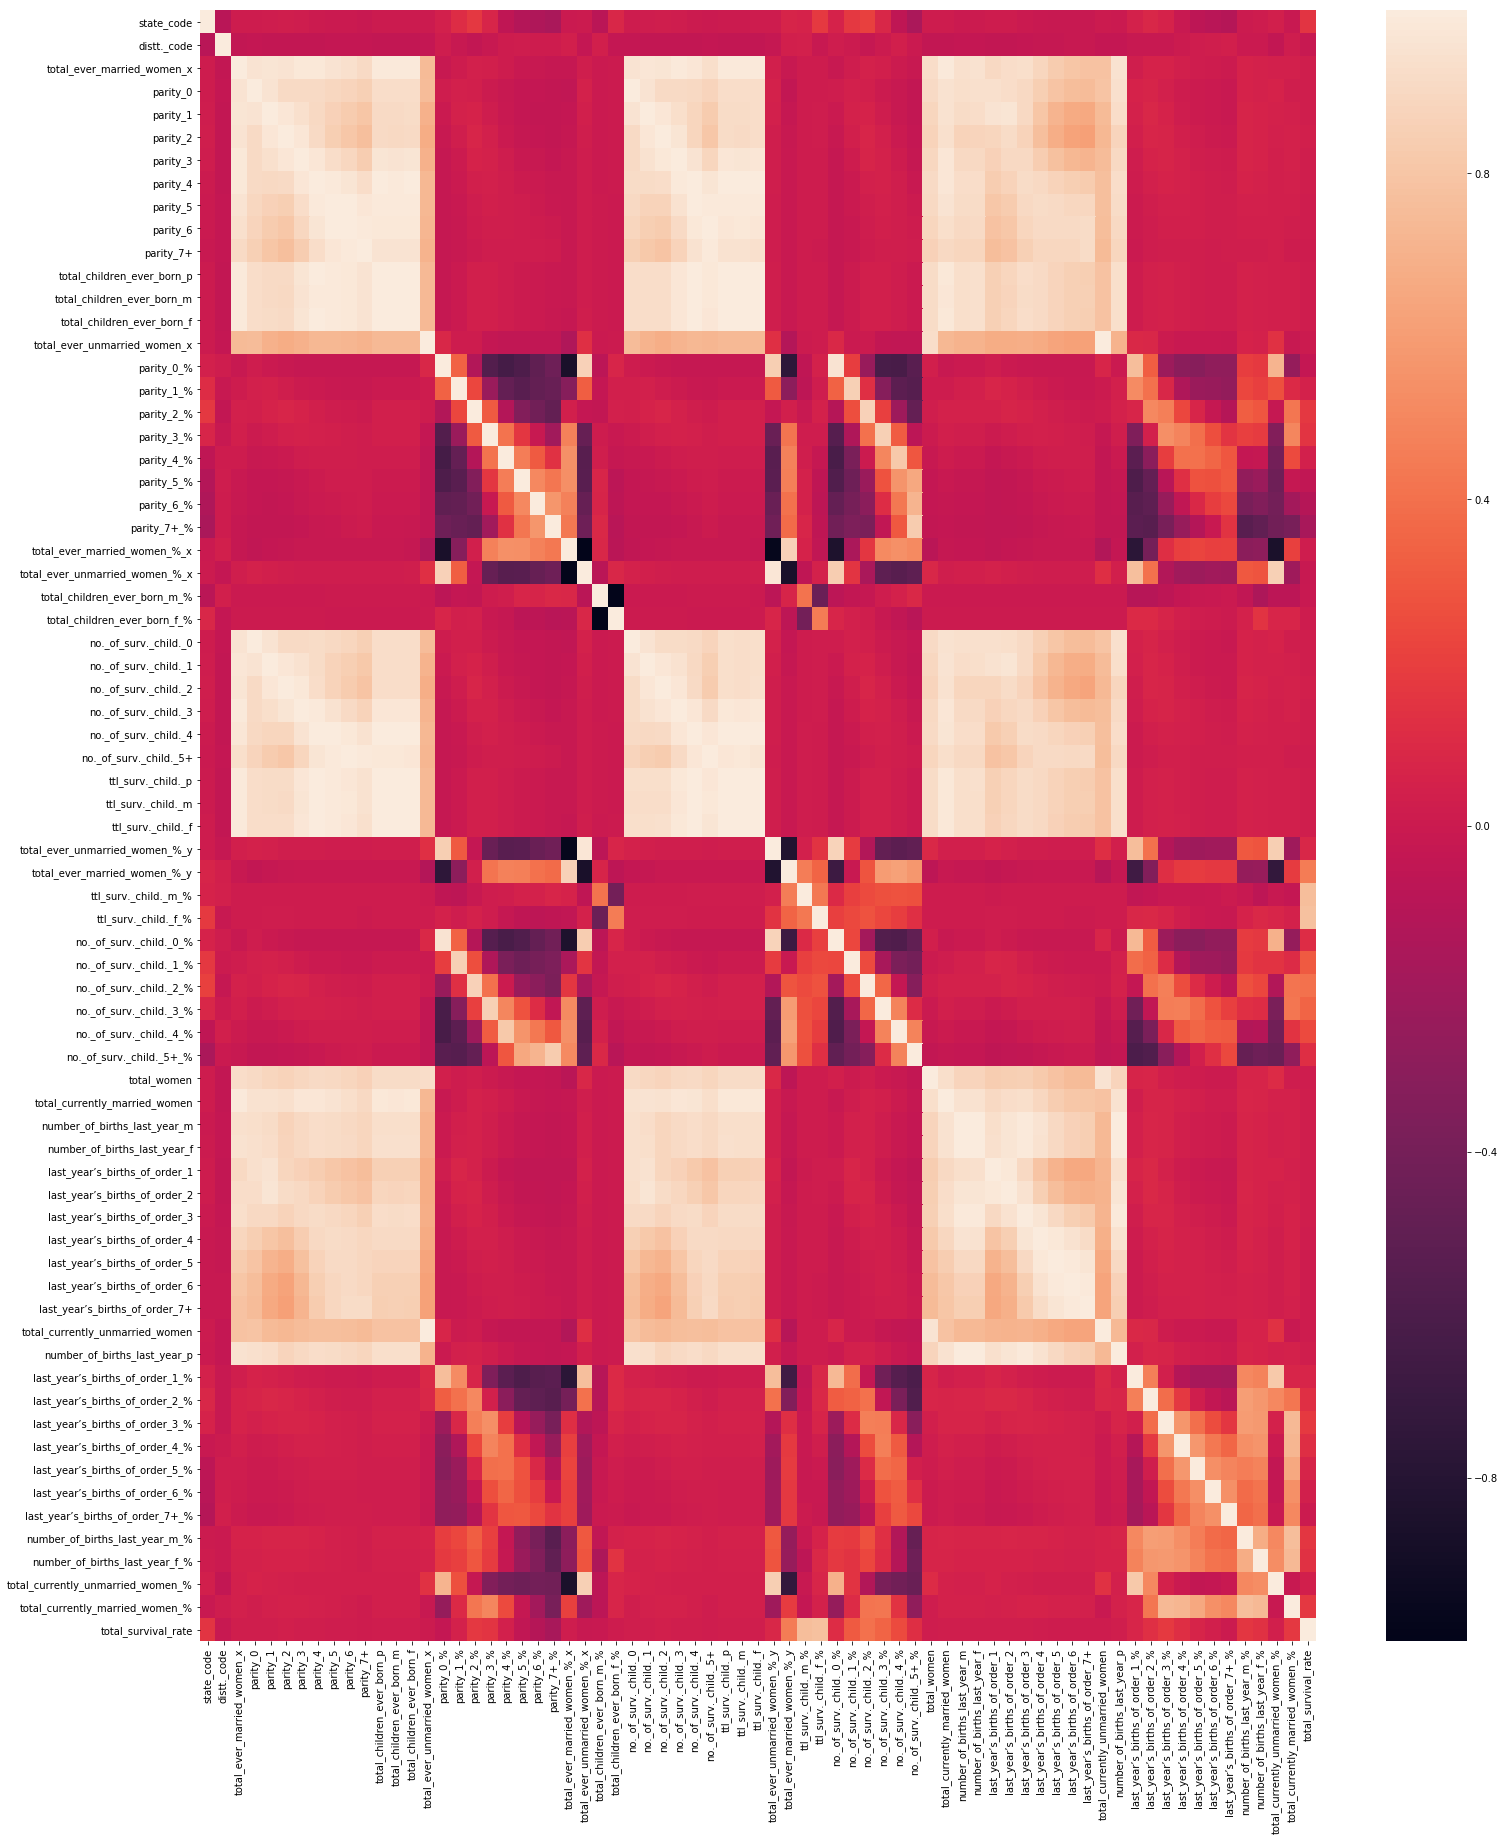

In [178]:
plt.figure(figsize = (25,30))
sns.heatmap(basic.corr())
plt.show()

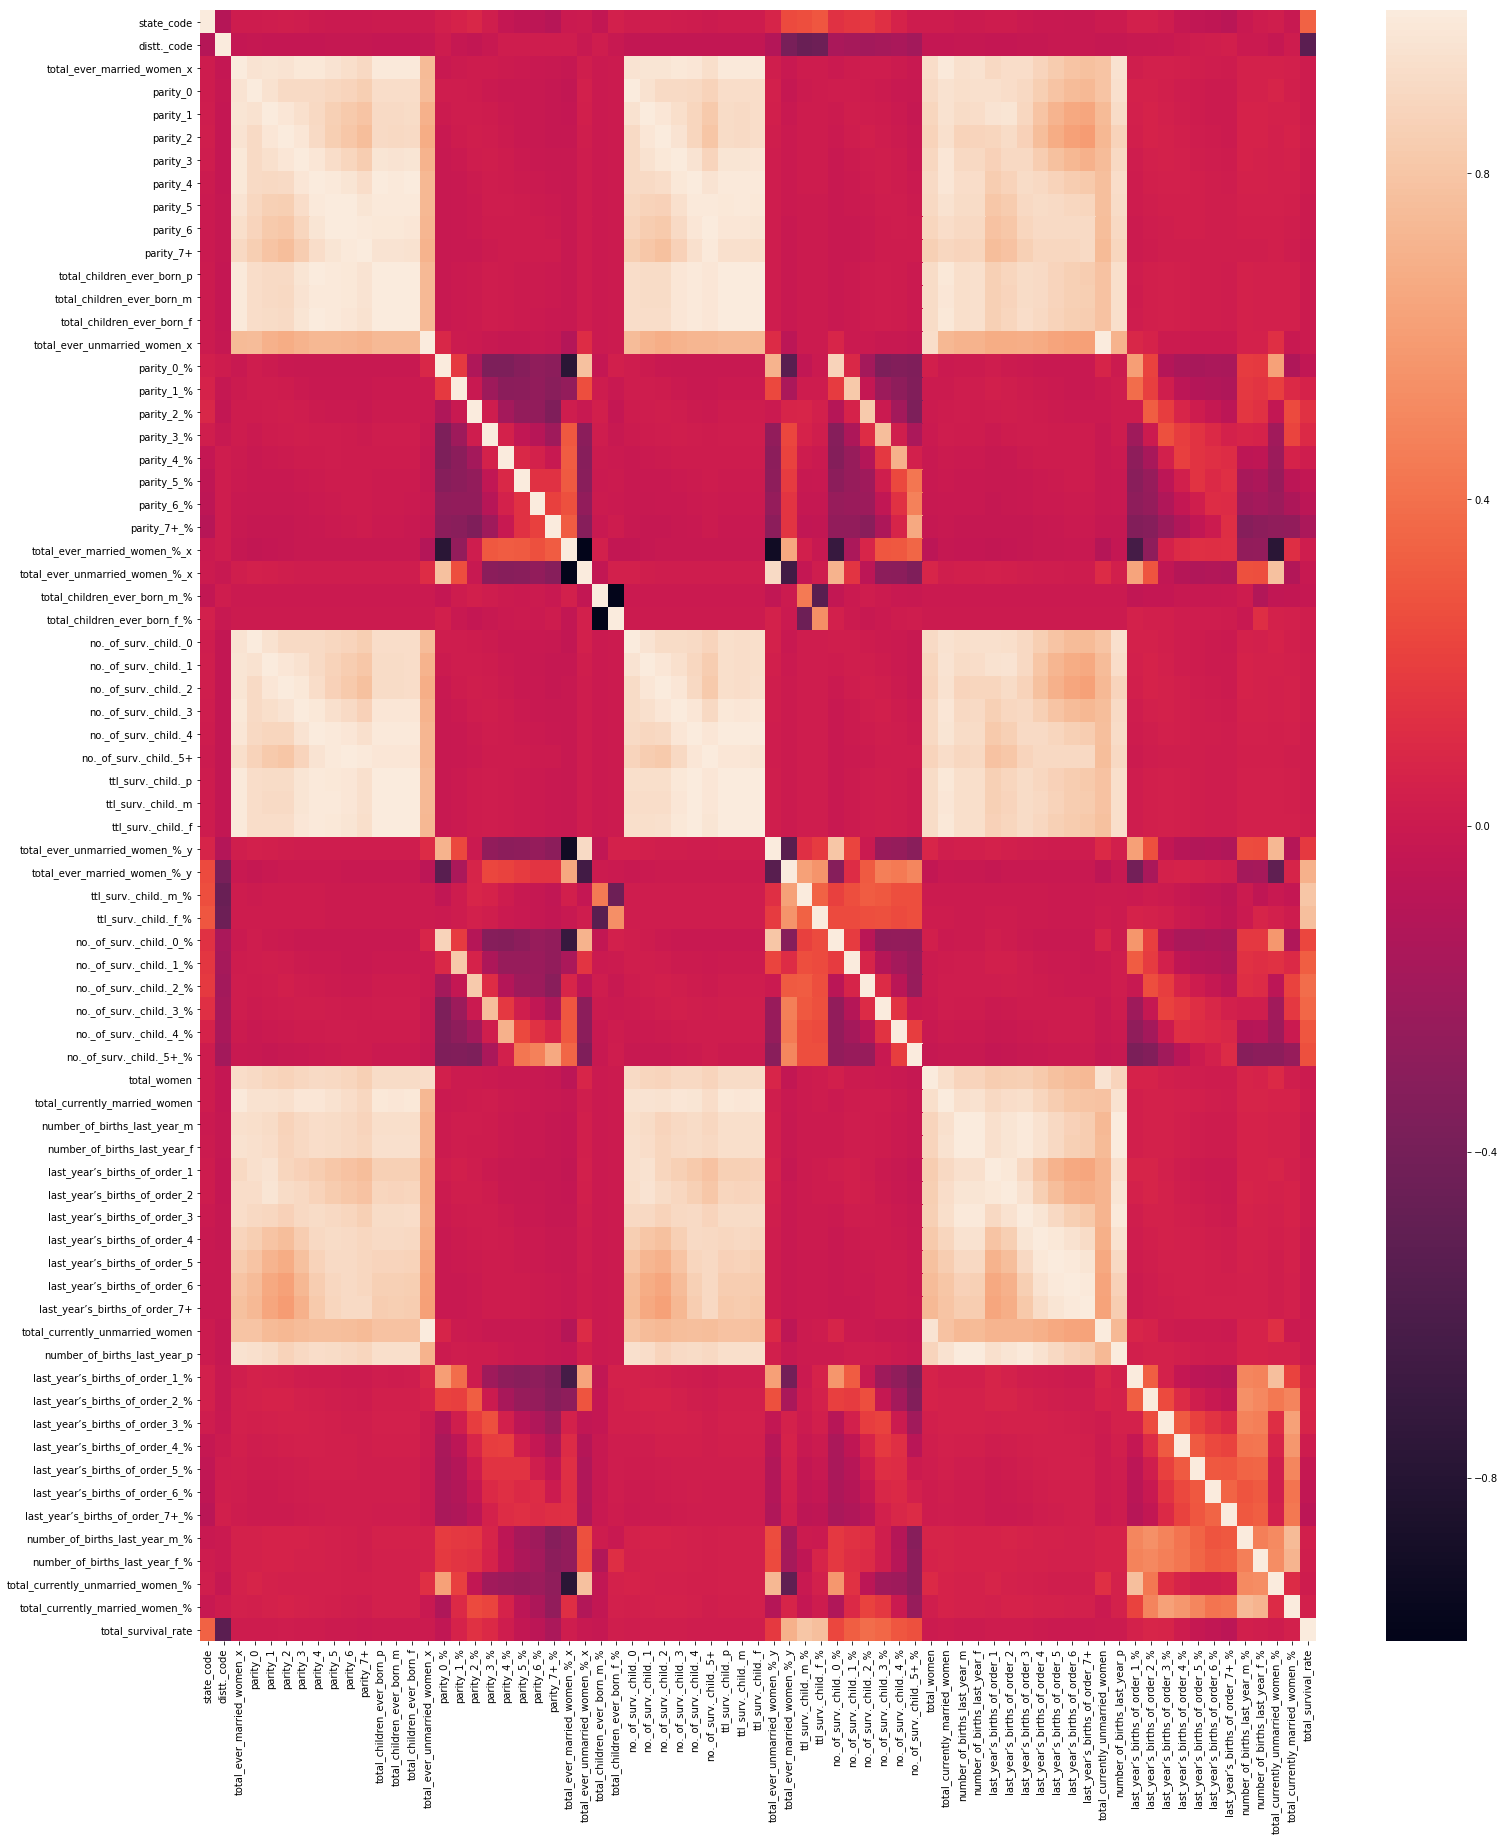

In [179]:
plt.figure(figsize = (25,30))
sns.heatmap(religion.corr())
plt.show()

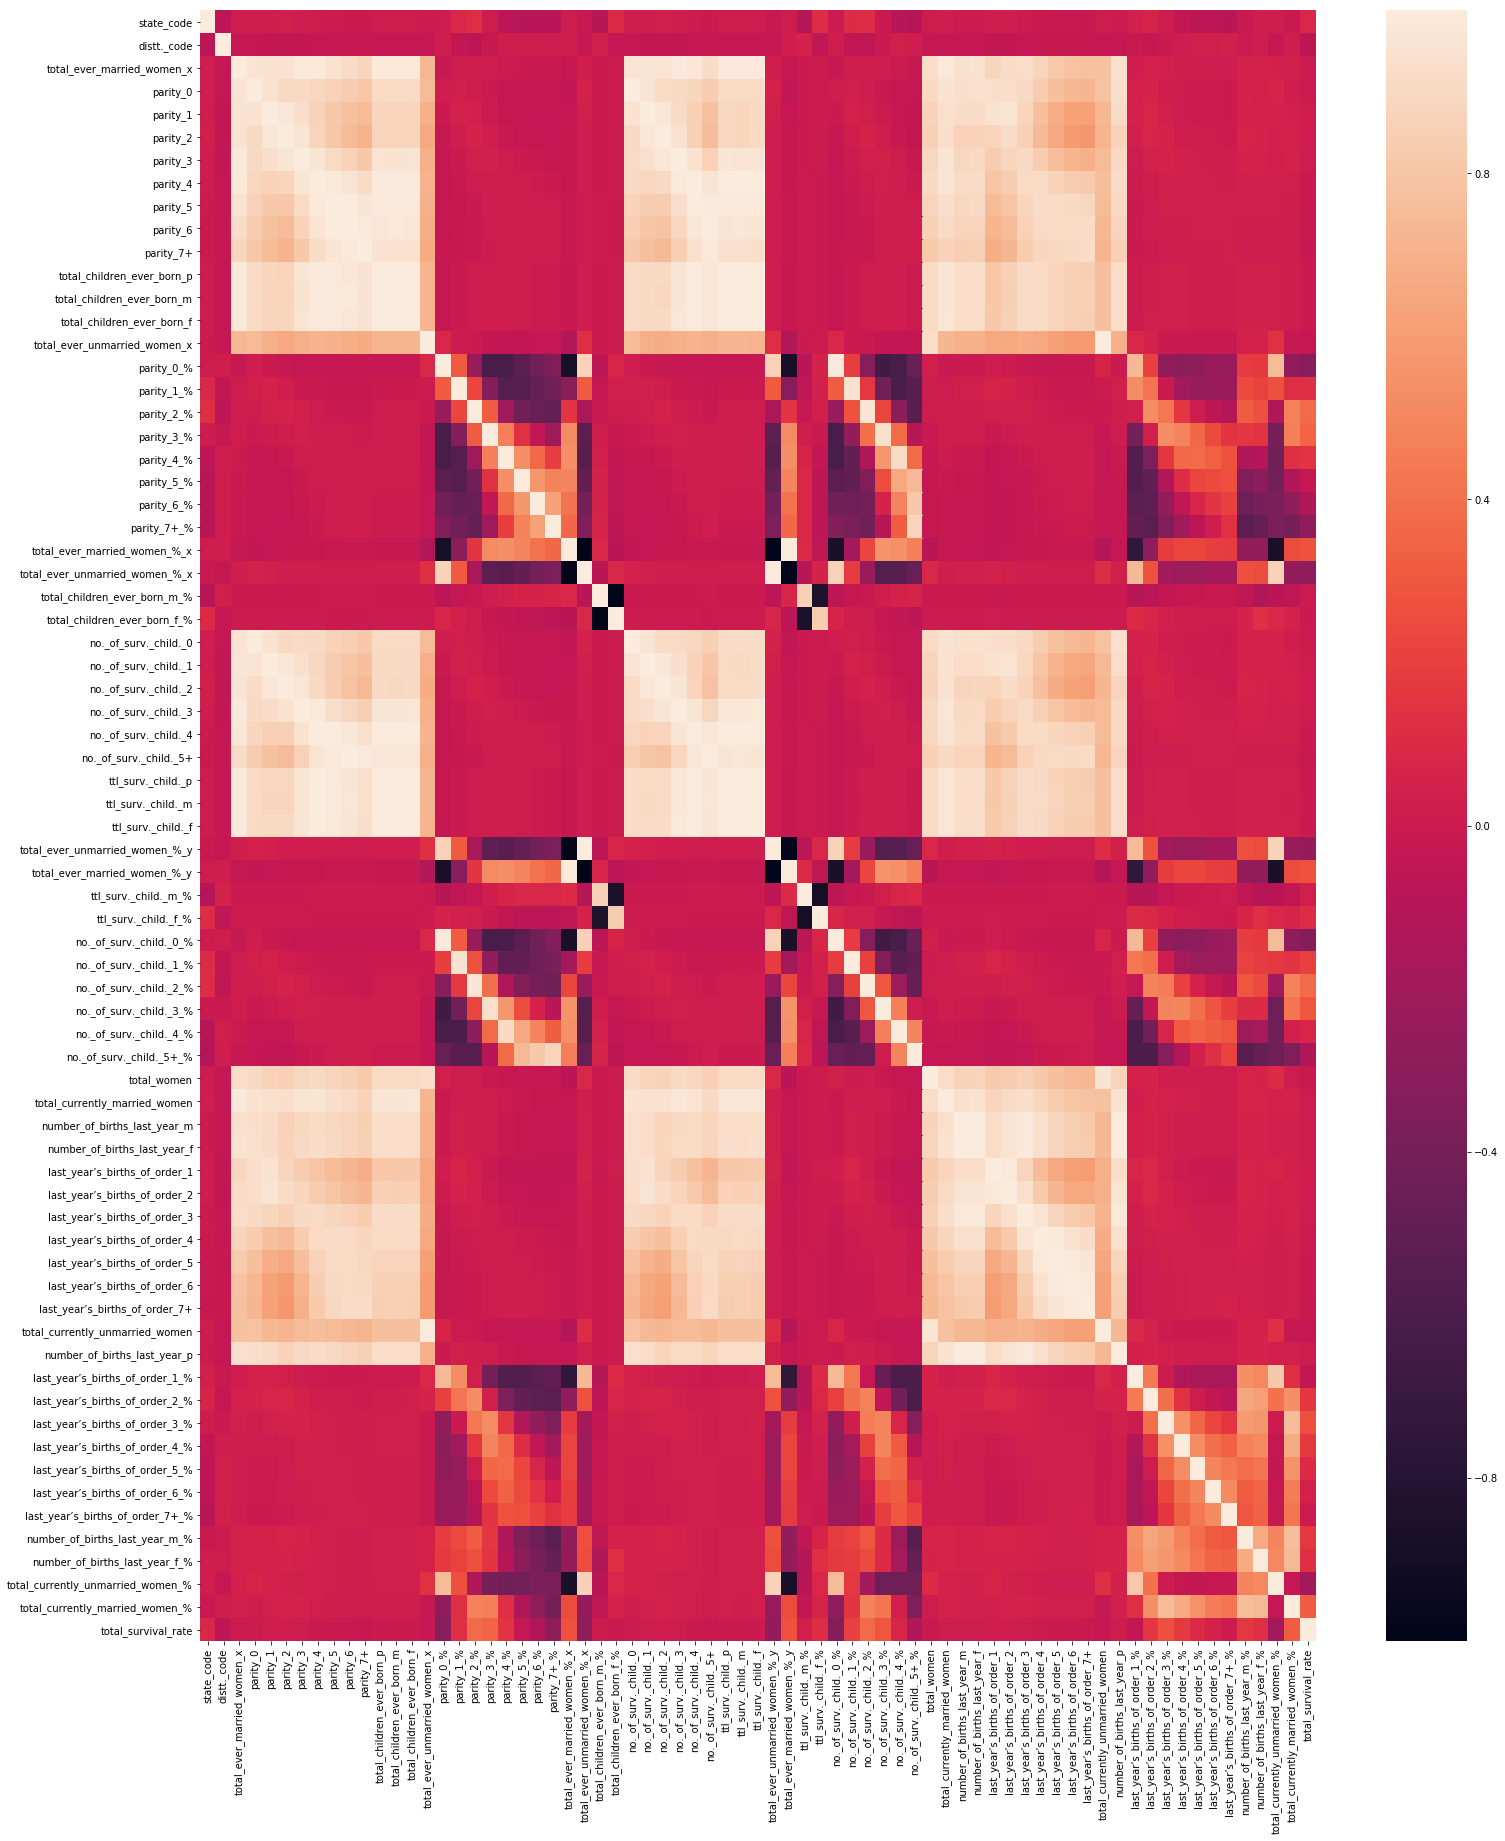

In [180]:
plt.figure(figsize = (25,30))
sns.heatmap(education.corr())
plt.show()

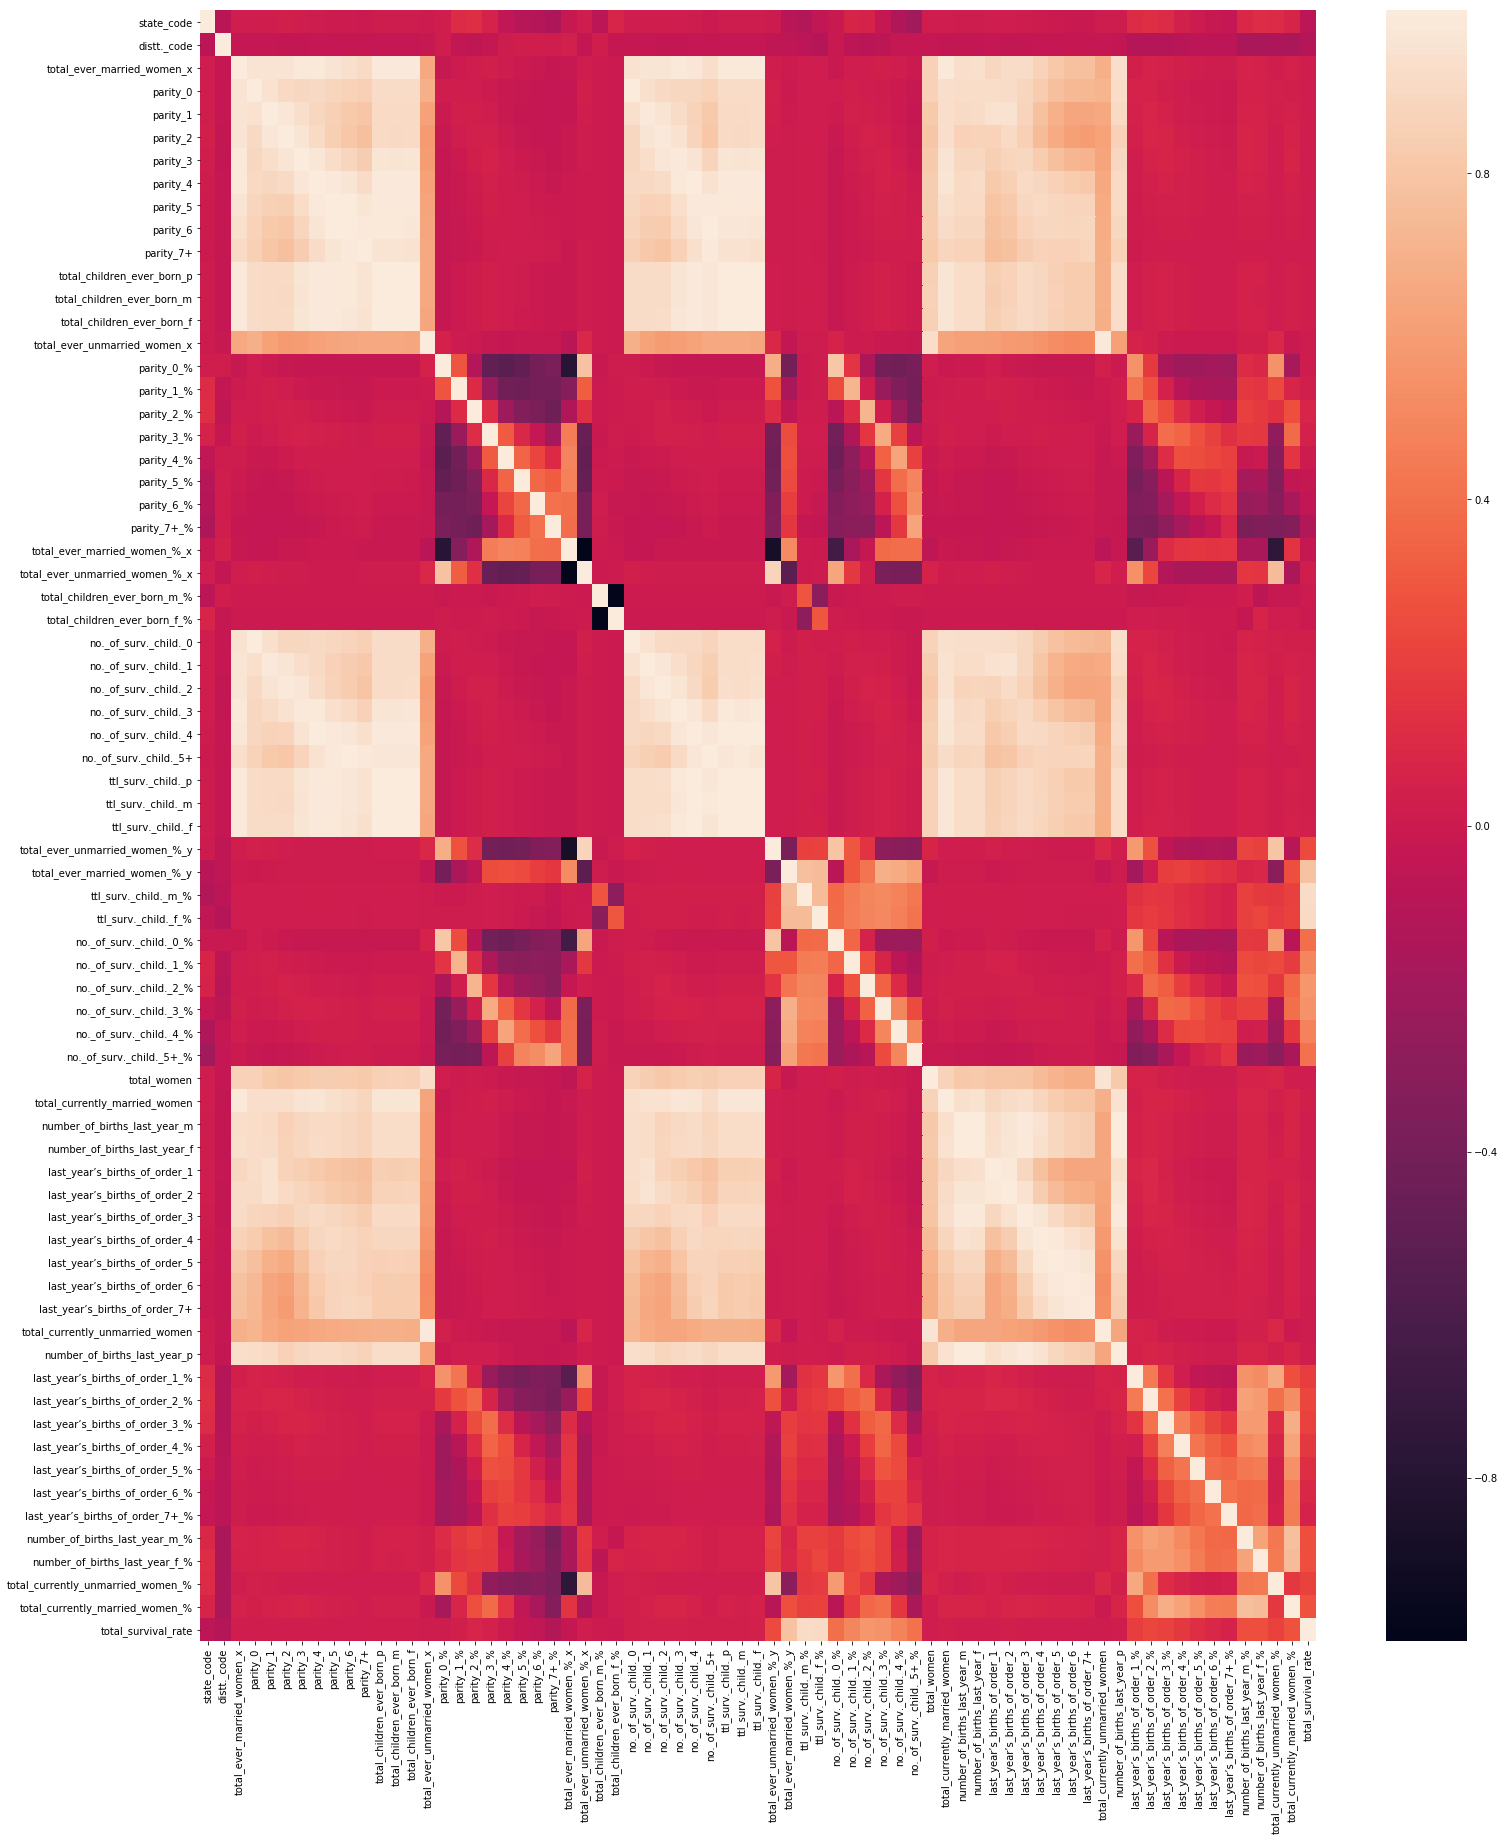

In [181]:
plt.figure(figsize = (25,30))
sns.heatmap(economics.corr())
plt.show()

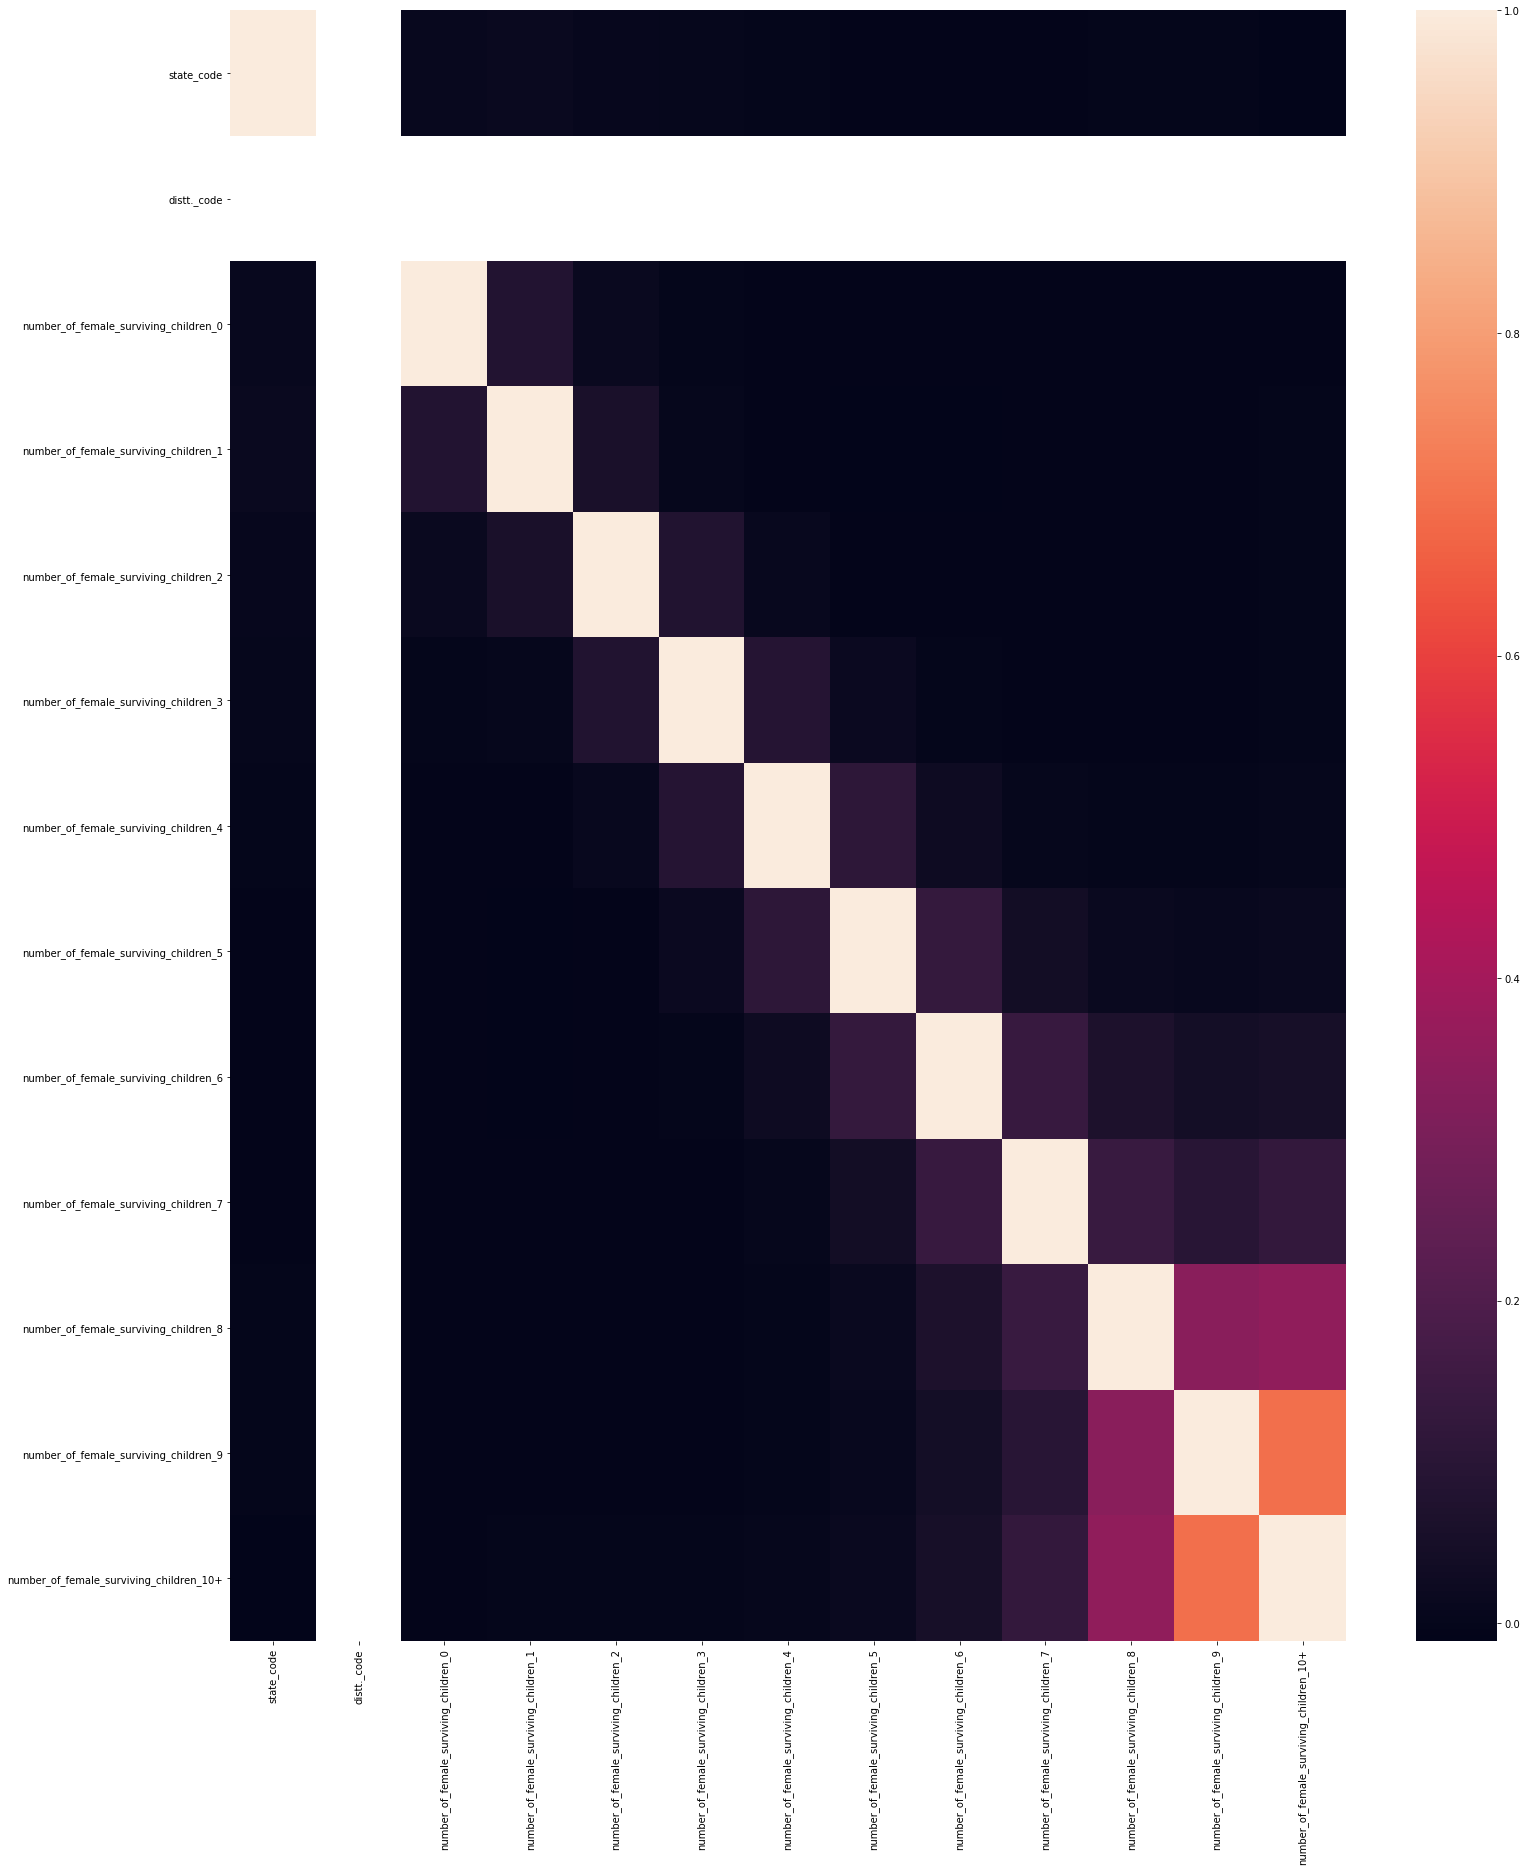

In [182]:
plt.figure(figsize = (25,30))
sns.heatmap(female_survive.corr())
plt.show()

# decision tree

# model 1

In [183]:
from sklearn import preprocessing

# select all categorical variables
df_categorical = basic.select_dtypes(include=['object'])
df_categorical.head()

area_name total/_rural/_urban   present_age all/sc/st
0     assam               total      all_ages       all
1     assam               total  less_than_15       all
2     assam               total         15-19       all
3     assam               total         20-24       all
4     assam               total         25-29       all

In [184]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

area_name  total/_rural/_urban  present_age  all/sc/st
0         27                    1           14          0
1         27                    1           15          0
2         27                    1            0          0
3         27                    1            1          0
4         27                    1            2          0

In [185]:
basic.head()

state_code  distt._code area_name total/_rural/_urban   present_age  \
0          18            0     assam               total      all_ages   
1          18            0     assam               total  less_than_15   
2          18            0     assam               total         15-19   
3          18            0     assam               total         20-24   
4          18            0     assam               total         25-29   

   total_ever_married_women_x  parity_0  parity_1  parity_2  parity_3  \
0                     6314946    931210    887716   1057759    985536   
1                       26743     19698      3631      3414         0   
2                      255701    168781     65091     14673      3410   
3                      738470    226672    261305    161846     58196   
4                     1024901    150400    211458    276890    203180   

          ...           last_year’s_births_of_order_3_%  \
0         ...                                 16.901697   
1         ...                                  0.000000   
2         ...                                  3.261944   
3         ...                                 13.608189   
4         ...                                 24.423777   

   last_year’s_births_of_order_4_%  last_year’s_births_of_order_5_%  \
0                        12.231814                         8.395391   
1                         0.000000                         0.000000   
2                         1.459638                         0.000000   
3                         4.278882                         1.217274   
4                        15.759782                         7.660538   

   last_year’s_births_of_order_6_%  last_year’s_births_of_order_7+_%  \
0                         5.699835                          8.357481   
1                         0.000000                          0.000000   
2                         0.000000                          0.000000   
3                         0.385771                          0.627059   
4                         3.065439                          2.356900   

   number_of_births_last_year_m_%  number_of_births_last_year_f_%  \
0                       51.342805                       48.657195   
1                       49.712092                       50.287908   
2                       51.970346                       48.029654   
3                       51.769202                       48.230798   
4                       51.859149                       48.140851   

  total_currently_unmarried_women_%  total_currently_married_women_%  \
0                         58.245714                        41.754286   
1                         99.506159                         0.493841   
2                         79.924197                        20.075803   
3                         37.714729                        62.285271   
4                         16.347906                        83.652094   

   total_survival_rate  
0             0.873233  
1             0.746247  
2             0.882609  
3             0.902914  
4             0.906400  

[5 rows x 75 columns]

In [186]:
# concat df_categorical with original df
df = basic.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

state_code  distt._code  total_ever_married_women_x  parity_0  parity_1  \
0          18            0                     6314946    931210    887716   
1          18            0                       26743     19698      3631   
2          18            0                      255701    168781     65091   
3          18            0                      738470    226672    261305   
4          18            0                     1024901    150400    211458   

   parity_2  parity_3  parity_4  parity_5  parity_6    ...      \
0   1057759    985536    801672    573579    398629    ...       
1      3414         0         0         0         0    ...       
2     14673      3410      3746         0         0    ...       
3    161846     58196     18418      5532      2089    ...       
4    276890    203180    107028     44505     16809    ...       

   last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
0                          8.357481                       51.342805   
1                          0.000000                       49.712092   
2                          0.000000                       51.970346   
3                          0.627059                       51.769202   
4                          2.356900                       51.859149   

   number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
0                       48.657195                          58.245714   
1                       50.287908                          99.506159   
2                       48.029654                          79.924197   
3                       48.230798                          37.714729   
4                       48.140851                          16.347906   

   total_currently_married_women_%  total_survival_rate  area_name  \
0                        41.754286             0.873233         27   
1                         0.493841             0.746247         27   
2                        20.075803             0.882609         27   
3                        62.285271             0.902914         27   
4                        83.652094             0.906400         27   

   total/_rural/_urban  present_age  all/sc/st  
0                    1           14          0  
1                    1           15          0  
2                    1            0          0  
3                    1            1          0  
4                    1            2          0  

[5 rows x 75 columns]

In [187]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82745 entries, 0 to 82744
Data columns (total 75 columns):
state_code                           82745 non-null int64
distt._code                          82745 non-null int64
total_ever_married_women_x           82745 non-null int64
parity_0                             82745 non-null int64
parity_1                             82745 non-null int64
parity_2                             82745 non-null int64
parity_3                             82745 non-null int64
parity_4                             82745 non-null int64
parity_5                             82745 non-null int64
parity_6                             82745 non-null int64
parity_7+                            82745 non-null int64
total_children_ever_born_p           82745 non-null int64
total_children_ever_born_m           82745 non-null int64
total_children_ever_born_f           82745 non-null int64
total_ever_unmarried_women_x         82745 non-null int64
parity_0_%           

In [188]:
df = df.astype(int)

In [189]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [190]:
# Putting feature variable to X
X = df.drop('total_survival_rate',axis=1)

# Putting response variable to y
y = df['total_survival_rate']

In [191]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

state_code  distt._code  total_ever_married_women_x  parity_0  \
66633           2            3                         617        30   
55963           9           47                         321        34   
26343          27           33                        1361       109   
76187          22            6                        4879       318   
26802          34            1                        1074        36   

       parity_1  parity_2  parity_3  parity_4  parity_5  parity_6    ...      \
66633        33       108       145       143        71        48    ...       
55963        28        50        53        51        33        29    ...       
26343       121       178       255       289       210       104    ...       
76187       373       663      1021       961       717       436    ...       
26802        70       349       330       175        70        26    ...       

       last_year’s_births_of_order_6_%  last_year’s_births_of_order_7+_%  \
66633                               10                                30   
55963                                0                                 0   
26343                                0                                 0   
76187                               17                                19   
26802                                6                                 6   

       number_of_births_last_year_m_%  number_of_births_last_year_f_%  \
66633                              70                              30   
55963                               0                               0   
26343                               0                               0   
76187                              52                              47   
26802                              62                              37   

       total_currently_unmarried_women_%  total_currently_married_women_%  \
66633                                 22                               77   
55963                                  0                                0   
26343                                  0                                0   
76187                                  8                               91   
26802                                 10                               89   

       area_name  total/_rural/_urban  present_age  all/sc/st  
66633        329                    0            5          2  
55963        173                    2            8          1  
26343        521                    2            9          0  
76187        250                    1            4          2  
26802        617                    2            4          0  

[5 rows x 74 columns]

In [192]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [193]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24213
           1       0.67      0.78      0.73       611

    accuracy                           0.99     24824
   macro avg       0.83      0.89      0.86     24824
weighted avg       0.99      0.99      0.99     24824



In [194]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[23982   231]
 [  132   479]]
0.9853770544634225


In [195]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['distt._code',
 'total_ever_married_women_x',
 'parity_0',
 'parity_1',
 'parity_2',
 'parity_3',
 'parity_4',
 'parity_5',
 'parity_6',
 'parity_7+',
 'total_children_ever_born_p',
 'total_children_ever_born_m',
 'total_children_ever_born_f',
 'total_ever_unmarried_women_x',
 'parity_0_%',
 'parity_1_%',
 'parity_2_%',
 'parity_3_%',
 'parity_4_%',
 'parity_5_%',
 'parity_6_%',
 'parity_7+_%',
 'total_ever_married_women_%_x',
 'total_ever_unmarried_women_%_x',
 'total_children_ever_born_m_%',
 'total_children_ever_born_f_%',
 'no._of_surv._child._0',
 'no._of_surv._child._1',
 'no._of_surv._child._2',
 'no._of_surv._child._3',
 'no._of_surv._child._4',
 'no._of_surv._child._5+',
 'ttl_surv._child._p',
 'ttl_surv._child._m',
 'ttl_surv._child._f',
 'total_ever_unmarried_women_%_y',
 'total_ever_married_women_%_y',
 'ttl_surv._child._m_%',
 'ttl_surv._child._f_%',
 'no._of_surv._child._0_%',
 'no._of_surv._child._1_%',
 'no._of_surv._child._2_%',
 'no._of_surv._child._3_%',
 'no._of_su

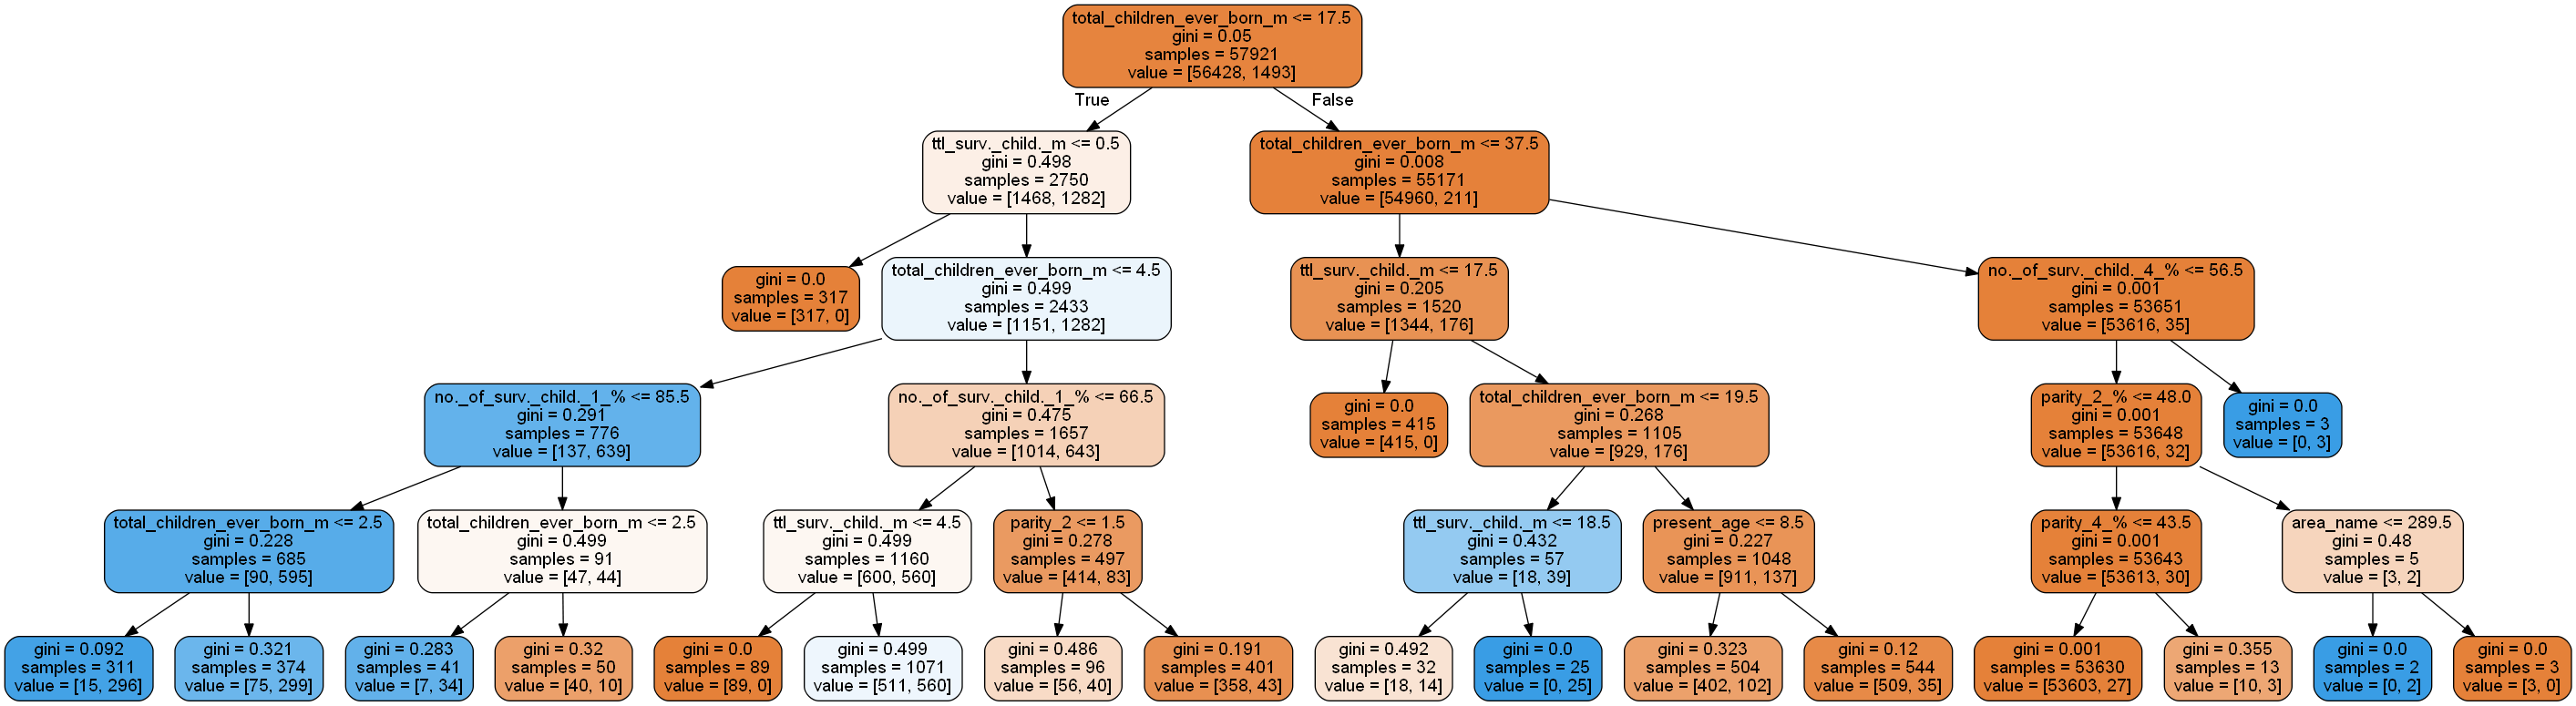

In [196]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [197]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [198]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.485334      0.044883         0.016845        0.002743   
1       0.680661      0.211844         0.009193        0.003596   
2       1.089185      0.187482         0.013792        0.003653   
3       1.495851      0.308427         0.015389        0.006647   
4       1.817174      0.213262         0.010996        0.003522   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.974191           0.974191   
1               2  {'max_depth': 2}           0.978075           0.975486   
2               3  {'max_depth': 3}           0.982477           0.982391   
3               4  {'max_depth': 4}           0.983341           0.982909   
4               5  {'max_depth': 5}           0.986016           0.984463   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.974191           0.974273       ...                0.974224   
1           0.977126           0.977899       ...                0.976951   
2           0.982477           0.981697       ...                0.982407   
3           0.982477           0.983769       ...                0.983132   
4           0.984808           0.986359       ...                0.985135   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000040               39            0.974232            0.974232   
1        0.000995               38            0.978742            0.976735   
2        0.000414               37            0.982584            0.983037   
3        0.000431               36            0.984246            0.983706   
4        0.000901               35            0.986771            0.984634   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.974232            0.974211            0.974211   
1            0.979152            0.980081            0.976564   
2            0.983037            0.983210            0.982930   
3            0.983274            0.985045            0.983664   
4            0.986317            0.988066            0.984850   

   mean_train_score  std_train_score  
0          0.974224         0.000010  
1          0.978255         0.001382  
2          0.982960         0.000208  
3          0.983987         0.000613  
4          0.986128         0.001270  

[5 rows x 21 columns]

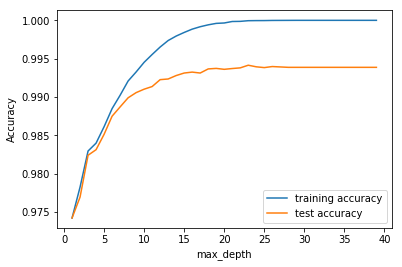

In [199]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [200]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [201]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.987819      0.877296         0.021880        0.007662   
1       3.456672      0.592095         0.015626        0.009884   
2       2.951506      0.838242         0.019659        0.006086   
3       2.456859      0.718660         0.014430        0.002221   
4       2.482708      0.295934         0.015194        0.003186   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.993871   
1                     25  {'min_samples_leaf': 25}           0.991541   
2                     45  {'min_samples_leaf': 45}           0.988779   
3                     65  {'min_samples_leaf': 65}           0.987397   
4                     85  {'min_samples_leaf': 85}           0.987484   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.993008           0.996461           0.993093       ...          
1           0.992404           0.992490           0.992144       ...          
2           0.988347           0.990246           0.987827       ...          
3           0.984549           0.989901           0.986273       ...          
4           0.985498           0.988347           0.985841       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.994147        0.001254                1            0.997497   
1         0.992179        0.000339                2            0.992921   
2         0.989158        0.001078                3            0.989490   
3         0.987397        0.001886                4            0.988842   
4         0.986792        0.001046                5            0.988497   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.997216            0.998187            0.997346   
1            0.993504            0.994842            0.992404   
2            0.990483            0.991195            0.990095   
3            0.986727            0.990159            0.988778   
4            0.986512            0.989339            0.987699   

   split4_train_score  mean_train_score  std_train_score  
0            0.997820          0.997613         0.000351  
1            0.993440          0.993422         0.000814  
2            0.990785          0.990409         0.000584  
3            0.989577          0.988817         0.001162  
4            0.987505          0.987910         0.000954  

[5 rows x 21 columns]

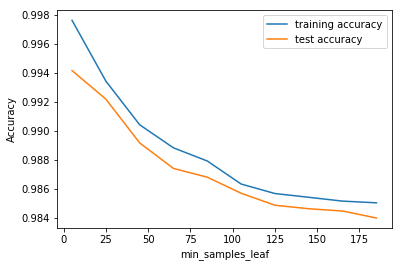

In [202]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [203]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [204]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.364425      0.694666         0.014395        0.007733   
1       4.218399      0.725496         0.024619        0.007618   
2       4.221041      0.697673         0.016590        0.008447   
3       4.345106      0.535935         0.020223        0.006206   
4       4.213175      0.813513         0.024998        0.007654   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.994994   
1                      25  {'min_samples_split': 25}           0.993785   
2                      45  {'min_samples_split': 45}           0.993267   
3                      65  {'min_samples_split': 65}           0.991800   
4                      85  {'min_samples_split': 85}           0.992059   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.992145           0.995598           0.993266       ...          
1           0.992145           0.994735           0.993266       ...          
2           0.992145           0.994389           0.991712       ...          
3           0.992490           0.994130           0.991885       ...          
4           0.993095           0.993871           0.991194       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.994216        0.001300                1            0.999633   
1         0.993664        0.000911                2            0.997194   
2         0.993042        0.000987                3            0.995727   
3         0.992801        0.000950                4            0.994367   
4         0.992542        0.000908                5            0.994302   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999137            0.999568            0.999525   
1            0.996828            0.998058            0.997151   
2            0.995187            0.996871            0.995274   
3            0.994518            0.996461            0.994583   
4            0.994151            0.995123            0.993828   

   split4_train_score  mean_train_score  std_train_score  
0            0.999396          0.999452         0.000176  
1            0.996936          0.997233         0.000434  
2            0.995641          0.995740         0.000602  
3            0.995339          0.995054         0.000780  
4            0.993698          0.994221         0.000500  

[5 rows x 21 columns]

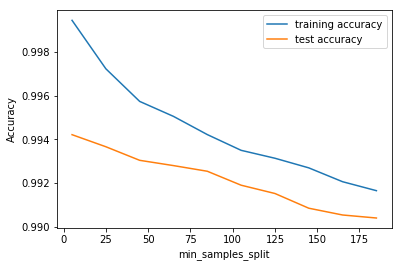

In [205]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [206]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 15, 3),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 150, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 18.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 15, 3),
                      

In [207]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.652493      0.054147         0.015034        0.004216   
1         0.632062      0.128261         0.017643        0.005433   
2         0.618500      0.275432         0.015298        0.008882   
3         0.644021      0.209017         0.015811        0.009889   
4         0.656194      0.100380         0.016766        0.001694   
5         0.707988      0.055604         0.021665        0.007396   
6         0.655180      0.180440         0.017771        0.006887   
7         0.581914      0.237872         0.015622        0.013972   
8         0.616473      0.115670         0.011724        0.006096   
9         0.614561      0.233295         0.015071        0.009688   
10        0.670579      0.056811         0.019570        0.006537   
11        0.640711      0.031869         0.015893        0.001427   
12        1.639011      0.401004         0.019193        0.006336   
13        1.819871      0.379528         0.020894        0.011428   
14        1.739188      0.506764         0.015373        0.010833   
15        1.718143      0.372242         0.018767        0.006241   
16        1.629437      0.280554         0.018897        0.011809   
17        1.592175      0.236694         0.015538        0.003528   
18        1.644929      0.273241         0.014246        0.001951   
19        1.681082      0.287659         0.015812        0.008452   
20        1.757182      0.304074         0.015626        0.000004   
21        1.741016      0.363333         0.021424        0.007136   
22        1.674966      0.322823         0.015047        0.002601   
23        1.464703      0.356615         0.014990        0.005211   
24        1.863802      0.177583         0.017273        0.004856   
25        1.820975      0.509206         0.019302        0.006313   
26        1.706412      0.311917         0.016509        0.010037   
27        1.683007      0.470712         0.019826        0.006083   
28        1.596700      0.289981         0.019623        0.006057   
29        1.861427      0.279206         0.018392        0.003775   
..             ...           ...              ...             ...   
90        2.586729      0.495937         0.014917        0.009909   
91        2.517275      0.312970         0.023148        0.012113   
92        2.422048      0.394735         0.019421        0.011589   
93        2.579180      0.554082         0.016873        0.008052   
94        2.507219      0.369483         0.015462        0.010830   
95        2.427079      0.182850         0.014298        0.000937   
96        2.606661      0.189259         0.012243        0.006128   
97        2.655253      0.272510         0.020221        0.006209   
98        2.450919      0.167468         0.015624        0.000006   
99        2.598131      0.127371         0.018754        0.006254   
100       2.259310      0.186386         0.015625        0.009880   
101       2.542994      0.396886         0.018591        0.004361   
102       2.456147      0.207949         0.014792        0.003427   
103       2.380444      0.271552         0.013395        0.007964   
104       2.367142      0.324394         0.019876        0.006266   
105       2.319528      0.335408         0.018592        0.005495   
106       2.364654      0.299750         0.017171        0.007306   
107       2.338824      0.246104         0.016860        0.001345   
108       2.413119      0.197977         0.012795        0.007625   
109       2.326044      0.229473         0.018514        0.005532   
110       2.554518      0.134413         0.014687        0.003048   
111       2.493322      0.384271         0.018266        0.003391   
112       2.638715      0.345730         0.011993        0.006225   
113       2.536574      0.307969         0.015319        0.003310   
114       2.514112      0.077285         0.015844        0.008204   
115       2.603387      0.334489         0.017119        0.003458   
116

In [208]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9912121682981992
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [209]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=102,
                                  min_samples_split=100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=102, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [210]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9882371898163068

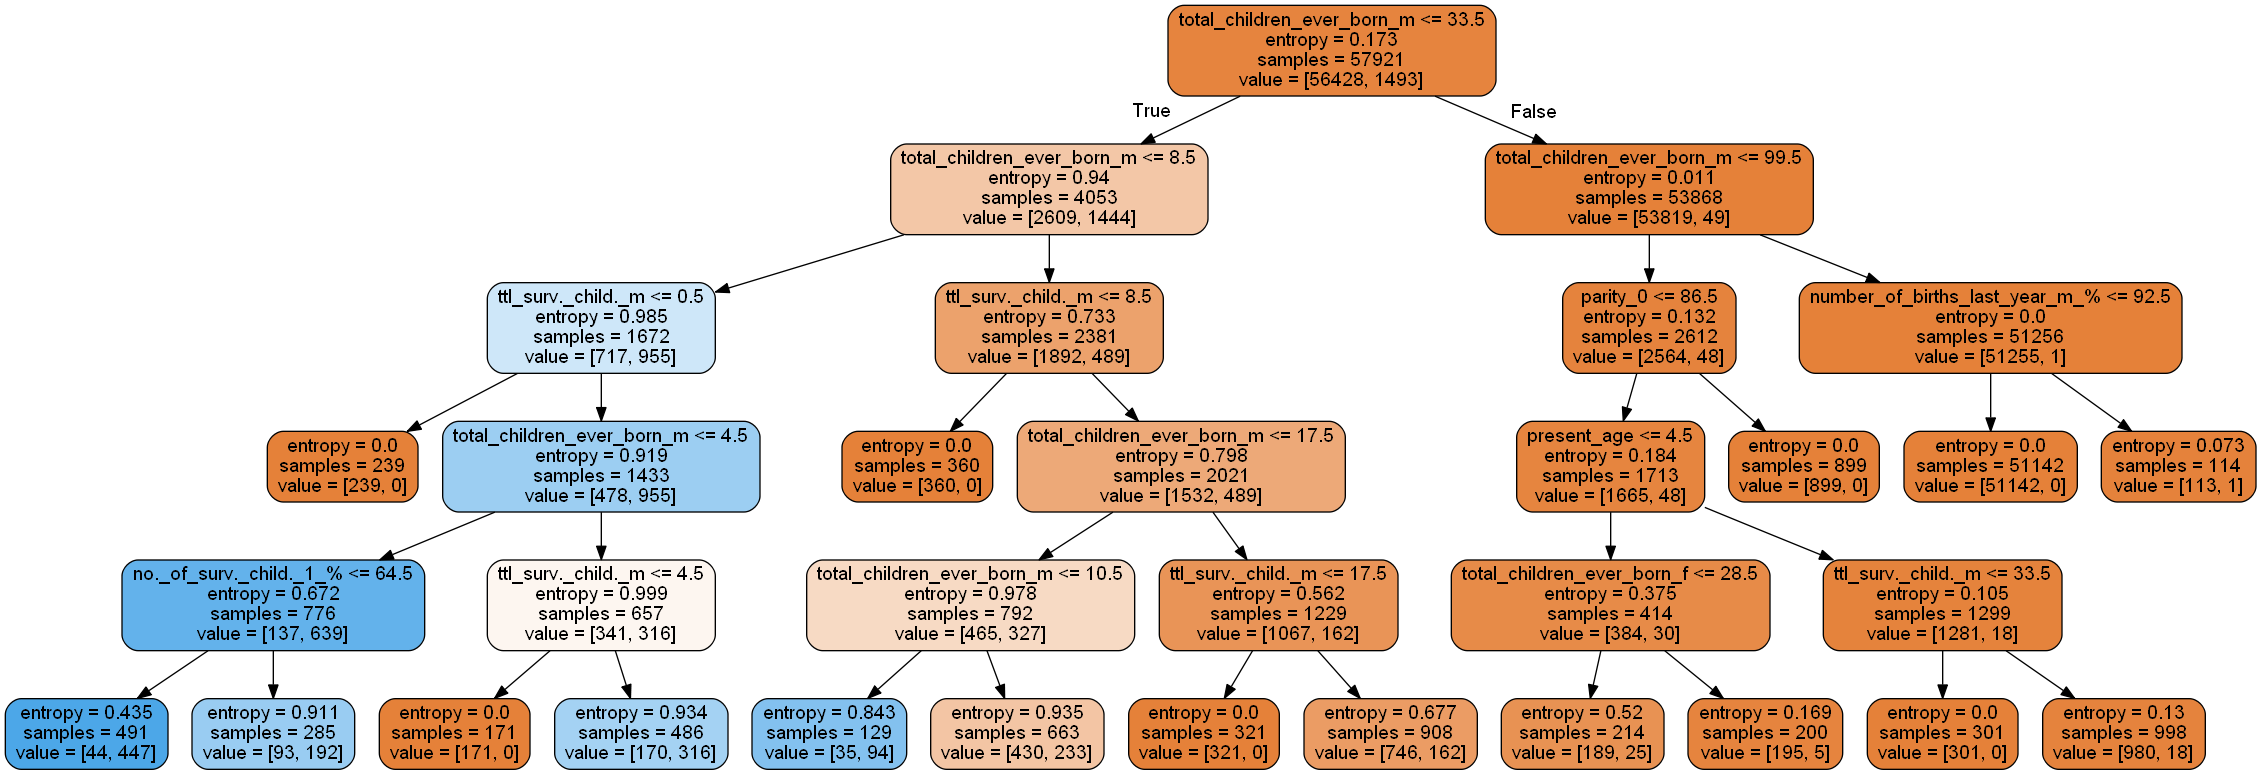

In [211]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [212]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24213
           1       0.78      0.73      0.75       611

    accuracy                           0.99     24824
   macro avg       0.88      0.86      0.87     24824
weighted avg       0.99      0.99      0.99     24824



In [213]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[24084   129]
 [  163   448]]


# model 2

In [214]:
from sklearn import preprocessing

# select all categorical variables
df_categorical = education.select_dtypes(include=['object'])
df_categorical.head()

area_name total/_rural/_urban educational_level  \
0  andaman_&_nicobar_islands               total             total   
1  andaman_&_nicobar_islands               total             total   
2  andaman_&_nicobar_islands               total             total   
3  andaman_&_nicobar_islands               total             total   
4  andaman_&_nicobar_islands               total             total   

    present_age  
0      all_ages  
1  less_than_15  
2         15-19  
3         20-24  
4         25-29

In [215]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

area_name  total/_rural/_urban  educational_level  present_age
0         20                    1                  7           14
1         20                    1                  7           15
2         20                    1                  7            0
3         20                    1                  7            1
4         20                    1                  7            2

In [216]:
education

state_code  distt._code                  area_name  \
0               35            0  andaman_&_nicobar_islands   
1               35            0  andaman_&_nicobar_islands   
2               35            0  andaman_&_nicobar_islands   
3               35            0  andaman_&_nicobar_islands   
4               35            0  andaman_&_nicobar_islands   
5               35            0  andaman_&_nicobar_islands   
6               35            0  andaman_&_nicobar_islands   
7               35            0  andaman_&_nicobar_islands   
8               35            0  andaman_&_nicobar_islands   
9               35            0  andaman_&_nicobar_islands   
10              35            0  andaman_&_nicobar_islands   
11              35            0  andaman_&_nicobar_islands   
12              35            0  andaman_&_nicobar_islands   
13              35            0  andaman_&_nicobar_islands   
14              35            0  andaman_&_nicobar_islands   
15              35            0  andaman_&_nicobar_islands   
16              35            0  andaman_&_nicobar_islands   
17              35            0  andaman_&_nicobar_islands   
18              35            0  andaman_&_nicobar_islands   
19              35            0  andaman_&_nicobar_islands   
20              35            0  andaman_&_nicobar_islands   
21              35            0  andaman_&_nicobar_islands   
22              35            0  andaman_&_nicobar_islands   
23              35            0  andaman_&_nicobar_islands   
24              35            0  andaman_&_nicobar_islands   
25              35            0  andaman_&_nicobar_islands   
26              35            0  andaman_&_nicobar_islands   
27              35            0  andaman_&_nicobar_islands   
28              35            0  andaman_&_nicobar_islands   
29              35            0  andaman_&_nicobar_islands   
...            ...          ...                        ...   
216254          20           18            purbi_singhbhum   
216255          20           18            purbi_singhbhum   
216256          20           18            purbi_singhbhum   
216257          20           18            purbi_singhbhum   
216258          20           18            purbi_singhbhum   
216259          20           18            purbi_singhbhum   
216260          20           18            purbi_singhbhum   
216261          20           18            purbi_singhbhum   
216262          20           18            purbi_singhbhum   
216263          20           18            purbi_singhbhum   
216264          20           18            purbi_singhbhum   
216265          20           18            purbi_singhbhum   
216266          20           18            purbi_singhbhum   
216267          20           18            purbi_singhbhum   
216268          20           18            purbi_singhbhum   
216269          20           18            purbi_singhbhum   
216270          20           18            purbi_singhbhum   
216271          20           18            purbi_singhbhum   
216272          20           18            purbi_singhbhum   
216273          20           18            purbi_singhbhum   
216274          20           18            purbi_singhbhum   
216275          20           18            purbi_singhbhum   
216276          20           18            purbi_singhbhum   
216277          20           18            purbi_singhbhum   
216278          20           18            purbi_singhbhum   
216279          20           18            purbi_singhbhum   
216280          20           18            purbi_singhbhum   
216281          20           18            purbi_singhbhum   
216282          20           18            purbi_singhbhum   
216283          20           18            purbi_singhbhum   

       total/_rural/_urban                       educational_level  \
0                    total                                   total   
1                    to

In [217]:
# concat df_categorical with original df
df = education.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

state_code  distt._code  total_ever_married_women_x  parity_0  parity_1  \
0          35            0                       86539      8869     13311   
1          35            0                         177       103        24   
2          35            0                        2293      1556       579   
3          35            0                       10933      2920      4195   
4          35            0                       15374      1719      3486   

   parity_2  parity_3  parity_4  parity_5  parity_6     ...       \
0     22224     17046     10201      5828      3407     ...        
1        50         0         0         0         0     ...        
2       109        24        25         0         0     ...        
3      2950       656       106        22        10     ...        
4      6056      3006       710       200        43     ...        

   last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
0                          2.344140                       50.540316   
1                          0.000000                       25.000000   
2                          0.000000                       47.928994   
3                          0.963956                       49.245599   
4                          0.987526                       51.351351   

   number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
0                       49.459684                          52.662704   
1                       75.000000                          99.728635   
2                       52.071006                          87.300958   
3                       50.754401                          38.092766   
4                       48.648649                          13.150622   

   total_currently_married_women_%  total_survival_rate  area_name  \
0                        47.337296             0.890245         20   
1                         0.271365             0.903226         20   
2                        12.699042             0.926729         20   
3                        61.907234             0.930503         20   
4                        86.849378             0.928257         20   

   total/_rural/_urban  educational_level  present_age  
0                    1                  7           14  
1                    1                  7           15  
2                    1                  7            0  
3                    1                  7            1  
4                    1                  7            2  

[5 rows x 75 columns]

In [218]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216284 entries, 0 to 216283
Data columns (total 75 columns):
state_code                           216284 non-null int64
distt._code                          216284 non-null int64
total_ever_married_women_x           216284 non-null int64
parity_0                             216284 non-null int64
parity_1                             216284 non-null int64
parity_2                             216284 non-null int64
parity_3                             216284 non-null int64
parity_4                             216284 non-null int64
parity_5                             216284 non-null int64
parity_6                             216284 non-null int64
parity_7+                            216284 non-null int64
total_children_ever_born_p           216284 non-null int64
total_children_ever_born_m           216284 non-null int64
total_children_ever_born_f           216284 non-null int64
total_ever_unmarried_women_x         216284 non-null int64
pari

In [219]:
df = df.astype(int)

In [220]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [221]:
# Putting feature variable to X
X = df.drop('total_survival_rate',axis=1)

# Putting response variable to y
y = df['total_survival_rate']

In [222]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

state_code  distt._code  total_ever_married_women_x  parity_0  \
96116            9           52                         270        30   
99912            9           62                        5280       731   
152482           1           10                        1521       303   
1195            26            0                        2046       498   
106734          19            9                        1738       918   

        parity_1  parity_2  parity_3  parity_4  parity_5  parity_6  \
96116         19        36        48        36        33        29   
99912        491       461       611       718       647       607   
152482       396       552       211        38        10         1   
1195         515       627       279        90        20        10   
106734       714        65         7         5         3         3   

           ...       last_year’s_births_of_order_6_%  \
96116      ...                                     0   
99912      ...                                     0   
152482     ...                                     0   
1195       ...                                     0   
106734     ...                                     0   

        last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
96116                                  0                              33   
99912                                  0                               0   
152482                                 0                              61   
1195                                   0                              46   
106734                                 2                              49   

        number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
96116                               66                                 18   
99912                                0                                  0   
152482                              38                                 13   
1195                                53                                 33   
106734                              50                                 62   

        total_currently_married_women_%  area_name  total/_rural/_urban  \
96116                                81         39                    1   
99912                                 0        350                    0   
152482                               86        542                    0   
1195                                 66        114                    0   
106734                               37         49                    0   

        educational_level  present_age  
96116                   4            7  
99912                   1           13  
152482                  4            2  
1195                    4           14  
106734                  0            1  

[5 rows x 74 columns]

In [223]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [224]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     63106
           1       0.78      0.58      0.67      1780

    accuracy                           0.98     64886
   macro avg       0.88      0.79      0.83     64886
weighted avg       0.98      0.98      0.98     64886



In [225]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[62806   300]
 [  742  1038]]
0.9839410658693709


In [226]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['distt._code',
 'total_ever_married_women_x',
 'parity_0',
 'parity_1',
 'parity_2',
 'parity_3',
 'parity_4',
 'parity_5',
 'parity_6',
 'parity_7+',
 'total_children_ever_born_p',
 'total_children_ever_born_m',
 'total_children_ever_born_f',
 'total_ever_unmarried_women_x',
 'parity_0_%',
 'parity_1_%',
 'parity_2_%',
 'parity_3_%',
 'parity_4_%',
 'parity_5_%',
 'parity_6_%',
 'parity_7+_%',
 'total_ever_married_women_%_x',
 'total_ever_unmarried_women_%_x',
 'total_children_ever_born_m_%',
 'total_children_ever_born_f_%',
 'no._of_surv._child._0',
 'no._of_surv._child._1',
 'no._of_surv._child._2',
 'no._of_surv._child._3',
 'no._of_surv._child._4',
 'no._of_surv._child._5+',
 'ttl_surv._child._p',
 'ttl_surv._child._m',
 'ttl_surv._child._f',
 'total_ever_unmarried_women_%_y',
 'total_ever_married_women_%_y',
 'ttl_surv._child._m_%',
 'ttl_surv._child._f_%',
 'no._of_surv._child._0_%',
 'no._of_surv._child._1_%',
 'no._of_surv._child._2_%',
 'no._of_surv._child._3_%',
 'no._of_su

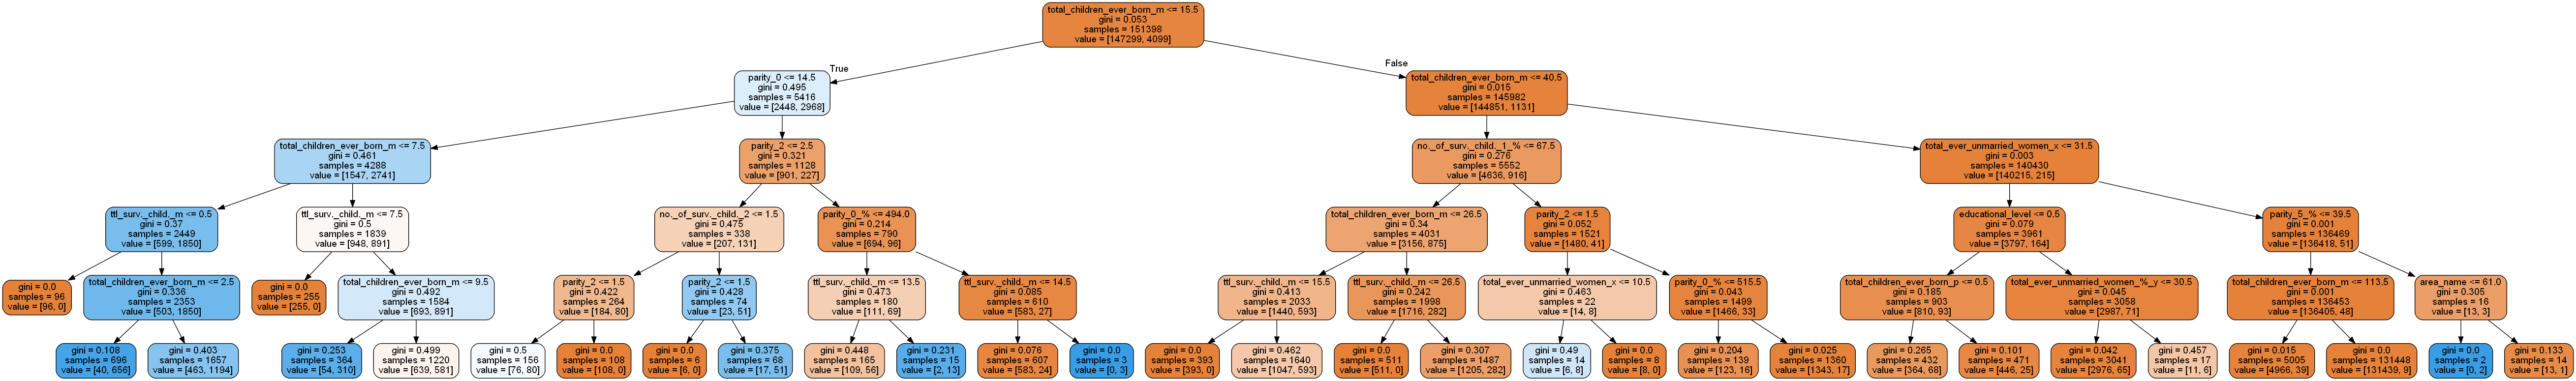

In [227]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [228]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [229]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.674171      0.162838         0.025150        0.007776   
1       2.777348      0.199848         0.032454        0.006959   
2       4.240284      0.320786         0.035353        0.002848   
3       5.256589      0.201296         0.035182        0.009472   
4       6.835725      0.672915         0.033161        0.009440   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.975892           0.975925   
1               2  {'max_depth': 2}           0.980647           0.980449   
2               3  {'max_depth': 3}           0.980449           0.981770   
3               4  {'max_depth': 4}           0.983223           0.983487   
4               5  {'max_depth': 5}           0.983620           0.984709   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.976024           0.977312       ...                0.976360   
1           0.980878           0.981044       ...                0.980726   
2           0.981572           0.980945       ...                0.981043   
3           0.983454           0.984181       ...                0.983500   
4           0.985073           0.983917       ...                0.984247   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.000550               39            0.976477            0.976469   
1        0.000210               38            0.980853            0.981035   
2        0.000545               37            0.981357            0.981291   
3        0.000364               36            0.983330            0.984247   
4        0.000549               35            0.984775            0.984527   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.976444            0.976122            0.976288   
1            0.980796            0.980655            0.980887   
2            0.981076            0.981233            0.981357   
3            0.983273            0.983883            0.983347   
4            0.984577            0.984610            0.984569   

   mean_train_score  std_train_score  
0          0.976360         0.000137  
1          0.980845         0.000124  
2          0.981263         0.000104  
3          0.983616         0.000385  
4          0.984612         0.000086  

[5 rows x 21 columns]

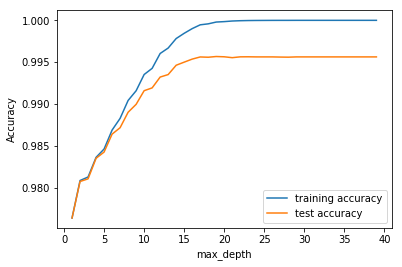

In [230]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [231]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [232]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.355558     10.119820         0.128307        0.201610   
1       4.433230      1.883870         0.049421        0.039744   
2       2.825939      0.296961         0.037801        0.041836   
3       4.462017      2.370320         0.018746        0.011688   
4       7.858871      2.950595         0.027216        0.014134   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.995740   
1                     25  {'min_samples_leaf': 25}           0.994386   
2                     45  {'min_samples_leaf': 45}           0.992173   
3                     65  {'min_samples_leaf': 65}           0.990522   
4                     85  {'min_samples_leaf': 85}           0.988639   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.996334           0.996631           0.996235       ...          
1           0.994980           0.994815           0.995509       ...          
2           0.992635           0.992734           0.993197       ...          
3           0.989531           0.990390           0.991248       ...          
4           0.988639           0.988970           0.989168       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.996123        0.000365                1            0.998208   
1         0.994888        0.000366                2            0.995905   
2         0.992741        0.000344                3            0.993593   
3         0.990621        0.000674                4            0.991611   
4         0.988936        0.000261                5            0.989498   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.998307            0.998852            0.998522   
1            0.995550            0.996227            0.995979   
2            0.993378            0.993601            0.993750   
3            0.990530            0.991496            0.991760   
4            0.989919            0.989886            0.989630   

   split4_train_score  mean_train_score  std_train_score  
0            0.998018          0.998382         0.000286  
1            0.995525          0.995837         0.000267  
2            0.993139          0.993492         0.000213  
3            0.991191          0.991318         0.000436  
4            0.989069          0.989600         0.000309  

[5 rows x 21 columns]

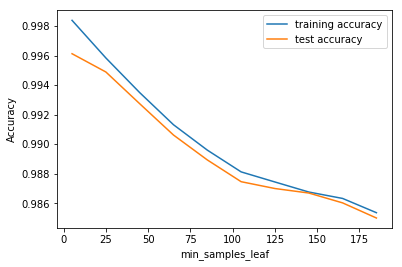

In [233]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [234]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [235]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.639911      1.669411         0.040778        0.008834   
1      10.355691      1.661669         0.034280        0.015110   
2      12.838722      0.725798         0.060884        0.025487   
3      13.730739      1.248733         0.035922        0.011688   
4      13.399037      1.017439         0.049868        0.018123   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.995376   
1                      25  {'min_samples_split': 25}           0.995376   
2                      45  {'min_samples_split': 45}           0.995310   
3                      65  {'min_samples_split': 65}           0.994650   
4                      85  {'min_samples_split': 85}           0.994122   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.996004           0.996466           0.995971       ...          
1           0.996103           0.996664           0.996499       ...          
2           0.996565           0.996598           0.996235       ...          
3           0.995178           0.996037           0.996070       ...          
4           0.994716           0.995608           0.995542       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.995793        0.000474                3            0.999554   
1         0.996123        0.000451                1            0.997977   
2         0.996096        0.000493                2            0.997259   
3         0.995442        0.000543                4            0.996532   
4         0.994921        0.000571                5            0.995797   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999562            0.999653            0.999546   
1            0.998126            0.998588            0.998200   
2            0.997474            0.997713            0.997457   
3            0.996268            0.997003            0.997061   
4            0.995789            0.996541            0.996582   

   split4_train_score  mean_train_score  std_train_score  
0            0.999488          0.999561         0.000053  
1            0.997622          0.998103         0.000314  
2            0.997053          0.997391         0.000222  
3            0.996260          0.996625         0.000347  
4            0.995756          0.996093         0.000383  

[5 rows x 21 columns]

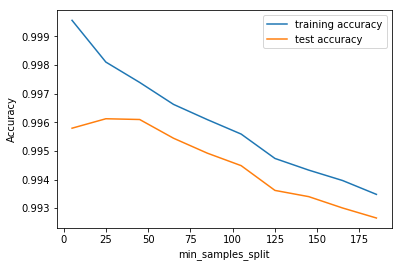

In [236]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [237]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 15, 3),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 150, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 20.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 15, 3),
                      

In [238]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.771847      0.375624         0.038195    1.318386e-02   
1         1.943747      0.078619         0.037494    7.655009e-03   
2         1.982485      0.316508         0.027187    3.654788e-03   
3         1.906727      0.274655         0.032981    4.240019e-03   
4         1.765049      0.377534         0.031784    7.543967e-03   
5         1.878222      0.130622         0.040064    1.294394e-02   
6         1.992694      0.286268         0.035339    1.231317e-02   
7         1.640439      0.200385         0.039173    1.359903e-02   
8         2.139735      0.237142         0.042410    7.216881e-03   
9         1.521070      0.208301         0.040177    2.587300e-02   
10        2.038042      0.152507         0.040917    7.723141e-03   
11        1.833657      0.324608         0.033322    1.215134e-02   
12        5.202392      0.743255         0.051886    1.690466e-02   
13        5.385254      0.548503         0.041401    1.630911e-02   
14        5.365781      0.690893         0.037495    1.249790e-02   
15        4.693362      1.125486         0.034853    1.083917e-02   
16        4.138459      1.183204         0.028907    1.199698e-02   
17        2.972128      1.067108         0.020296    9.342122e-03   
18        1.770266      0.239137         0.013212    3.329136e-03   
19        1.433331      0.031833         0.013770    2.266385e-03   
20        1.508572      0.052987         0.011603    6.066276e-03   
21        1.379571      0.037511         0.011792    7.498650e-04   
22        1.370794      0.012255         0.012593    1.747600e-03   
23        1.350797      0.045456         0.011592    4.881216e-04   
24        1.590213      0.097213         0.012718    1.816789e-03   
25        1.592910      0.037505         0.011999    2.048499e-03   
26        1.476905      0.101972         0.008647    7.183777e-03   
27        1.583224      0.115263         0.014844    2.706401e-03   
28        1.566106      0.067526         0.013995    1.997019e-03   
29        1.465256      0.129427         0.011993    8.938292e-04   
..             ...           ...              ...             ...   
90        2.602110      0.029649         0.012595    1.199061e-03   
91        2.587721      0.086010         0.011194    3.998760e-04   
92        2.542946      0.042971         0.011993    8.943091e-04   
93        2.550540      0.031651         0.012196    3.984889e-04   
94        2.551141      0.065520         0.011793    3.999475e-04   
95        2.556538      0.038380         0.011994    6.324855e-04   
96        2.984296      0.189899         0.011991    6.290971e-04   
97        2.989092      0.327189         0.012793    3.993991e-04   
98        2.970301      0.301475         0.011796    7.482752e-04   
99        2.932124      0.320358         0.012395    4.919914e-04   
100       2.915132      0.215523         0.012995    1.552190e-03   
101       2.903939      0.271710         0.012197    4.028734e-04   
102       2.898143      0.218673         0.011993    1.094756e-03   
103       2.908337      0.322238         0.012793    1.599097e-03   
104       2.957709      0.345837         0.011793    3.996850e-04   
105       2.924927      0.303947         0.012393    1.355869e-03   
106       2.901739      0.297653         0.011593    4.898236e-04   
107       3.082973      0.368122         0.011795    7.484278e-04   
108       3.095052      0.269813         0.012595    1.197988e-03   
109       2.963123      0.302116         0.011993    3.371748e-07   
110       3.311324      0.408021         0.015591    6.339490e-03   
111       3.227661      0.391512         0.012794    1.164480e-03   
112       3.355481      0.341582         0.013392    1.355967e-03   
113       2.902141      0.291155         0.012194    9.789673e-04   
114       2.958908      0.289739         0.011594    7.997396e-04   
115       2.918131      0.296935         0.012993    1.094191e-03   
116

In [239]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9914728067741978
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [240]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [241]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9823690780753938

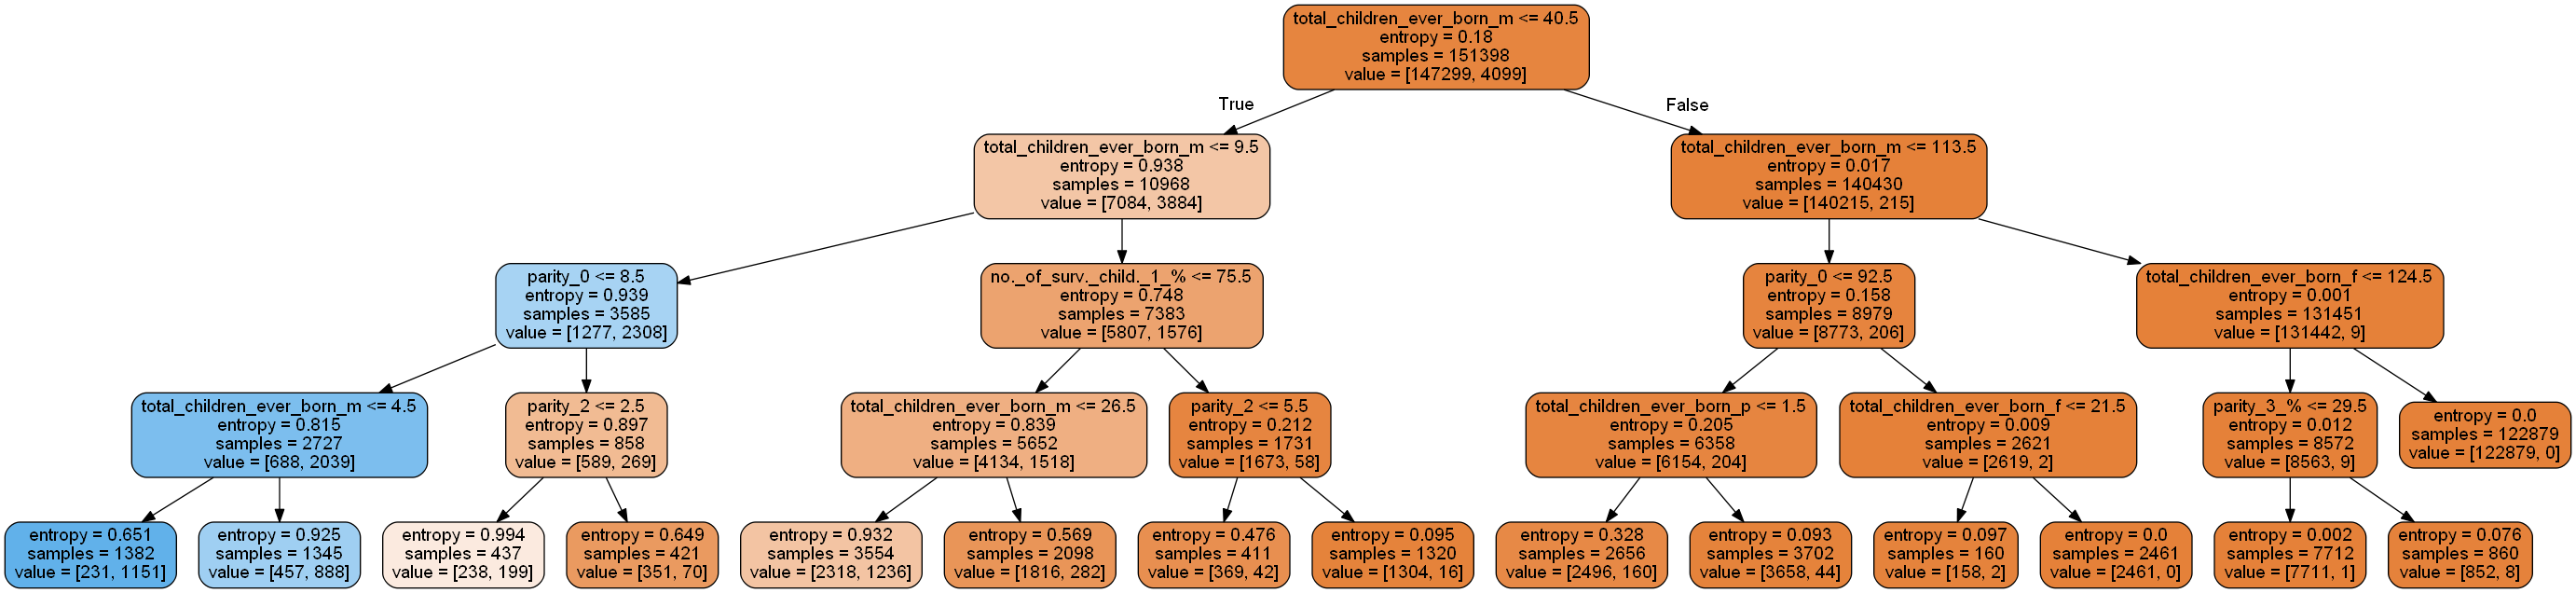

In [242]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [243]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     63106
           1       0.76      0.52      0.62      1780

    accuracy                           0.98     64886
   macro avg       0.87      0.76      0.81     64886
weighted avg       0.98      0.98      0.98     64886



In [244]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[62810   296]
 [  848   932]]


# model 3

In [245]:
from sklearn import preprocessing

# select all categorical variables
df_categorical = religion.select_dtypes(include=['object'])
df_categorical.head()

area_name total/_rural/_urban        religious_community  \
0  andaman_&_nicobar_islands               total  all_religious_communities   
1  andaman_&_nicobar_islands               total  all_religious_communities   
2  andaman_&_nicobar_islands               total  all_religious_communities   
3  andaman_&_nicobar_islands               total  all_religious_communities   
4  andaman_&_nicobar_islands               total  all_religious_communities   

    present_age  
0      all_ages  
1  less_than_15  
2         15-19  
3         20-24  
4         25-29

In [246]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

area_name  total/_rural/_urban  religious_community  present_age
0         19                    1                    0           14
1         19                    1                    0           15
2         19                    1                    0            0
3         19                    1                    0            1
4         19                    1                    0            2

In [247]:
religion

state_code  distt._code                  area_name  \
0               35            0  andaman_&_nicobar_islands   
1               35            0  andaman_&_nicobar_islands   
2               35            0  andaman_&_nicobar_islands   
3               35            0  andaman_&_nicobar_islands   
4               35            0  andaman_&_nicobar_islands   
5               35            0  andaman_&_nicobar_islands   
6               35            0  andaman_&_nicobar_islands   
7               35            0  andaman_&_nicobar_islands   
8               35            0  andaman_&_nicobar_islands   
9               35            0  andaman_&_nicobar_islands   
10              35            0  andaman_&_nicobar_islands   
11              35            0  andaman_&_nicobar_islands   
12              35            0  andaman_&_nicobar_islands   
13              35            0  andaman_&_nicobar_islands   
14              35            0  andaman_&_nicobar_islands   
15              35            0  andaman_&_nicobar_islands   
16              35            0  andaman_&_nicobar_islands   
17              35            0  andaman_&_nicobar_islands   
18              35            0  andaman_&_nicobar_islands   
19              35            0  andaman_&_nicobar_islands   
20              35            0  andaman_&_nicobar_islands   
21              35            0  andaman_&_nicobar_islands   
22              35            0  andaman_&_nicobar_islands   
23              35            0  andaman_&_nicobar_islands   
24              35            0  andaman_&_nicobar_islands   
25              35            0  andaman_&_nicobar_islands   
26              35            0  andaman_&_nicobar_islands   
27              35            0  andaman_&_nicobar_islands   
28              35            0  andaman_&_nicobar_islands   
29              35            0  andaman_&_nicobar_islands   
...            ...          ...                        ...   
192568           9           70                  sonbhadra   
192569           9           70                  sonbhadra   
192570           9           70                  sonbhadra   
192571           9           70                  sonbhadra   
192572           9           70                  sonbhadra   
192573           9           70                  sonbhadra   
192574           9           70                  sonbhadra   
192575           9           70                  sonbhadra   
192576           9           70                  sonbhadra   
192577           9           70                  sonbhadra   
192578           9           70                  sonbhadra   
192579           9           70                  sonbhadra   
192580           9           70                  sonbhadra   
192581           9           70                  sonbhadra   
192582           9           70                  sonbhadra   
192583           9           70                  sonbhadra   
192584           9           70                  sonbhadra   
192585           9           70                  sonbhadra   
192586           9           70                  sonbhadra   
192587           9           70                  sonbhadra   
192588           9           70                  sonbhadra   
192589           9           70                  sonbhadra   
192590           9           70                  sonbhadra   
192591           9           70                  sonbhadra   
192592           9           70                  sonbhadra   
192593           9           70                  sonbhadra   
192594           9           70                  sonbhadra   
192595           9           70                  sonbhadra   
192596           9           70                  sonbhadra   
192597           9           70                  sonbhadra   

       total/_rural/_urban          religious_community   present_age  \
0                    total    all_religious_communities      all_ages   
1                

In [248]:
# concat df_categorical with original df
df = religion.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

state_code  distt._code  total_ever_married_women_x  parity_0  parity_1  \
0          35            0                       86539      8869     13311   
1          35            0                         177       103        24   
2          35            0                        2293      1556       579   
3          35            0                       10933      2920      4195   
4          35            0                       15374      1719      3486   

   parity_2  parity_3  parity_4  parity_5  parity_6     ...       \
0     22224     17046     10201      5828      3407     ...        
1        50         0         0         0         0     ...        
2       109        24        25         0         0     ...        
3      2950       656       106        22        10     ...        
4      6056      3006       710       200        43     ...        

   last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
0                          2.344140                       50.540316   
1                          0.000000                       25.000000   
2                          0.000000                       47.928994   
3                          0.963956                       49.245599   
4                          0.987526                       51.351351   

   number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
0                       49.459684                          52.662704   
1                       75.000000                          99.728635   
2                       52.071006                          87.300958   
3                       50.754401                          38.092766   
4                       48.648649                          13.150622   

   total_currently_married_women_%  total_survival_rate  area_name  \
0                        47.337296             0.890245         19   
1                         0.271365             0.903226         19   
2                        12.699042             0.926729         19   
3                        61.907234             0.930503         19   
4                        86.849378             0.928257         19   

   total/_rural/_urban  religious_community  present_age  
0                    1                    0           14  
1                    1                    0           15  
2                    1                    0            0  
3                    1                    0            1  
4                    1                    0            2  

[5 rows x 75 columns]

In [249]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192598 entries, 0 to 192597
Data columns (total 75 columns):
state_code                           192598 non-null int64
distt._code                          192598 non-null int64
total_ever_married_women_x           192598 non-null int64
parity_0                             192598 non-null int64
parity_1                             192598 non-null int64
parity_2                             192598 non-null int64
parity_3                             192598 non-null int64
parity_4                             192598 non-null int64
parity_5                             192598 non-null int64
parity_6                             192598 non-null int64
parity_7+                            192598 non-null int64
total_children_ever_born_p           192598 non-null int64
total_children_ever_born_m           192598 non-null int64
total_children_ever_born_f           192598 non-null int64
total_ever_unmarried_women_x         192598 non-null int64
pari

In [250]:
df = df.astype(int)

In [251]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [252]:
# Putting feature variable to X
X = df.drop('total_survival_rate',axis=1)

# Putting response variable to y
y = df['total_survival_rate']

In [253]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

state_code  distt._code  total_ever_married_women_x  parity_0  \
164559           8           31                          21         2   
102790          27           10                           7         3   
177601           9           24                        2076       418   
101709          27            7                        1155        67   
73082           23            1                          29         5   

        parity_1  parity_2  parity_3  parity_4  parity_5  parity_6  \
164559         1         4         8         1         2         2   
102790         3         1         0         0         0         0   
177601       196       165       185       221       203       166   
101709        65        84       168       237       196       164   
73082          1         4         8         3         5         0   

           ...       last_year’s_births_of_order_6_%  \
164559     ...                                     0   
102790     ...                                     0   
177601     ...                                     0   
101709     ...                                     0   
73082      ...                                     0   

        last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
164559                                 0                               0   
102790                                 0                              33   
177601                                 0                               0   
101709                                 0                               0   
73082                                  0                              66   

        number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
164559                               0                                  0   
102790                              66                                 84   
177601                               0                                  0   
101709                               0                                  0   
73082                               33                                 54   

        total_currently_married_women_%  area_name  total/_rural/_urban  \
164559                                0         47                    0   
102790                               15         64                    2   
177601                                0        514                    1   
101709                                0         14                    2   
73082                                45        499                    0   

        religious_community  present_age  
164559                    2            6  
102790                    2            1  
177601                    5           13  
101709                    1            8  
73082                     4           14  

[5 rows x 74 columns]

In [254]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [255]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     50493
           1       0.91      0.60      0.72      7287

    accuracy                           0.94     57780
   macro avg       0.93      0.79      0.84     57780
weighted avg       0.94      0.94      0.94     57780



In [256]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[50066   427]
 [ 2934  4353]]
0.9418310834198684


In [257]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['distt._code',
 'total_ever_married_women_x',
 'parity_0',
 'parity_1',
 'parity_2',
 'parity_3',
 'parity_4',
 'parity_5',
 'parity_6',
 'parity_7+',
 'total_children_ever_born_p',
 'total_children_ever_born_m',
 'total_children_ever_born_f',
 'total_ever_unmarried_women_x',
 'parity_0_%',
 'parity_1_%',
 'parity_2_%',
 'parity_3_%',
 'parity_4_%',
 'parity_5_%',
 'parity_6_%',
 'parity_7+_%',
 'total_ever_married_women_%_x',
 'total_ever_unmarried_women_%_x',
 'total_children_ever_born_m_%',
 'total_children_ever_born_f_%',
 'no._of_surv._child._0',
 'no._of_surv._child._1',
 'no._of_surv._child._2',
 'no._of_surv._child._3',
 'no._of_surv._child._4',
 'no._of_surv._child._5+',
 'ttl_surv._child._p',
 'ttl_surv._child._m',
 'ttl_surv._child._f',
 'total_ever_unmarried_women_%_y',
 'total_ever_married_women_%_y',
 'ttl_surv._child._m_%',
 'ttl_surv._child._f_%',
 'no._of_surv._child._0_%',
 'no._of_surv._child._1_%',
 'no._of_surv._child._2_%',
 'no._of_surv._child._3_%',
 'no._of_su

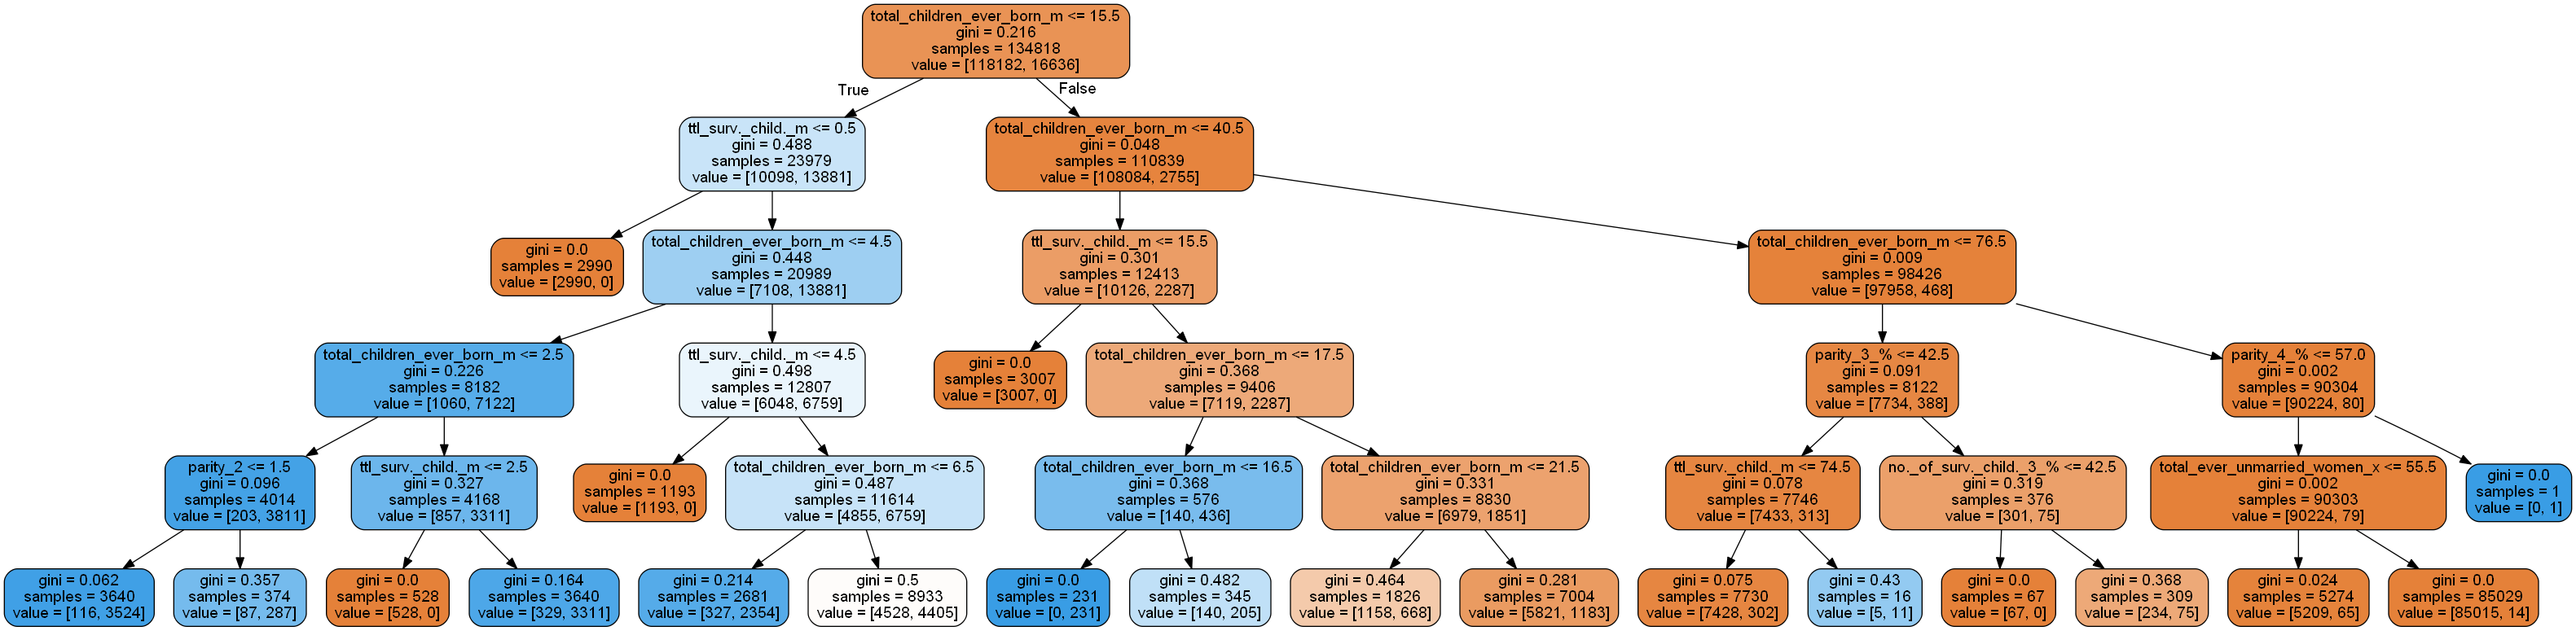

In [258]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [259]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [260]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.346998      0.007113         0.010594        0.000490   
1       0.607457      0.012344         0.010791        0.001470   
2       0.908280      0.042252         0.010994        0.000633   
3       1.223301      0.058931         0.011793        0.002226   
4       1.531924      0.043621         0.011793        0.001832   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.903987           0.906542   
1               2  {'max_depth': 2}           0.926312           0.928720   
2               3  {'max_depth': 3}           0.926312           0.928720   
3               4  {'max_depth': 4}           0.937215           0.940439   
4               5  {'max_depth': 5}           0.943037           0.944074   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.905426           0.900901       ...                0.904353   
1           0.927419           0.922412       ...                0.926493   
2           0.927419           0.929014       ...                0.927814   
3           0.938360           0.932945       ...                0.937390   
4           0.942811           0.944146       ...                0.943190   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001913               39            0.904833            0.907022   
1        0.002179               38            0.926975            0.928514   
2        0.000971               37            0.926975            0.928514   
3        0.002465               36            0.938055            0.939260   
4        0.000845               35            0.942894            0.943526   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.904474            0.902527            0.904603   
1            0.926698            0.925697            0.926652   
2            0.926698            0.930490            0.926652   
3            0.937778            0.936869            0.937870   
4            0.942701            0.946474            0.942933   

   mean_train_score  std_train_score  
0          0.904692         0.001428  
1          0.926907         0.000912  
2          0.927866         0.001479  
3          0.937966         0.000766  
4          0.943706         0.001412  

[5 rows x 21 columns]

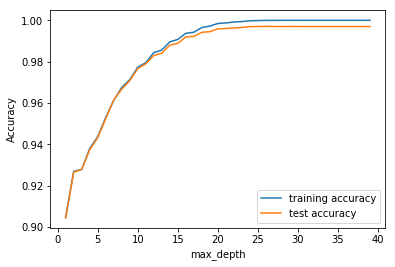

In [261]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [262]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [263]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.178556      0.232054         0.011192        0.000396   
1       2.212933      0.487726         0.010794        0.000748   
2       2.124201      0.390473         0.011579        0.001713   
3       1.922500      0.151197         0.010596        0.000491   
4       1.941088      0.160686         0.011794        0.002134   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.997738   
1                     25  {'min_samples_leaf': 25}           0.996588   
2                     45  {'min_samples_leaf': 45}           0.994215   
3                     65  {'min_samples_leaf': 65}           0.992657   
4                     85  {'min_samples_leaf': 85}           0.990395   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.997256           0.997404           0.996736       ...          
1           0.996143           0.996254           0.996365       ...          
2           0.994622           0.994251           0.993658       ...          
3           0.992101           0.992805           0.992731       ...          
4           0.990654           0.989690           0.991099       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.997374        0.000370                1            0.998943   
1         0.996492        0.000341                2            0.996755   
2         0.994444        0.000600                3            0.994845   
3         0.992635        0.000277                4            0.993157   
4         0.990513        0.000469                5            0.991386   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.998693            0.998600            0.998572   
1            0.996792            0.996959            0.996922   
2            0.994789            0.995281            0.994289   
3            0.992499            0.993677            0.993111   
4            0.991118            0.991006            0.991433   

   split4_train_score  mean_train_score  std_train_score  
0            0.998776          0.998717         0.000134  
1            0.996848          0.996855         0.000077  
2            0.994752          0.994791         0.000315  
3            0.992963          0.993081         0.000378  
4            0.990153          0.991019         0.000462  

[5 rows x 21 columns]

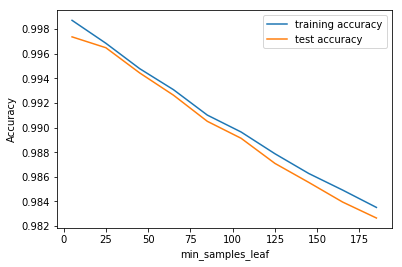

In [264]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [265]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [266]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.630496      0.308320         0.013593        0.001356   
1       2.365447      0.248064         0.011796        0.001166   
2       2.321673      0.208760         0.011397        0.001023   
3       2.316074      0.208369         0.011193        0.000400   
4       2.311678      0.239167         0.010994        0.001094   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.997812   
1                      25  {'min_samples_split': 25}           0.997219   
2                      45  {'min_samples_split': 45}           0.996699   
3                      65  {'min_samples_split': 65}           0.996254   
4                      85  {'min_samples_split': 85}           0.995253   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.997070           0.996699           0.997255       ...          
1           0.997219           0.997070           0.997404       ...          
2           0.996662           0.996699           0.996848       ...          
3           0.995290           0.995364           0.996699       ...          
4           0.994993           0.994845           0.995587       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.997211        0.000359                2            0.999675   
1         0.997300        0.000179                1            0.998720   
2         0.996877        0.000307                3            0.998127   
3         0.996047        0.000607                4            0.997460   
4         0.995305        0.000370                5            0.996458   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999648            0.999620            0.999750   
1            0.998415            0.998674            0.998470   
2            0.997691            0.997914            0.997710   
3            0.996866            0.996940            0.997256   
4            0.996356            0.996625            0.996106   

   split4_train_score  mean_train_score  std_train_score  
0            0.999703          0.999679         0.000045  
1            0.998572          0.998570         0.000116  
2            0.997895          0.997867         0.000159  
3            0.997181          0.997141         0.000215  
4            0.996384          0.996386         0.000168  

[5 rows x 21 columns]

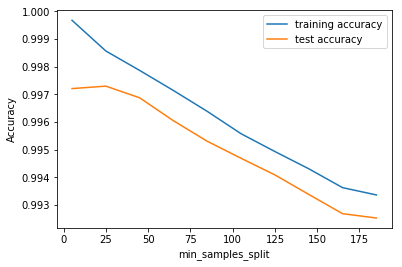

In [267]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [268]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 15, 3),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 170, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed: 16.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 15, 3),
                      

In [269]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.358395      0.007757         0.009994    6.322589e-04   
1         0.357796      0.009792         0.010194    3.996612e-04   
2         0.345202      0.005675         0.009996    3.910065e-06   
3         0.352799      0.009564         0.009794    7.481118e-04   
4         0.351197      0.015219         0.009795    3.995661e-04   
5         0.366391      0.020224         0.009994    6.324101e-04   
6         0.357995      0.011297         0.010396    4.920520e-04   
7         0.350000      0.012083         0.009794    3.999710e-04   
8         0.352399      0.003004         0.009794    3.997090e-04   
9         0.373586      0.018861         0.010994    1.548650e-03   
10        0.373387      0.024223         0.010995    1.092844e-03   
11        0.379583      0.017533         0.010594    1.018935e-03   
12        0.408366      0.055977         0.011194    1.469646e-03   
13        0.396373      0.024551         0.010594    1.623886e-03   
14        0.362793      0.012386         0.010394    7.995367e-04   
15        1.010822      0.024665         0.010594    1.199365e-03   
16        1.041005      0.046936         0.010994    1.095148e-03   
17        1.033010      0.041631         0.009994    6.217196e-07   
18        0.988235      0.015030         0.010199    4.029444e-04   
19        1.040205      0.028900         0.010396    4.876972e-04   
20        1.045802      0.046935         0.009996    6.352788e-04   
21        1.145146      0.049454         0.012392    1.854644e-03   
22        1.127355      0.057168         0.011794    1.165043e-03   
23        1.094175      0.064938         0.011793    1.938135e-03   
24        1.032609      0.044470         0.010394    4.897263e-04   
25        1.020215      0.021476         0.010394    4.896095e-04   
26        0.983438      0.012110         0.010598    8.042483e-04   
27        0.985234      0.010097         0.010194    3.999472e-04   
28        1.019617      0.047628         0.009997    6.323468e-04   
29        0.988834      0.014000         0.010398    4.906450e-04   
..             ...           ...              ...             ...   
120       1.821356      0.160644         0.010594    4.899209e-04   
121       1.923101      0.232807         0.011993    2.605554e-03   
122       2.155016      0.209575         0.011995    2.095470e-03   
123       1.853138      0.143561         0.010794    4.000429e-04   
124       1.873729      0.127918         0.011394    1.853849e-03   
125       1.823157      0.146594         0.010994    6.316559e-04   
126       1.850142      0.139244         0.010194    3.997806e-04   
127       1.859936      0.161782         0.010396    4.923055e-04   
128       1.853142      0.171528         0.011192    1.468996e-03   
129       1.851941      0.128243         0.010994    1.095235e-03   
130       1.809765      0.164086         0.010396    4.919571e-04   
131       1.861736      0.120942         0.012193    1.598990e-03   
132       1.797570      0.124511         0.011394    8.002998e-04   
133       1.862334      0.147787         0.010794    3.997566e-04   
134       1.830951      0.107708         0.010594    4.898626e-04   
135       1.868333      0.137073         0.010796    7.506881e-04   
136       1.904911      0.168660         0.011193    9.791312e-04   
137       1.895317      0.150264         0.010993    6.326360e-04   
138       1.892918      0.146881         0.011594    1.198912e-03   
139       1.919503      0.146779         0.010796    7.488376e-04   
140       1.854140      0.118576         0.010594    4.897070e-04   
141       1.877727      0.121790         0.010996    6.293981e-04   
142       1.881724      0.167789         0.010796    7.484032e-04   
143       1.914903      0.173390         0.010395    7.995014e-04   
144       1.877726      0.149135         0.010796    4.000152e-04   
145       1.832952      0.137719         0.011196    1.468781e-03   
146

In [270]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9833553383079411
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [271]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=7, 
                                  min_samples_leaf=75,
                                  min_samples_split=160)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=160,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [272]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9598823122187609

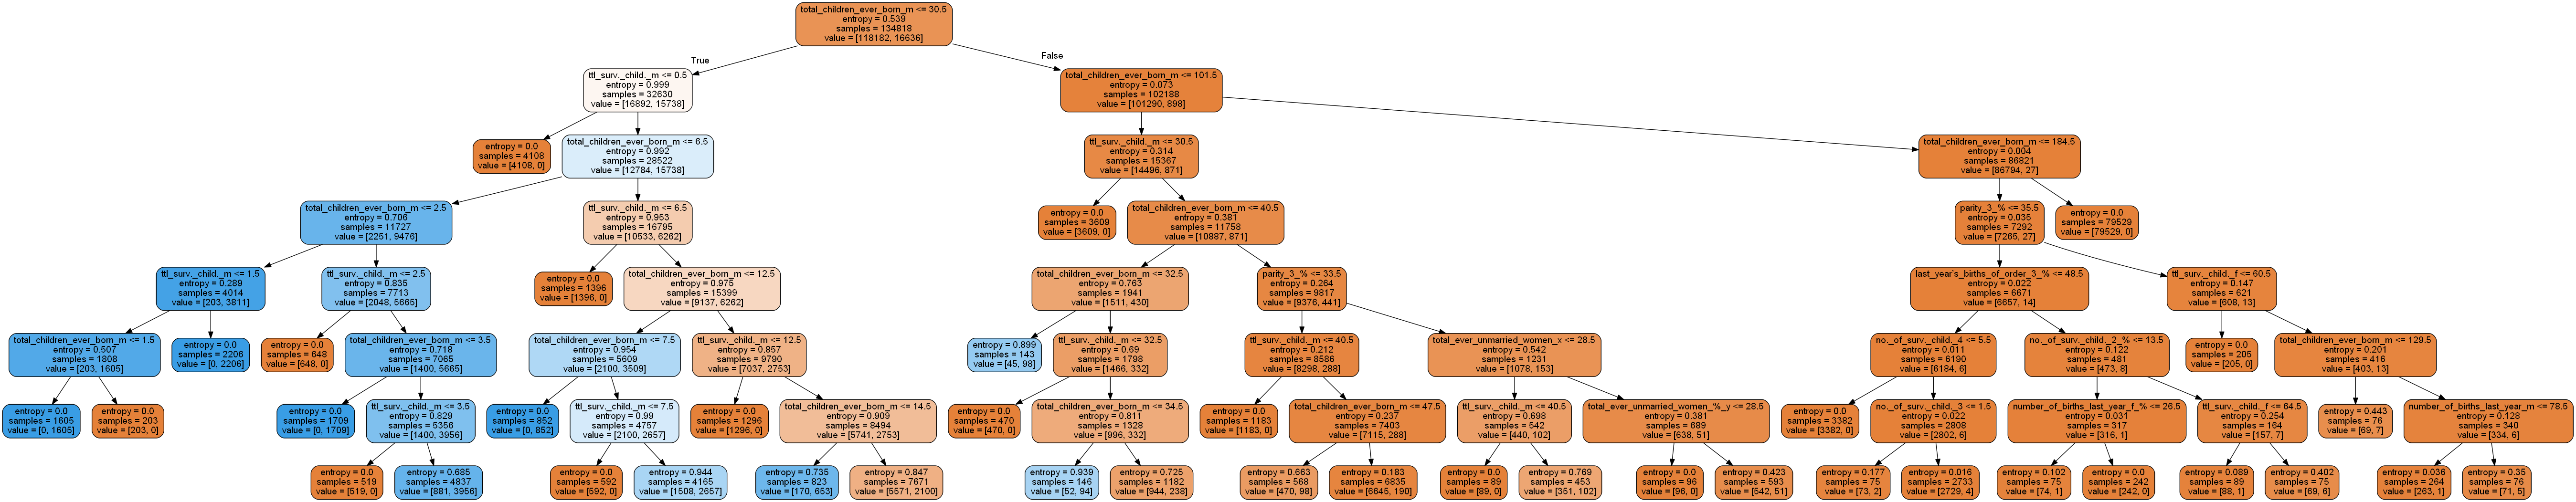

In [273]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [274]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     50493
           1       0.85      0.83      0.84      7287

    accuracy                           0.96     57780
   macro avg       0.91      0.91      0.91     57780
weighted avg       0.96      0.96      0.96     57780



In [275]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[49395  1098]
 [ 1220  6067]]


# model 4

In [277]:
from sklearn import preprocessing

# select all categorical variables
df_categorical = economics.select_dtypes(include=['object'])
df_categorical.head()

area_name total/rural/urban   economic_activity   present_age
0  arunachal_pradesh             total  total_main_workers      all_ages
1  arunachal_pradesh             total  total_main_workers  less_than_15
2  arunachal_pradesh             total  total_main_workers         15-19
3  arunachal_pradesh             total  total_main_workers         20-24
4  arunachal_pradesh             total  total_main_workers         25-29

In [278]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

area_name  total/rural/urban  economic_activity  present_age
0         26                  1                  7           14
1         26                  1                  7           15
2         26                  1                  7            0
3         26                  1                  7            1
4         26                  1                  7            2

In [279]:
economics

state_code  distt._code          area_name total/rural/urban  \
0               12            0  arunachal_pradesh             total   
1               12            0  arunachal_pradesh             total   
2               12            0  arunachal_pradesh             total   
3               12            0  arunachal_pradesh             total   
4               12            0  arunachal_pradesh             total   
5               12            0  arunachal_pradesh             total   
6               12            0  arunachal_pradesh             total   
7               12            0  arunachal_pradesh             total   
8               12            0  arunachal_pradesh             total   
9               12            0  arunachal_pradesh             total   
10              12            0  arunachal_pradesh             total   
11              12            0  arunachal_pradesh             total   
12              12            0  arunachal_pradesh             total   
13              12            0  arunachal_pradesh             total   
14              12            0  arunachal_pradesh             total   
15              12            0  arunachal_pradesh             total   
16              12            0  arunachal_pradesh             total   
17              12            0  arunachal_pradesh             total   
18              12            0  arunachal_pradesh             total   
19              12            0  arunachal_pradesh             total   
20              12            0  arunachal_pradesh             total   
21              12            0  arunachal_pradesh             total   
22              12            0  arunachal_pradesh             total   
23              12            0  arunachal_pradesh             total   
24              12            0  arunachal_pradesh             total   
25              12            0  arunachal_pradesh             total   
26              12            0  arunachal_pradesh             total   
27              12            0  arunachal_pradesh             total   
28              12            0  arunachal_pradesh             total   
29              12            0  arunachal_pradesh             total   
...            ...          ...                ...               ...   
229210          33           30      kanniyakumari             urban   
229211          33           30      kanniyakumari             urban   
229212          33           30      kanniyakumari             urban   
229213          33           30      kanniyakumari             urban   
229214          33           30      kanniyakumari             urban   
229215          33           30      kanniyakumari             urban   
229216          33           30      kanniyakumari             urban   
229217          33           30      kanniyakumari             urban   
229218          33           30      kanniyakumari             urban   
229219          33           30      kanniyakumari             urban   
229220          33           30      kanniyakumari             urban   
229221          33           30      kanniyakumari             urban   
229222          33           30      kanniyakumari             urban   
229223          33           30      kanniyakumari             urban   
229224          33           30      kanniyakumari             urban   
229225          33           30      kanniyakumari             urban   
229226          33           30      kanniyakumari             urban   
229227          33           30      kanniyakumari             urban   
229228          33           30      kanniyakumari             urban   
229229          33           30      kanniyakumari             urban   
229230          33           30      kanniyakumari             urban   
229231          33           30      kanniyakumari             urban   
229232          33           30      kanniyakumari             urban   
229233          33           30      kanniyakuma

In [280]:
# concat df_categorical with original df
df = economics.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

state_code  distt._code  total_ever_married_women_x  parity_0  parity_1  \
0          12            0                      125486     15184     15499   
1          12            0                         178       109        27   
2          12            0                        3624      2075      1104   
3          12            0                       13413      3407      4429   
4          12            0                       20970      2630      3420   

   parity_2  parity_3  parity_4  parity_5  parity_6     ...       \
0     17684     17727     16710     13788     10188     ...        
1        42         0         0         0         0     ...        
2       268        95        82         0         0     ...        
3      3178      1476       512       180        81     ...        
4      4834      4529      2985      1407       623     ...        

   last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
0                         12.926404                       50.129055   
1                          0.000000                       62.500000   
2                          0.000000                       53.000000   
3                          1.068804                       51.603206   
4                          3.343023                       49.951550   

   number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
0                       49.870945                          24.838948   
1                       37.500000                          96.587318   
2                       47.000000                          70.673156   
3                       48.396794                          28.129481   
4                       50.048450                          13.501350   

   total_currently_married_women_%  total_survival_rate  area_name  \
0                        75.161052             0.793122         26   
1                         3.412682             0.837838         26   
2                        29.326844             0.848646         26   
3                        71.870519             0.859385         26   
4                        86.498650             0.855909         26   

   total/rural/urban  economic_activity  present_age  
0                  1                  7           14  
1                  1                  7           15  
2                  1                  7            0  
3                  1                  7            1  
4                  1                  7            2  

[5 rows x 75 columns]

In [281]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229240 entries, 0 to 229239
Data columns (total 75 columns):
state_code                           229240 non-null int64
distt._code                          229240 non-null int64
total_ever_married_women_x           229240 non-null int64
parity_0                             229240 non-null int64
parity_1                             229240 non-null int64
parity_2                             229240 non-null int64
parity_3                             229240 non-null int64
parity_4                             229240 non-null int64
parity_5                             229240 non-null int64
parity_6                             229240 non-null int64
parity_7+                            229240 non-null int64
total_children_ever_born_p           229240 non-null int64
total_children_ever_born_m           229240 non-null int64
total_children_ever_born_f           229240 non-null int64
total_ever_unmarried_women_x         229240 non-null int64
pari

In [282]:
df = df.astype(int)

In [283]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [284]:
# Putting feature variable to X
X = df.drop('total_survival_rate',axis=1)

# Putting response variable to y
y = df['total_survival_rate']

In [285]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

state_code  distt._code  total_ever_married_women_x  parity_0  \
184061          23           18                        3504       151   
86694           24           16                         175        15   
180896          23           10                          15        10   
89032           24           22                          92        60   
216712          15            5                          86         2   

        parity_1  parity_2  parity_3  parity_4  parity_5  parity_6  \
184061       186       548       858       780       443       277   
86694         15        20        25        10        20        40   
180896         5         0         0         0         0         0   
89032         18        12         1         1         0         0   
216712         8         4         6        10         9        18   

           ...       last_year’s_births_of_order_6_%  \
184061     ...                                    14   
86694      ...                                     0   
180896     ...                                     0   
89032      ...                                     0   
216712     ...                                     0   

        last_year’s_births_of_order_7+_%  number_of_births_last_year_m_%  \
184061                                21                              52   
86694                                  0                               0   
180896                                 0                               0   
89032                                  0                              25   
216712                                 0                               0   

        number_of_births_last_year_f_%  total_currently_unmarried_women_%  \
184061                              47                                  4   
86694                                0                                  0   
180896                               0                                 70   
89032                               75                                 78   
216712                               0                                  0   

        total_currently_married_women_%  area_name  total/rural/urban  \
184061                               95        410                  0   
86694                                 0        300                  0   
180896                               29        433                  1   
89032                                21        547                  2   
216712                                0        505                  1   

        economic_activity  present_age  
184061                  3            4  
86694                   6           13  
180896                  4            0  
89032                   0            0  
216712                  7           11  

[5 rows x 74 columns]

In [286]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [287]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     65599
           1       0.79      0.65      0.71      3173

    accuracy                           0.98     68772
   macro avg       0.89      0.82      0.85     68772
weighted avg       0.97      0.98      0.97     68772



In [288]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[65064   535]
 [ 1113  2060]]
0.9760367591461642


In [289]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(df.columns[1:])
features

['distt._code',
 'total_ever_married_women_x',
 'parity_0',
 'parity_1',
 'parity_2',
 'parity_3',
 'parity_4',
 'parity_5',
 'parity_6',
 'parity_7+',
 'total_children_ever_born_p',
 'total_children_ever_born_m',
 'total_children_ever_born_f',
 'total_ever_unmarried_women_x',
 'parity_0_%',
 'parity_1_%',
 'parity_2_%',
 'parity_3_%',
 'parity_4_%',
 'parity_5_%',
 'parity_6_%',
 'parity_7+_%',
 'total_ever_married_women_%_x',
 'total_ever_unmarried_women_%_x',
 'total_children_ever_born_m_%',
 'total_children_ever_born_f_%',
 'no._of_surv._child._0',
 'no._of_surv._child._1',
 'no._of_surv._child._2',
 'no._of_surv._child._3',
 'no._of_surv._child._4',
 'no._of_surv._child._5+',
 'ttl_surv._child._p',
 'ttl_surv._child._m',
 'ttl_surv._child._f',
 'total_ever_unmarried_women_%_y',
 'total_ever_married_women_%_y',
 'ttl_surv._child._m_%',
 'ttl_surv._child._f_%',
 'no._of_surv._child._0_%',
 'no._of_surv._child._1_%',
 'no._of_surv._child._2_%',
 'no._of_surv._child._3_%',
 'no._of_su

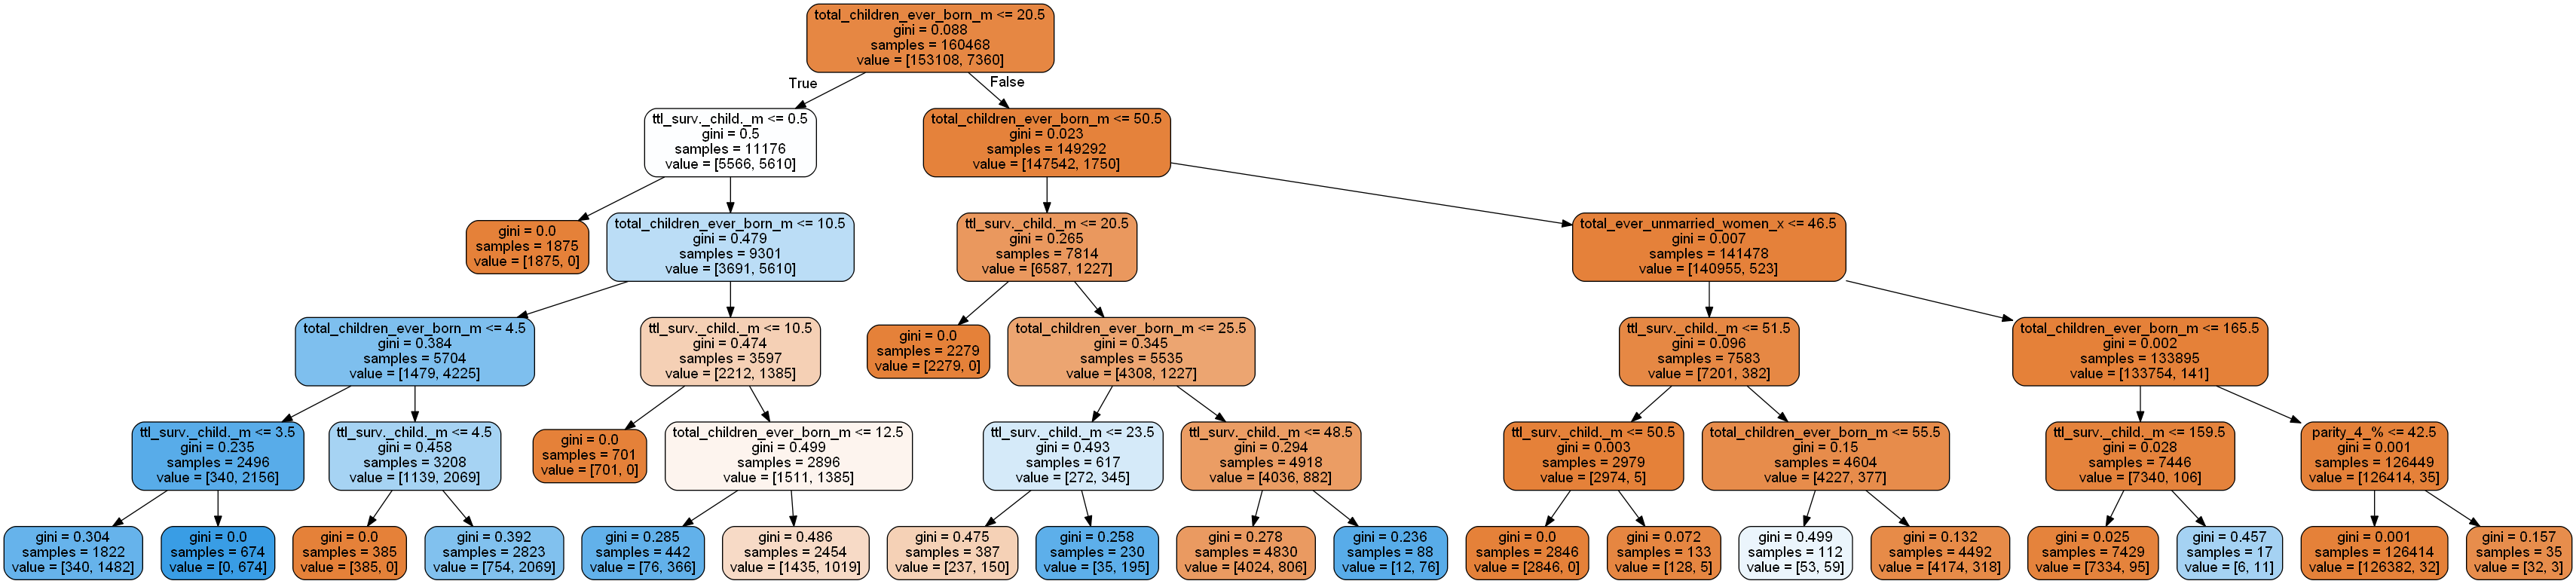

In [290]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [291]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [292]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.570473      0.031576         0.016591        0.003198   
1       0.884494      0.081065         0.014192        0.001469   
2       1.153340      0.021777         0.012593        0.000490   
3       1.613278      0.086623         0.014394        0.001355   
4       1.935493      0.066897         0.013592        0.001019   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.956814           0.954291   
1               2  {'max_depth': 2}           0.967159           0.966318   
2               3  {'max_depth': 3}           0.967720           0.972425   
3               4  {'max_depth': 4}           0.972518           0.973266   
4               5  {'max_depth': 5}           0.977099           0.976725   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.954789           0.953822       ...                0.954926   
1           0.966723           0.965725       ...                0.966267   
2           0.971365           0.970585       ...                0.970667   
3           0.971770           0.970928       ...                0.972013   
4           0.976631           0.976755       ...                0.976874   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001021               39            0.958270            0.954438   
1        0.000637               38            0.968218            0.966037   
2        0.001587               37            0.968623            0.970952   
3        0.000806               36            0.972572            0.971310   
4        0.000213               35            0.976997            0.975969   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.954313            0.954555            0.954282   
1            0.965935            0.966185            0.966263   
2            0.971217            0.971412            0.971248   
3            0.971684            0.971895            0.971731   
4            0.976950            0.977324            0.977137   

   mean_train_score  std_train_score  
0          0.955172         0.001552  
1          0.966528         0.000853  
2          0.970690         0.001044  
3          0.971839         0.000414  
4          0.976875         0.000472  

[5 rows x 21 columns]

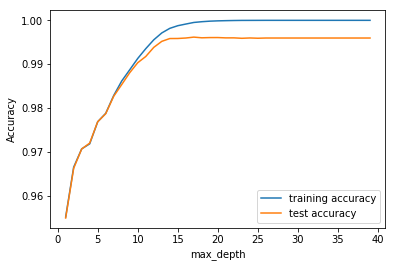

In [293]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [294]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [295]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.805646      0.688929         0.014994        0.001671   
1       3.281834      0.512930         0.014045        0.001436   
2       3.269205      0.560582         0.015620        0.000004   
3       3.283201      0.693974         0.015118        0.002620   
4       3.135230      0.593076         0.013597        0.000489   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.995762   
1                     25  {'min_samples_leaf': 25}           0.995170   
2                     45  {'min_samples_leaf': 45}           0.992460   
3                     65  {'min_samples_leaf': 65}           0.991182   
4                     85  {'min_samples_leaf': 85}           0.988284   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.997071           0.996697           0.997289       ...          
1           0.995077           0.994952           0.996105       ...          
2           0.993644           0.993301           0.994017       ...          
3           0.991400           0.991089           0.991556       ...          
4           0.990310           0.989437           0.989749       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.996691        0.000523                1            0.998442   
1         0.995226        0.000454                2            0.995801   
2         0.993170        0.000635                3            0.993986   
3         0.991300        0.000164                4            0.992171   
4         0.989456        0.000662                5            0.989889   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.998512            0.998504            0.998536   
1            0.996035            0.996066            0.995988   
2            0.994352            0.993729            0.993729   
3            0.992506            0.991416            0.991797   
4            0.990278            0.989375            0.990216   

   split4_train_score  mean_train_score  std_train_score  
0            0.998637          0.998526         0.000063  
1            0.995895          0.995957         0.000097  
2            0.993550          0.993869         0.000279  
3            0.992187          0.992016         0.000375  
4            0.990356          0.990023         0.000361  

[5 rows x 21 columns]

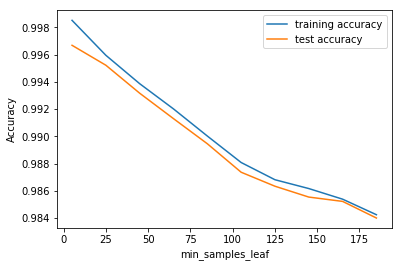

In [296]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [297]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [298]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.225283      0.565272         0.015992        0.001095   
1       4.214791      0.910829         0.018590        0.004588   
2       4.212817      0.702399         0.015392        0.002937   
3       3.771252      0.531661         0.013794        0.001169   
4       3.712712      0.544841         0.014592        0.001742   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.995731   
1                      25  {'min_samples_split': 25}           0.995326   
2                      45  {'min_samples_split': 45}           0.995482   
3                      65  {'min_samples_split': 65}           0.994828   
4                      85  {'min_samples_split': 85}           0.994111   

   split1_test_score  split2_test_score  split3_test_score       ...         \
0           0.995918           0.996323           0.996479       ...          
1           0.996604           0.996386           0.997102       ...          
2           0.995856           0.995015           0.996417       ...          
3           0.995794           0.995202           0.996261       ...          
4           0.994516           0.994205           0.995326       ...          

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.996118        0.000269                2            0.999501   
1         0.996367        0.000580                1            0.998278   
2         0.995650        0.000467                3            0.997281   
3         0.995420        0.000531                4            0.996191   
4         0.994504        0.000434                5            0.995412   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.999486            0.999564            0.999642   
1            0.998325            0.998092            0.998434   
2            0.996978            0.996985            0.997258   
3            0.996393            0.996409            0.996822   
4            0.995427            0.995311            0.995934   

   split4_train_score  mean_train_score  std_train_score  
0            0.999595          0.999558         0.000058  
1            0.998201          0.998266         0.000116  
2            0.997110          0.997122         0.000129  
3            0.996393          0.996442         0.000206  
4            0.995521          0.995521         0.000217  

[5 rows x 21 columns]

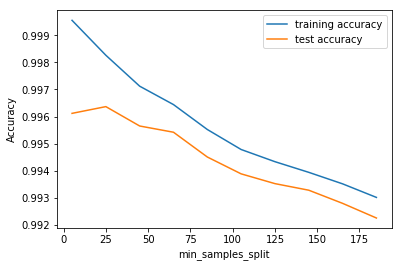

In [299]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [300]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 15, 3),
    'min_samples_leaf': range(50, 200, 50),
    'min_samples_split': range(50, 170, 25),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed: 22.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 15, 3),
                      

In [301]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.477327      0.051185         0.011993        0.001096   
1         0.424959      0.010339         0.011592        0.000487   
2         0.434152      0.015936         0.011994        0.000632   
3         0.427356      0.008818         0.012594        0.001355   
4         0.435751      0.013963         0.012395        0.000488   
5         0.433552      0.009574         0.011793        0.000400   
6         0.465736      0.041462         0.012391        0.000798   
7         0.430754      0.008556         0.012392        0.000488   
8         0.430354      0.005311         0.012195        0.000399   
9         0.456785      0.021076         0.013146        0.001332   
10        0.448543      0.014322         0.012393        0.001496   
11        0.438349      0.013056         0.011593        0.000490   
12        0.438949      0.017983         0.012793        0.001469   
13        0.455345      0.025080         0.011995        0.001098   
14        0.430952      0.016514         0.012393        0.000489   
15        1.460164      0.132620         0.012195        0.000399   
16        1.561507      0.090451         0.012992        0.000895   
17        1.571518      0.125401         0.013395        0.001200   
18        1.566928      0.125206         0.012593        0.000489   
19        1.596379      0.157253         0.015191        0.002481   
20        1.644863      0.154661         0.013593        0.000800   
21        1.477575      0.107147         0.012992        0.001788   
22        1.468563      0.122021         0.012593        0.000490   
23        1.455968      0.106085         0.012193        0.000400   
24        1.514132      0.129986         0.012796        0.001597   
25        1.461378      0.142650         0.012195        0.000404   
26        1.626946      0.223275         0.014791        0.002479   
27        1.683644      0.227242         0.013594        0.001017   
28        1.640062      0.211831         0.013792        0.001166   
29        1.532331      0.142079         0.013392        0.001356   
..             ...           ...              ...             ...   
120       2.821187      0.481025         0.013192        0.000748   
121       2.847771      0.503131         0.012791        0.000750   
122       2.867315      0.502079         0.013790        0.001720   
123       2.973300      0.515173         0.012393        0.000489   
124       2.849970      0.417752         0.013593        0.001743   
125       2.778261      0.512705         0.012594        0.000489   
126       2.694259      0.428727         0.012593        0.000490   
127       3.029382      0.801967         0.013119        0.001472   
128       2.745487      0.463792         0.017174        0.007110   
129       2.743231      0.500271         0.012793        0.001165   
130       2.523357      0.452974         0.013193        0.000748   
131       2.562534      0.352298         0.012793        0.000400   
132       2.643688      0.388504         0.013395        0.000799   
133       2.652283      0.439615         0.013792        0.001720   
134       2.540147      0.434681         0.012393        0.000490   
135       3.053576      0.589952         0.012193        0.000400   
136       3.016675      0.598925         0.012794        0.000746   
137       3.079439      0.608105         0.013593        0.001854   
138       3.313225      0.495549         0.015647        0.001316   
139       3.356986      0.764821         0.014394        0.002873   
140       2.997296      0.626617         0.013192        0.000979   
141       3.033299      0.608162         0.014190        0.002925   
142       2.988495      0.629225         0.012795        0.000748   
143       3.155108      0.586666         0.015791        0.005112   
144       3.454218      0.909453         0.015393        0.005314   
145       2.797147      0.557518         0.013518        0.001051   
146

In [302]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9925966547847546
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [312]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=75,
                                  min_samples_split=160)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=160,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [313]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9719944163322283

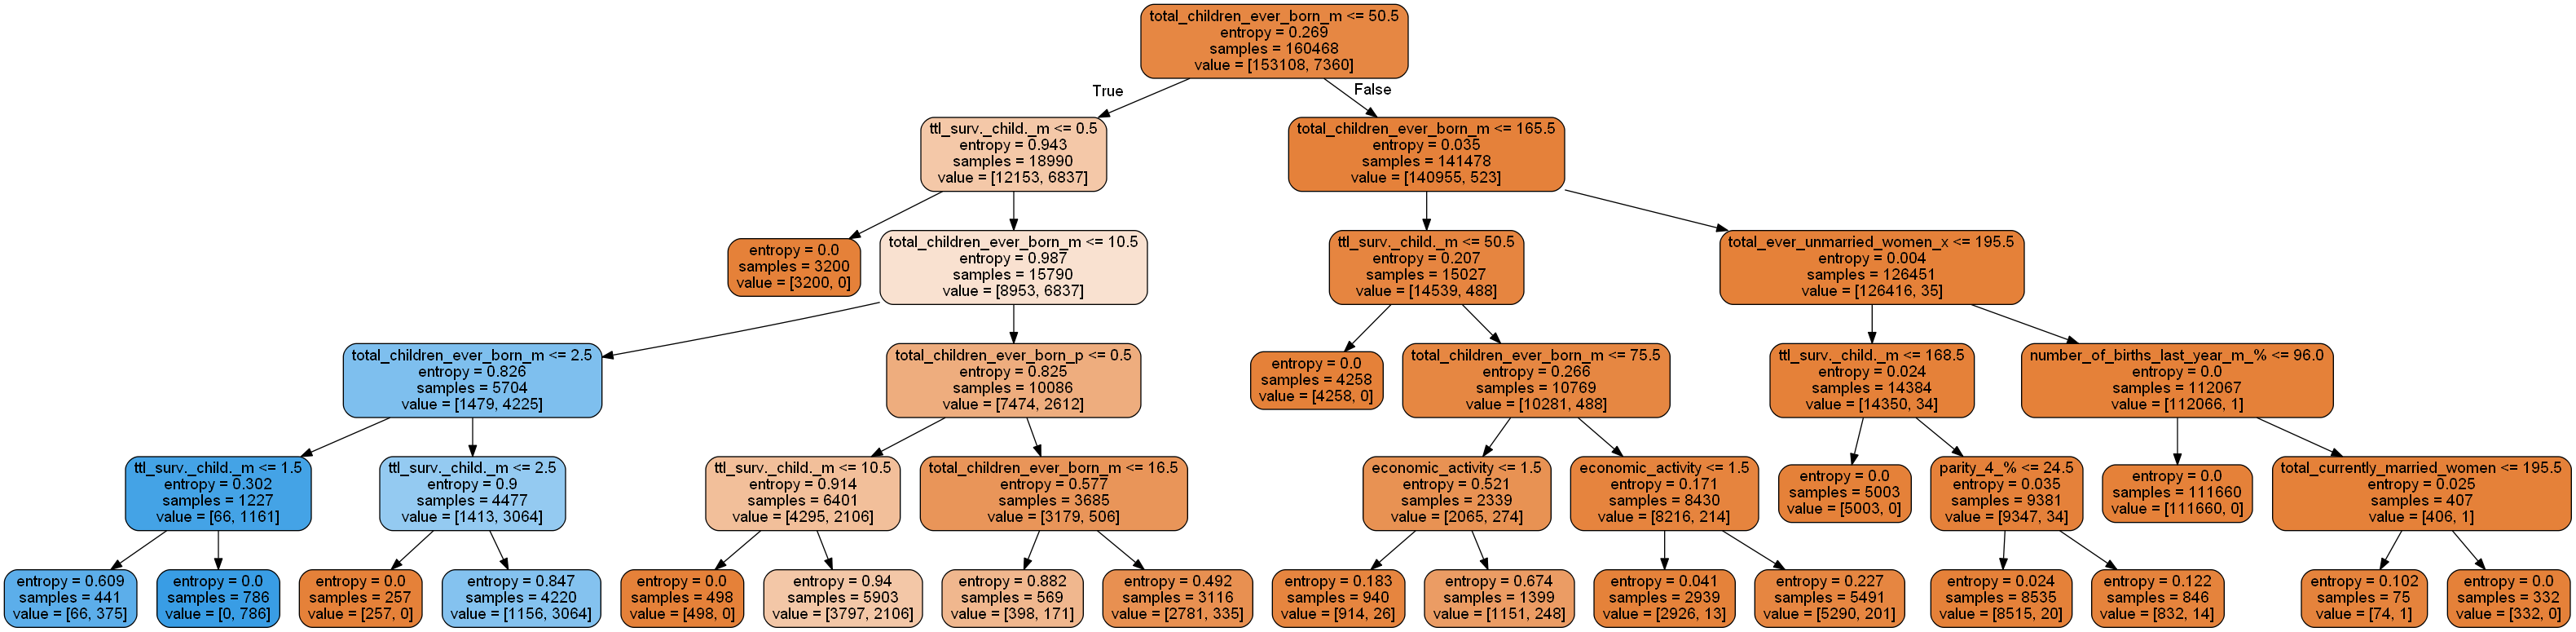

In [314]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [315]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     65599
           1       0.77      0.55      0.65      3173

    accuracy                           0.97     68772
   macro avg       0.88      0.77      0.82     68772
weighted avg       0.97      0.97      0.97     68772



In [316]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[65086   513]
 [ 1413  1760]]
